In [138]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import metrics
from warnings import filterwarnings
filterwarnings("ignore")

In [139]:
df1=pd.read_csv('Sparkling.csv')

In [140]:
df2=pd.read_csv('Rose.csv')

In [141]:
df1.head()

YearMonth  Sparkling
0   1980-01       1686
1   1980-02       1591
2   1980-03       2304
3   1980-04       1712
4   1980-05       1471

In [142]:
df2.head()

YearMonth   Rose
0   1980-01  112.0
1   1980-02  118.0
2   1980-03  129.0
3   1980-04   99.0
4   1980-05  116.0

In [143]:
df1.dtypes

YearMonth    object
Sparkling     int64
dtype: object

In [144]:
df2.dtypes

YearMonth     object
Rose         float64
dtype: object

In [145]:
df1 = pd.read_csv('Sparkling.csv', parse_dates = ['YearMonth'])

In [146]:
df1.dtypes

YearMonth    datetime64[ns]
Sparkling             int64
dtype: object

In [147]:
df2 = pd.read_csv('Rose.csv', parse_dates = ['YearMonth'])

In [148]:
df2.dtypes

YearMonth    datetime64[ns]
Rose                float64
dtype: object

In [149]:
df1 = pd.read_csv('Sparkling.csv', parse_dates = ['YearMonth'], index_col = 'YearMonth')

In [150]:
df1.head()

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

In [151]:
df2 = pd.read_csv('Rose.csv', parse_dates = ['YearMonth'], index_col = 'YearMonth')

In [152]:
df2.head()

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

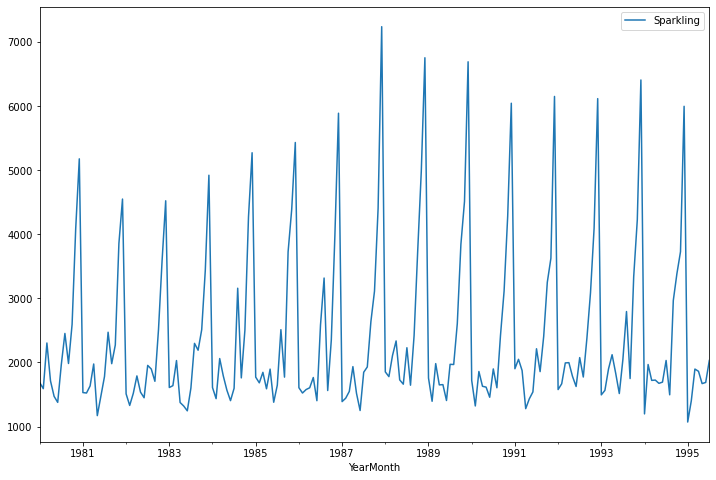

In [153]:
df1.plot()
plt.show()

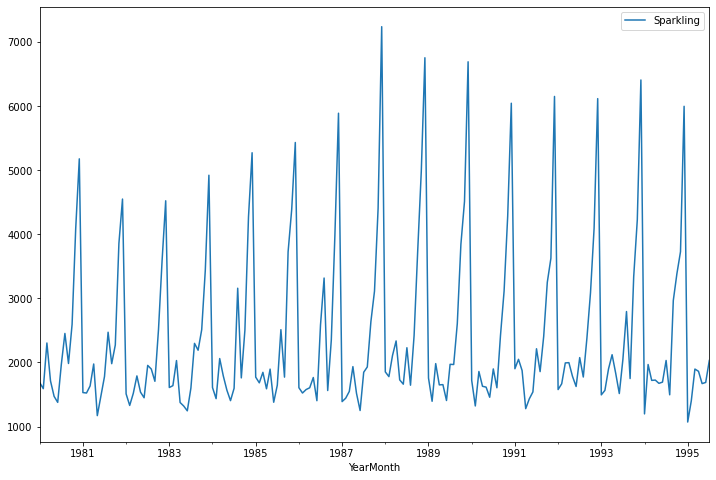

In [154]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
df1.plot()
plt.show()

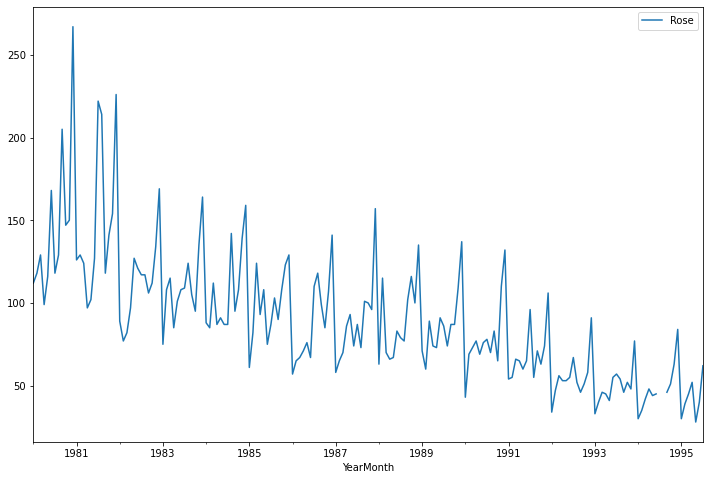

In [155]:
df2.plot()
plt.show()

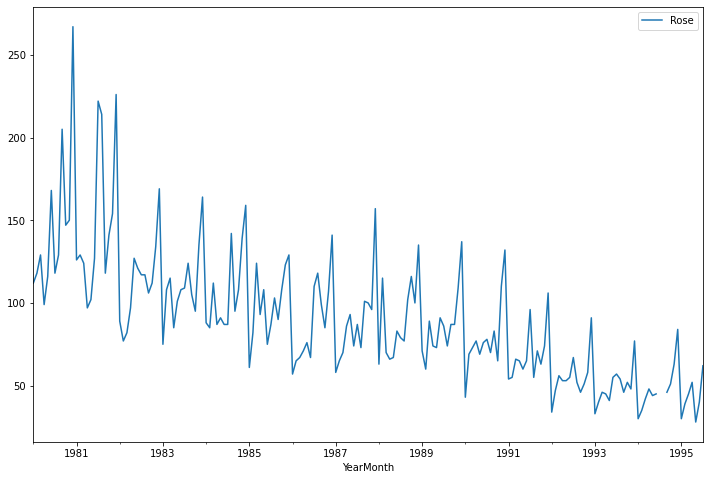

In [156]:
rcParams['figure.figsize'] = 12, 8
df2.plot()
plt.show()

In [157]:
df1.isnull().sum()

Sparkling    0
dtype: int64

In [158]:
df2.isnull().sum()

Rose    2
dtype: int64

In [159]:
df2['Rose'].interpolate(method='linear',inplace=True)

In [160]:
df2.isnull().sum()

Rose    0
dtype: int64

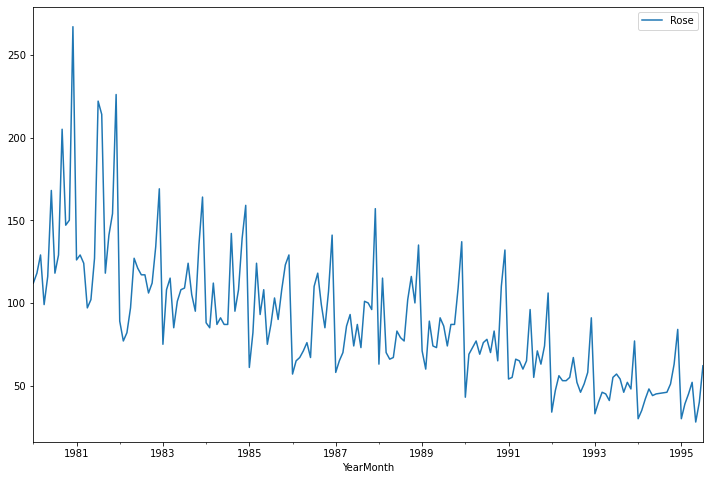

In [161]:
df2.plot();

In [162]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


In [163]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    187 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


In [164]:
df1.shape

(187, 1)

In [165]:
df2.shape

(187, 1)

In [166]:
df1.describe()

Sparkling
count   187.000000
mean   2402.417112
std    1295.111540
min    1070.000000
25%    1605.000000
50%    1874.000000
75%    2549.000000
max    7242.000000

In [167]:
df2.describe()

Rose
count  187.000000
mean    89.914439
std     39.238325
min     28.000000
25%     62.500000
50%     85.000000
75%    111.000000
max    267.000000

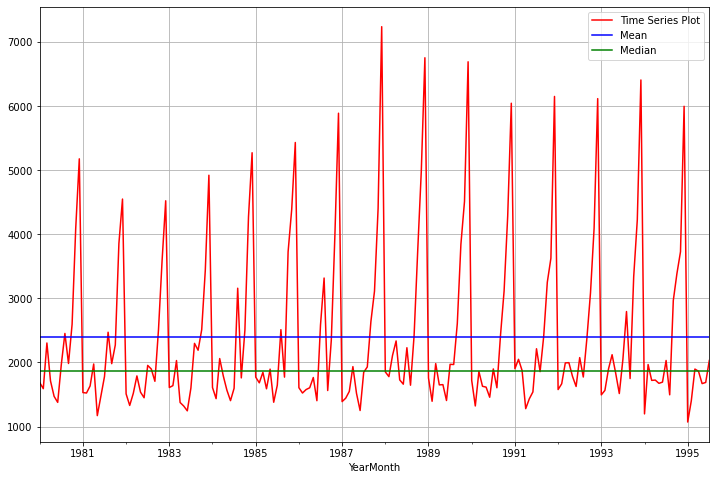

In [168]:
df1.plot(color='Red')
plt.axhline(df1['Sparkling'].mean(),color='Blue')
plt.axhline(df1['Sparkling'].median(),color='Green')
plt.grid()
plt.legend(['Time Series Plot','Mean','Median']);

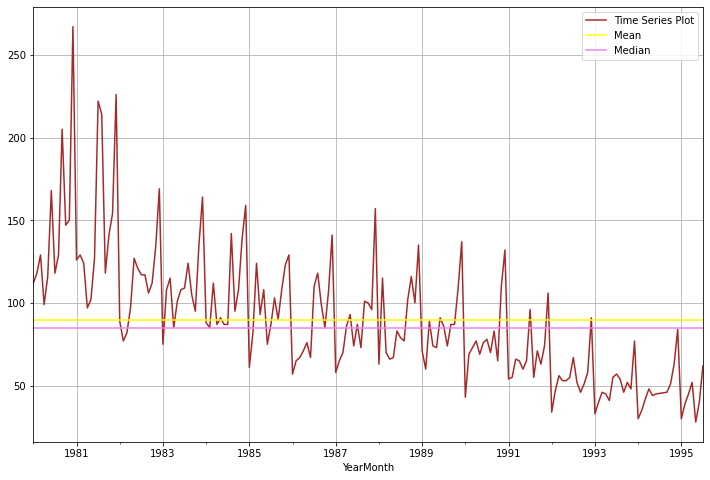

In [169]:
df2.plot(color='Brown')
plt.axhline(df2['Rose'].mean(),color='Yellow')
plt.axhline(df2['Rose'].median(),color='Violet')
plt.grid()
plt.legend(['Time Series Plot','Mean','Median']);

In [170]:
df1.index.month_name

<bound method inherit_from_data.<locals>.method of DatetimeIndex(['1980-01-01', '1980-02-01', '1980-03-01', '1980-04-01',
               '1980-05-01', '1980-06-01', '1980-07-01', '1980-08-01',
               '1980-09-01', '1980-10-01',
               ...
               '1994-10-01', '1994-11-01', '1994-12-01', '1995-01-01',
               '1995-02-01', '1995-03-01', '1995-04-01', '1995-05-01',
               '1995-06-01', '1995-07-01'],
              dtype='datetime64[ns]', name='YearMonth', length=187, freq=None)>

In [171]:
df2.index.month_name

<bound method inherit_from_data.<locals>.method of DatetimeIndex(['1980-01-01', '1980-02-01', '1980-03-01', '1980-04-01',
               '1980-05-01', '1980-06-01', '1980-07-01', '1980-08-01',
               '1980-09-01', '1980-10-01',
               ...
               '1994-10-01', '1994-11-01', '1994-12-01', '1995-01-01',
               '1995-02-01', '1995-03-01', '1995-04-01', '1995-05-01',
               '1995-06-01', '1995-07-01'],
              dtype='datetime64[ns]', name='YearMonth', length=187, freq=None)>

In [172]:
quarterly_sales_across_years1 = pd.pivot_table(df1, values = 'Sparkling', columns = df1.index.month_name(), index = df1.index.year)
quarterly_sales_across_years1

YearMonth   April  August  December  February  January    July    June  \
YearMonth                                                                
1980       1712.0  2453.0    5179.0    1591.0   1686.0  1966.0  1377.0   
1981       1976.0  2472.0    4551.0    1523.0   1530.0  1781.0  1480.0   
1982       1790.0  1897.0    4524.0    1329.0   1510.0  1954.0  1449.0   
1983       1375.0  2298.0    4923.0    1638.0   1609.0  1600.0  1245.0   
1984       1789.0  3159.0    5274.0    1435.0   1609.0  1597.0  1404.0   
1985       1589.0  2512.0    5434.0    1682.0   1771.0  1645.0  1379.0   
1986       1605.0  3318.0    5891.0    1523.0   1606.0  2584.0  1403.0   
1987       1935.0  1930.0    7242.0    1442.0   1389.0  1847.0  1250.0   
1988       2336.0  1645.0    6757.0    1779.0   1853.0  2230.0  1661.0   
1989       1650.0  1968.0    6694.0    1394.0   1757.0  1971.0  1406.0   
1990       1628.0  1605.0    6047.0    1321.0   1720.0  1899.0  1457.0   
1991       1279.0  1857.0    6153.0    2049.0   1902.0  2214.0  1540.0   
1992       1997.0  1773.0    6119.0    1667.0   1577.0  2076.0  1625.0   
1993       2121.0  2795.0    6410.0    1564.0   1494.0  2048.0  1515.0   
1994       1725.0  1495.0    5999.0    1968.0   1197.0  2031.0  1693.0   
1995       1862.0     NaN       NaN    1402.0   1070.0  2031.0  1688.0   

YearMonth   March     May  November  October  September  
YearMonth                                                
1980       2304.0  1471.0    4087.0   2596.0     1984.0  
1981       1633.0  1170.0    3857.0   2273.0     1981.0  
1982       1518.0  1537.0    3593.0   2514.0     1706.0  
1983       2030.0  1320.0    3440.0   2511.0     2191.0  
1984       2061.0  1567.0    4273.0   2504.0     1759.0  
1985       1846.0  1896.0    4388.0   3727.0     1771.0  
1986       1577.0  1765.0    3987.0   2349.0     1562.0  
1987       1548.0  1518.0    4405.0   3114.0     2638.0  
1988       2108.0  1728.0    4988.0   3740.0     2421.0  
1989       1982.0  1654.0    4514.0   3845.0     2608.0  
1990       1859.0  1615.0    4286.0   3116.0     2424.0  
1991       1874.0  1432.0    3627.0   3252.0     2408.0  
1992       1993.0  1783.0    4096.0   3088.0     2377.0  
1993       1898.0  1831.0    4227.0   3339.0     1749.0  
1994       1720.0  1674.0    3729.0   3385.0     2968.0  
1995       1897.0  1670.0       NaN      NaN        NaN

In [173]:
quarterly_sales_across_years2 = pd.pivot_table(df2, values = 'Rose', columns = df2.index.month_name(), index = df2.index.year)
quarterly_sales_across_years2

YearMonth  April      August  December  February  January        July   June  \
YearMonth                                                                      
1980        99.0  129.000000     267.0     118.0    112.0  118.000000  168.0   
1981        97.0  214.000000     226.0     129.0    126.0  222.000000  127.0   
1982        97.0  117.000000     169.0      77.0     89.0  117.000000  121.0   
1983        85.0  124.000000     164.0     108.0     75.0  109.000000  108.0   
1984        87.0  142.000000     159.0      85.0     88.0   87.000000   87.0   
1985        93.0  103.000000     129.0      82.0     61.0   87.000000   75.0   
1986        71.0  118.000000     141.0      65.0     57.0  110.000000   67.0   
1987        86.0   73.000000     157.0      65.0     58.0   87.000000   74.0   
1988        66.0   77.000000     135.0     115.0     63.0   79.000000   83.0   
1989        74.0   74.000000     137.0      60.0     71.0   86.000000   91.0   
1990        77.0   70.000000     132.0      69.0     43.0   78.000000   76.0   
1991        65.0   55.000000     106.0      55.0     54.0   96.000000   65.0   
1992        53.0   52.000000      91.0      47.0     34.0   67.000000   55.0   
1993        45.0   54.000000      77.0      40.0     33.0   57.000000   55.0   
1994        48.0   45.666667      84.0      35.0     30.0   45.333333   45.0   
1995        52.0         NaN       NaN      39.0     30.0   62.000000   40.0   

YearMonth  March    May  November  October  September  
YearMonth                                              
1980       129.0  116.0     150.0    147.0      205.0  
1981       124.0  102.0     154.0    141.0      118.0  
1982        82.0  127.0     134.0    112.0      106.0  
1983       115.0  101.0     135.0     95.0      105.0  
1984       112.0   91.0     139.0    108.0       95.0  
1985       124.0  108.0     123.0    108.0       90.0  
1986        67.0   76.0     107.0     85.0       99.0  
1987        70.0   93.0      96.0    100.0      101.0  
1988        70.0   67.0     100.0    116.0      102.0  
1989        89.0   73.0     109.0     87.0       87.0  
1990        73.0   69.0     110.0     65.0       83.0  
1991        66.0   60.0      74.0     63.0       71.0  
1992        56.0   53.0      58.0     51.0       46.0  
1993        46.0   41.0      48.0     52.0       46.0  
1994        42.0   44.0      63.0     51.0       46.0  
1995        45.0   28.0       NaN      NaN        NaN

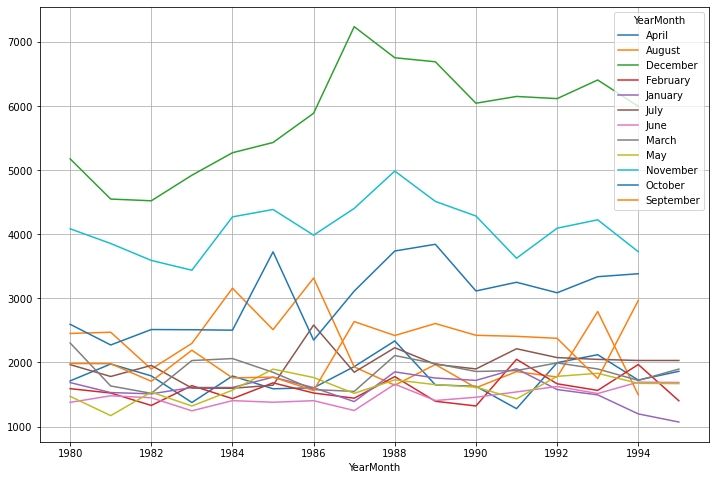

In [174]:
quarterly_sales_across_years1.plot()
plt.grid()

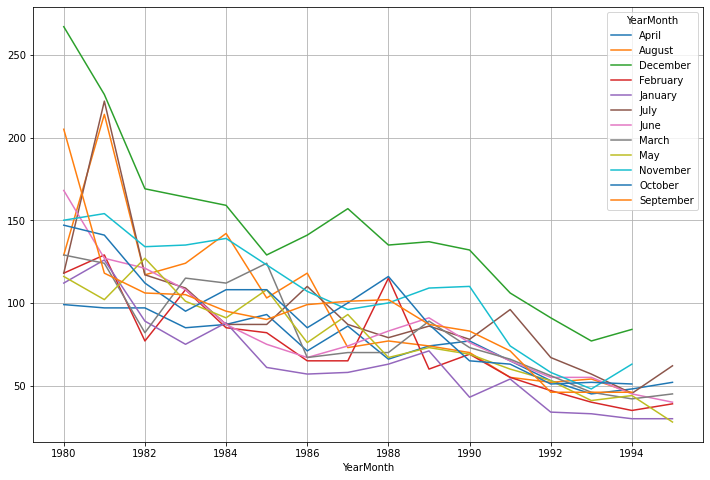

In [175]:
quarterly_sales_across_years2.plot()
plt.grid()

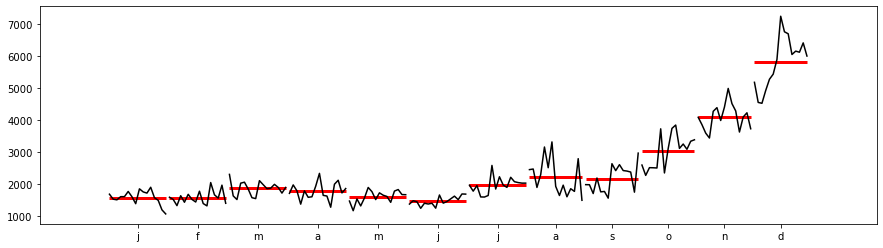

In [176]:
from statsmodels.graphics.tsaplots import month_plot
fig, ax = plt.subplots(figsize = (15,4))
month_plot(df1,ax = ax);

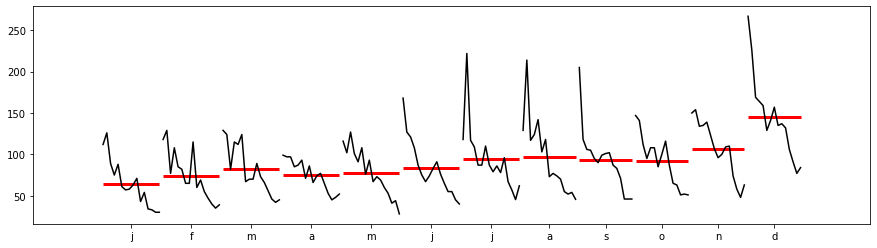

In [177]:
fig, ax = plt.subplots(figsize = (15,4))
month_plot(df2,ax = ax);

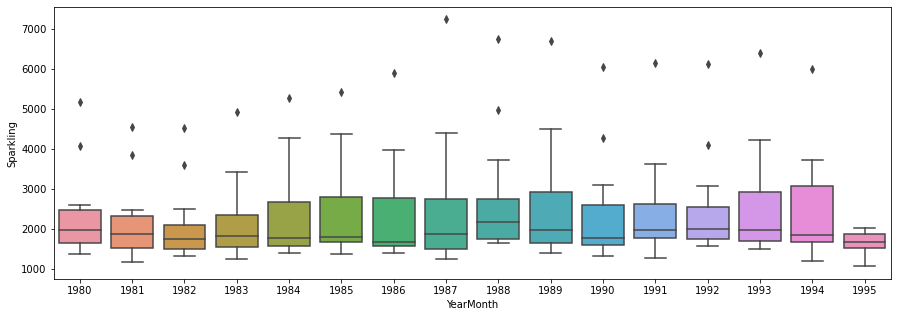

In [178]:
plt.figure(figsize = (15,5))
sns.boxplot(df1.index.year,df1['Sparkling']);

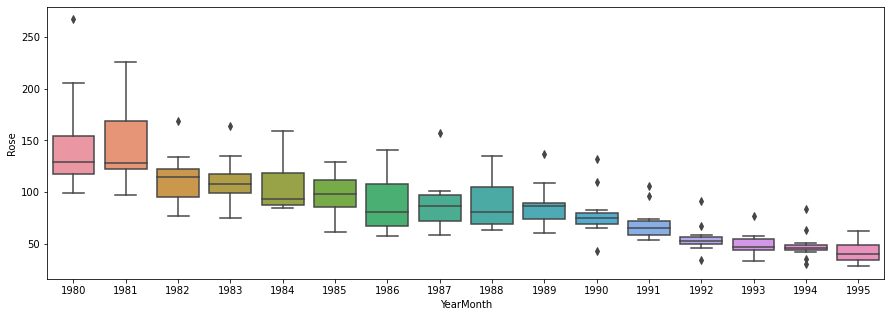

In [179]:
plt.figure(figsize = (15,5))
sns.boxplot(df2.index.year,df2['Rose']);

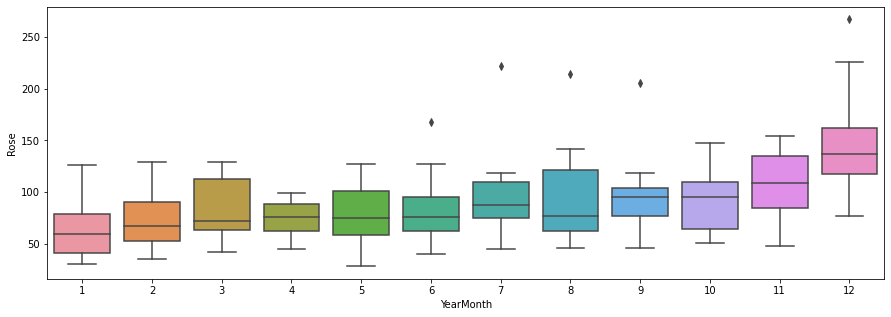

In [180]:
plt.figure(figsize = (15,5))
sns.boxplot(df2.index.month, df2['Rose']);

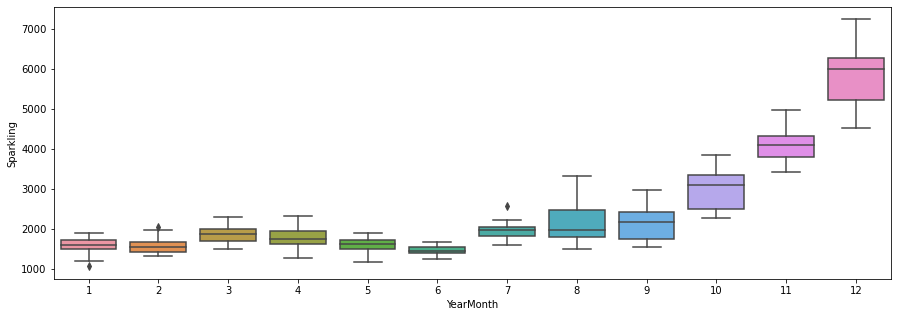

In [181]:
plt.figure(figsize = (15,5))
sns.boxplot(df1.index.month, df1['Sparkling']);

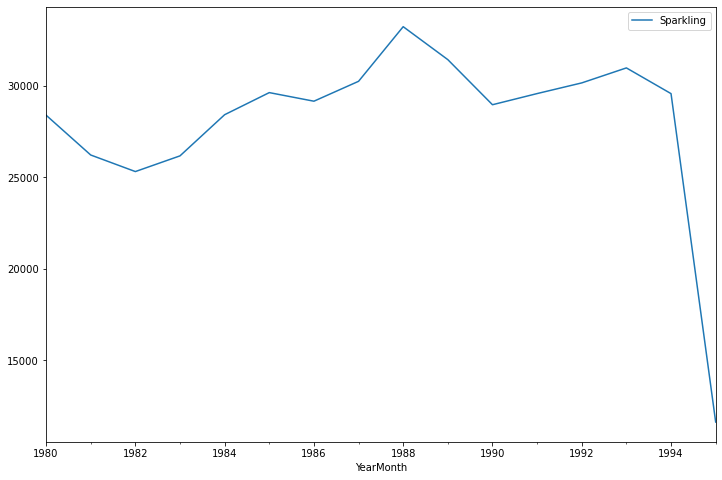

In [182]:
df1.resample('A').sum()[0:16].plot();

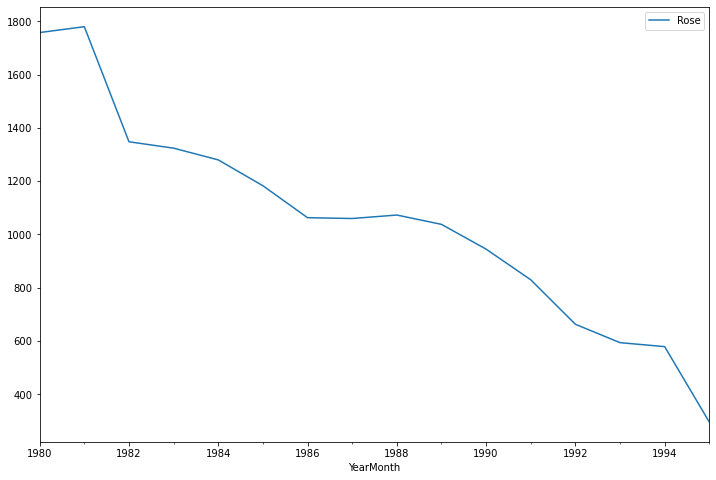

In [183]:
df2.resample('A').sum()[0:16].plot();

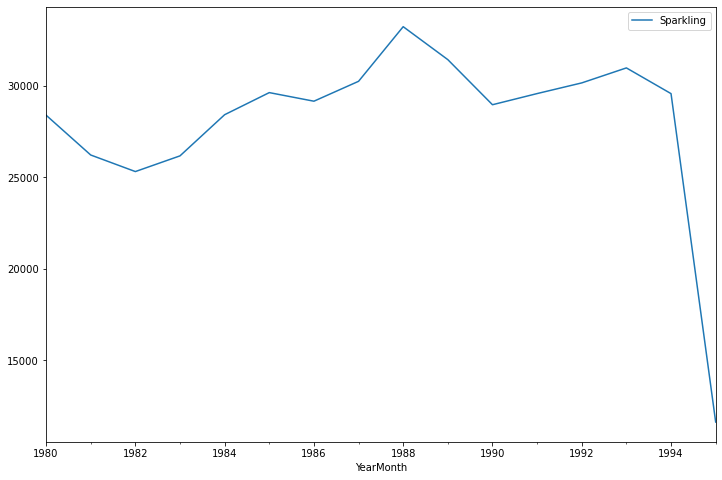

In [184]:
df1.resample('Y').sum()[0:16].plot();

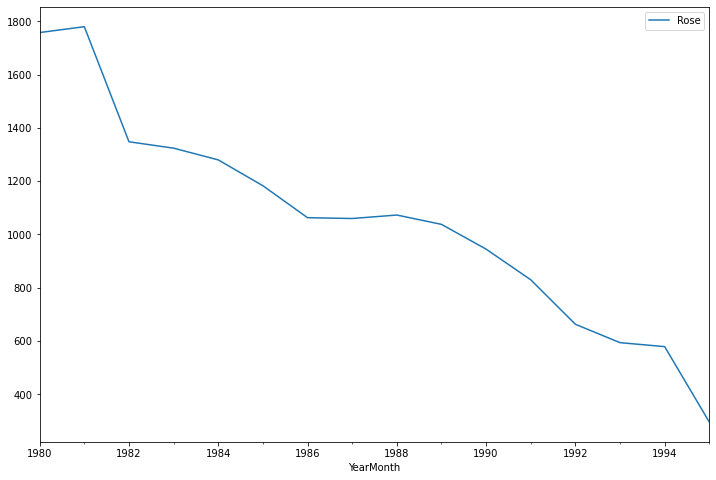

In [185]:
df2.resample('Y').sum()[0:16].plot();

(0.0, 180.0)

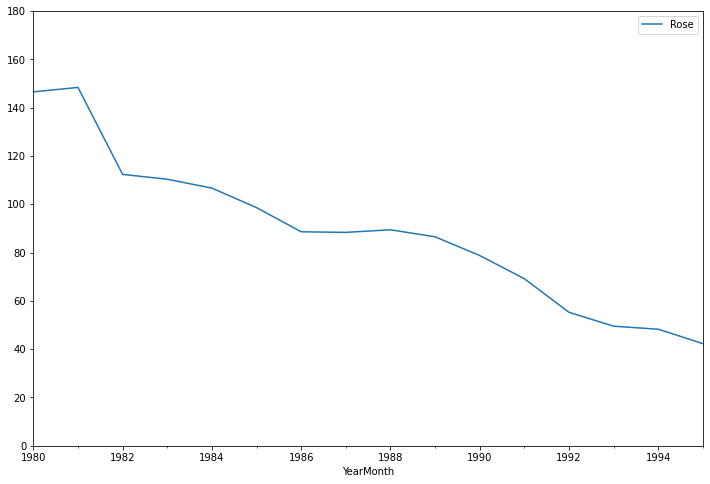

In [186]:
df2.resample('Y').mean()[0:16].plot();
plt.ylim(0,180)

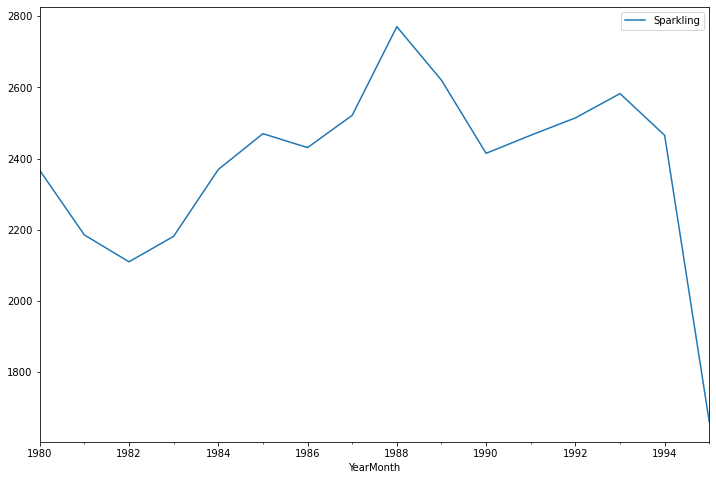

In [187]:
df1.resample('Y').mean()[0:16].plot();

<Figure size 1080x360 with 0 Axes>

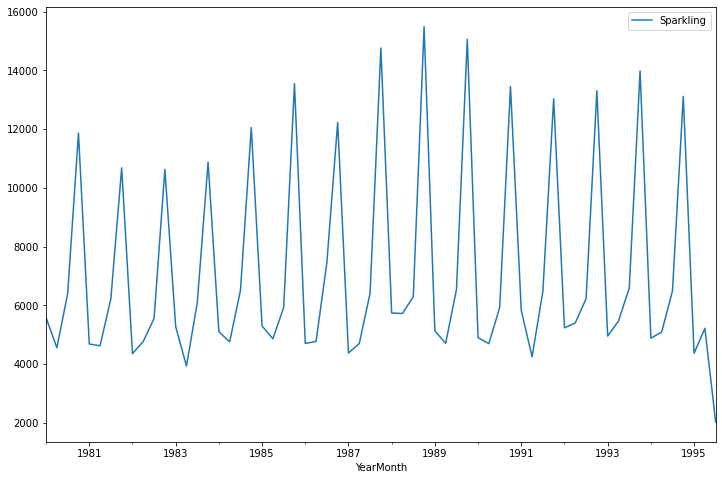

In [188]:
plt.figure(figsize = (15,5))
df1.resample('Q').sum().plot();

<Figure size 1080x360 with 0 Axes>

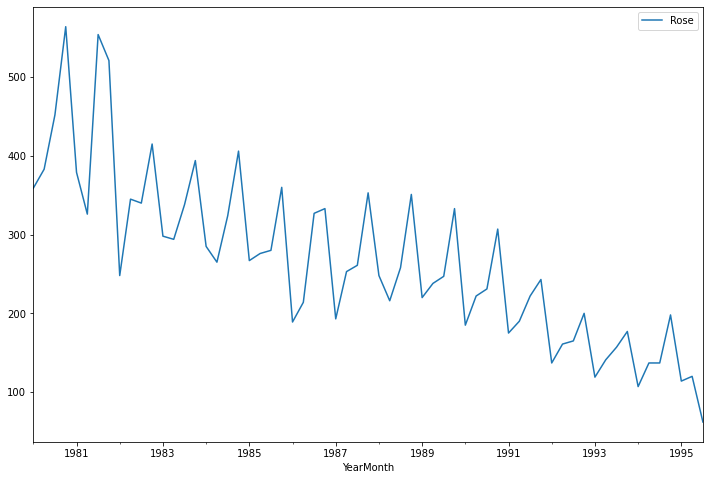

In [189]:
plt.figure(figsize = (15,5))
df2.resample('Q').sum().plot();

In [190]:
df_daily_sum1 = df1.resample('D').sum()
df_daily_sum1

Sparkling
YearMonth            
1980-01-01       1686
1980-01-02          0
1980-01-03          0
1980-01-04          0
1980-01-05          0
...               ...
1995-06-27          0
1995-06-28          0
1995-06-29          0
1995-06-30          0
1995-07-01       2031

[5661 rows x 1 columns]

In [191]:
df_daily_sum2 = df2.resample('D').sum()
df_daily_sum2

Rose
YearMonth        
1980-01-01  112.0
1980-01-02    0.0
1980-01-03    0.0
1980-01-04    0.0
1980-01-05    0.0
...           ...
1995-06-27    0.0
1995-06-28    0.0
1995-06-29    0.0
1995-06-30    0.0
1995-07-01   62.0

[5661 rows x 1 columns]

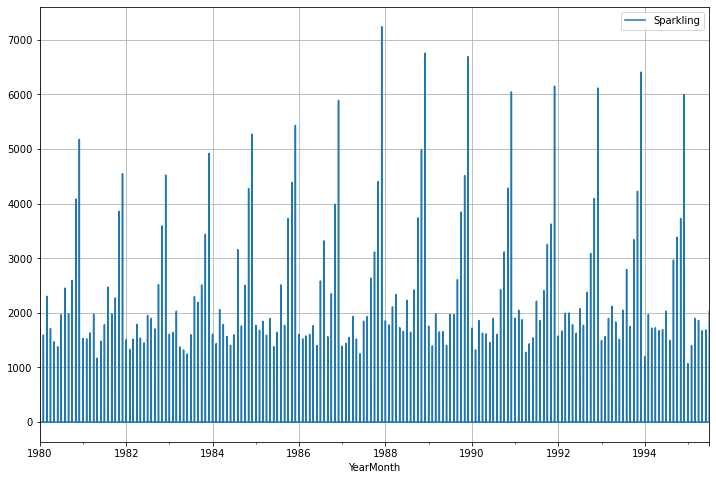

In [192]:
df_daily_sum1.plot()
plt.grid();

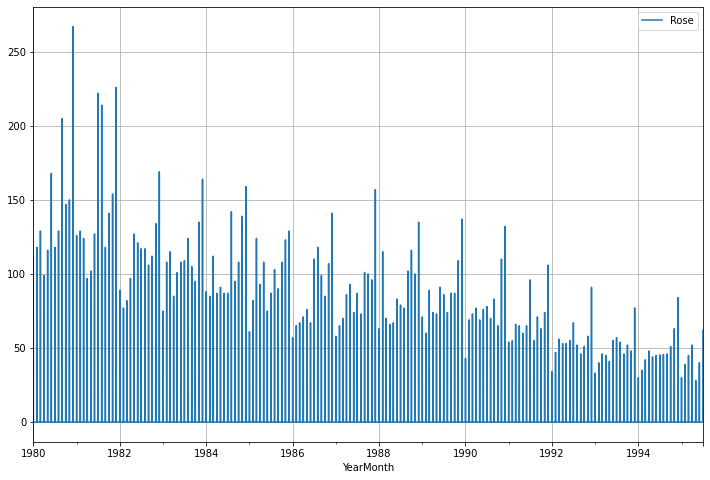

In [193]:
df_daily_sum2.plot()
plt.grid();

In [194]:
df1.resample('M').sum()

Sparkling
YearMonth            
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471
...               ...
1995-03-31       1897
1995-04-30       1862
1995-05-31       1670
1995-06-30       1688
1995-07-31       2031

[187 rows x 1 columns]

In [195]:
df2.resample('M').sum()

Rose
YearMonth        
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0
...           ...
1995-03-31   45.0
1995-04-30   52.0
1995-05-31   28.0
1995-06-30   40.0
1995-07-31   62.0

[187 rows x 1 columns]

In [196]:
df1.resample('W').sum()

Sparkling
YearMonth            
1980-01-06       1686
1980-01-13          0
1980-01-20          0
1980-01-27          0
1980-02-03       1591
...               ...
1995-06-04       1688
1995-06-11          0
1995-06-18          0
1995-06-25          0
1995-07-02       2031

[809 rows x 1 columns]

In [197]:
df2.resample('W').sum()

Rose
YearMonth        
1980-01-06  112.0
1980-01-13    0.0
1980-01-20    0.0
1980-01-27    0.0
1980-02-03  118.0
...           ...
1995-06-04   40.0
1995-06-11    0.0
1995-06-18    0.0
1995-06-25    0.0
1995-07-02   62.0

[809 rows x 1 columns]

In [198]:
from statsmodels.tsa.seasonal import seasonal_decompose
df1_add_decompose = seasonal_decompose(df1, model = 'additive', period = 12)

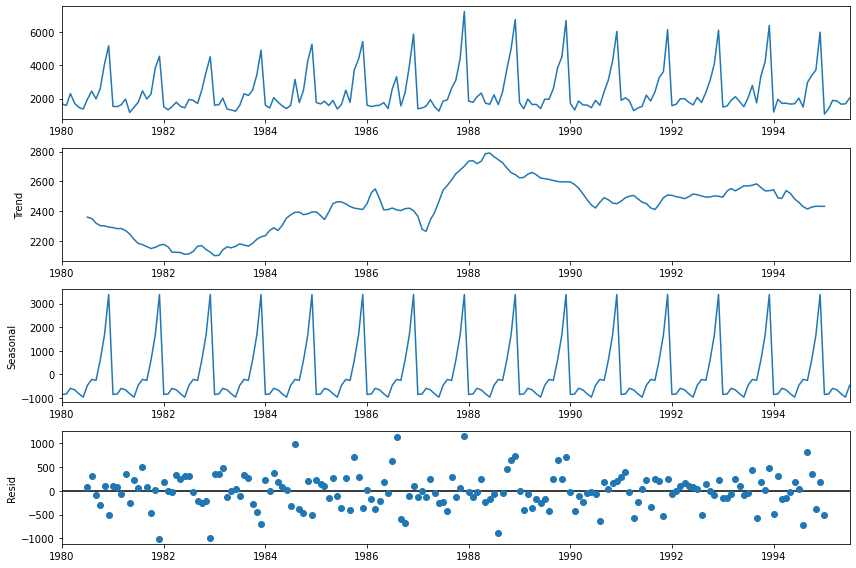

In [199]:
df1_add_decompose.plot()
plt.show()

In [200]:
trend_add1 = df1_add_decompose.trend
seasonality_add1 = df1_add_decompose.seasonal
residual_add1 = df1_add_decompose.resid

In [201]:
print('Trend','\n',trend_add1,'\n')
print('Seasonality','\n',seasonality_add1,'\n')
print('Residual','\n',residual_add1,'\n')

Trend 
 YearMonth
1980-01-01   NaN
1980-02-01   NaN
1980-03-01   NaN
1980-04-01   NaN
1980-05-01   NaN
              ..
1995-03-01   NaN
1995-04-01   NaN
1995-05-01   NaN
1995-06-01   NaN
1995-07-01   NaN
Name: trend, Length: 187, dtype: float64 

Seasonality 
 YearMonth
1980-01-01   -854.260599
1980-02-01   -830.350678
1980-03-01   -592.356630
1980-04-01   -658.490559
1980-05-01   -824.416154
                 ...    
1995-03-01   -592.356630
1995-04-01   -658.490559
1995-05-01   -824.416154
1995-06-01   -967.434011
1995-07-01   -465.502265
Name: seasonal, Length: 187, dtype: float64 

Residual 
 YearMonth
1980-01-01   NaN
1980-02-01   NaN
1980-03-01   NaN
1980-04-01   NaN
1980-05-01   NaN
              ..
1995-03-01   NaN
1995-04-01   NaN
1995-05-01   NaN
1995-06-01   NaN
1995-07-01   NaN
Name: resid, Length: 187, dtype: float64 



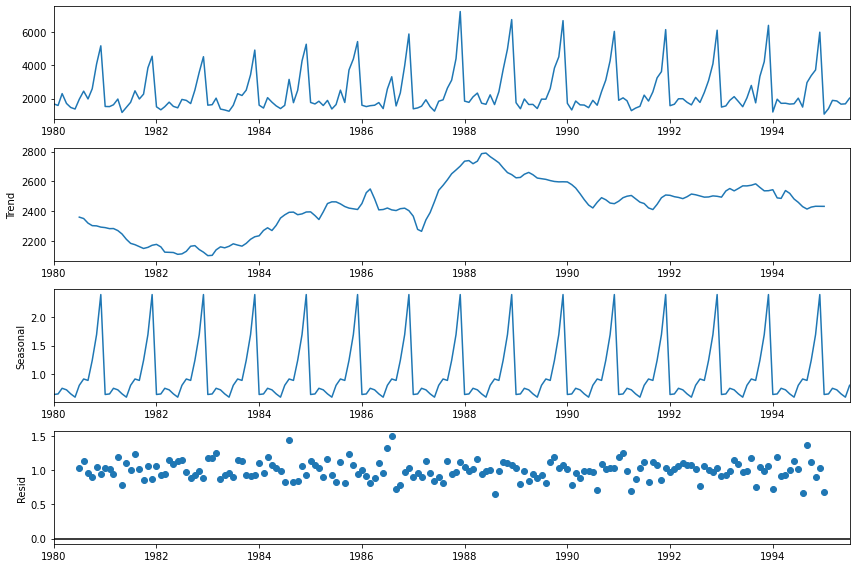

In [202]:
df1_mul_decompose = seasonal_decompose(df1, model = "multiplicative")
df1_mul_decompose.plot()
plt.show()

In [203]:
trend_mul1 = df1_mul_decompose.trend
seasonality_mul1 = df1_mul_decompose.seasonal
residual_mul1 = df1_mul_decompose.resid

In [204]:
print('Trend','\n',trend_mul1,'\n')
print('Seasonality','\n',seasonality_mul1,'\n')
print('Residual','\n',residual_mul1,'\n')

Trend 
 YearMonth
1980-01-01   NaN
1980-02-01   NaN
1980-03-01   NaN
1980-04-01   NaN
1980-05-01   NaN
              ..
1995-03-01   NaN
1995-04-01   NaN
1995-05-01   NaN
1995-06-01   NaN
1995-07-01   NaN
Name: trend, Length: 187, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.649843
1980-02-01    0.659214
1980-03-01    0.757440
1980-04-01    0.730351
1980-05-01    0.660609
                ...   
1995-03-01    0.757440
1995-04-01    0.730351
1995-05-01    0.660609
1995-06-01    0.603468
1995-07-01    0.809164
Name: seasonal, Length: 187, dtype: float64 

Residual 
 YearMonth
1980-01-01   NaN
1980-02-01   NaN
1980-03-01   NaN
1980-04-01   NaN
1980-05-01   NaN
              ..
1995-03-01   NaN
1995-04-01   NaN
1995-05-01   NaN
1995-06-01   NaN
1995-07-01   NaN
Name: resid, Length: 187, dtype: float64 



In [205]:
df2_add_decompose = seasonal_decompose(df2, model = 'additive', period = 12)

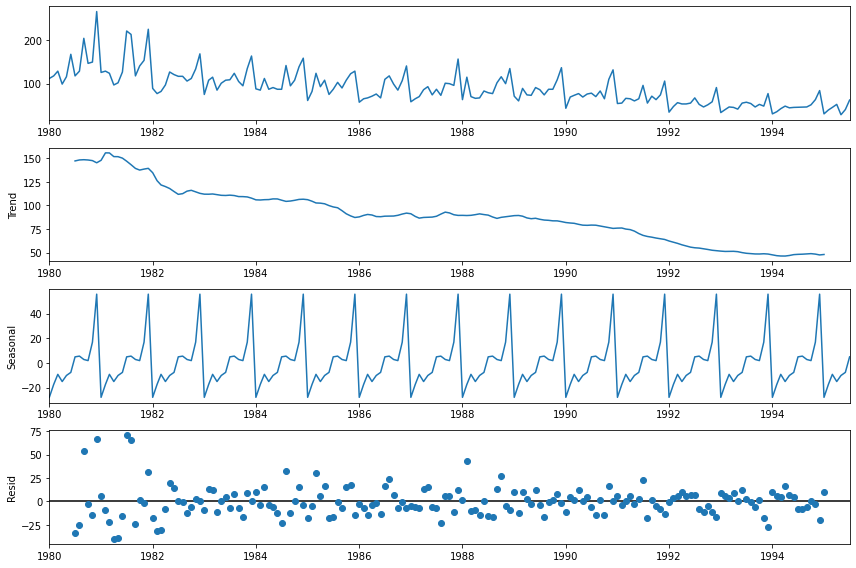

In [206]:
df2_add_decompose.plot()
plt.show()

In [207]:
trend_add2 = df2_add_decompose.trend
seasonality_add2 = df2_add_decompose.seasonal
residual_add2 = df2_add_decompose.resid

In [208]:
print('Trend','\n',trend_add2,'\n')
print('Seasonality','\n',seasonality_add2,'\n')
print('Residual','\n',residual_add2,'\n')

Trend 
 YearMonth
1980-01-01   NaN
1980-02-01   NaN
1980-03-01   NaN
1980-04-01   NaN
1980-05-01   NaN
              ..
1995-03-01   NaN
1995-04-01   NaN
1995-05-01   NaN
1995-06-01   NaN
1995-07-01   NaN
Name: trend, Length: 187, dtype: float64 

Seasonality 
 YearMonth
1980-01-01   -27.908647
1980-02-01   -17.435632
1980-03-01    -9.285830
1980-04-01   -15.098330
1980-05-01   -10.196544
                ...    
1995-03-01    -9.285830
1995-04-01   -15.098330
1995-05-01   -10.196544
1995-06-01    -7.678687
1995-07-01     4.896908
Name: seasonal, Length: 187, dtype: float64 

Residual 
 YearMonth
1980-01-01   NaN
1980-02-01   NaN
1980-03-01   NaN
1980-04-01   NaN
1980-05-01   NaN
              ..
1995-03-01   NaN
1995-04-01   NaN
1995-05-01   NaN
1995-06-01   NaN
1995-07-01   NaN
Name: resid, Length: 187, dtype: float64 



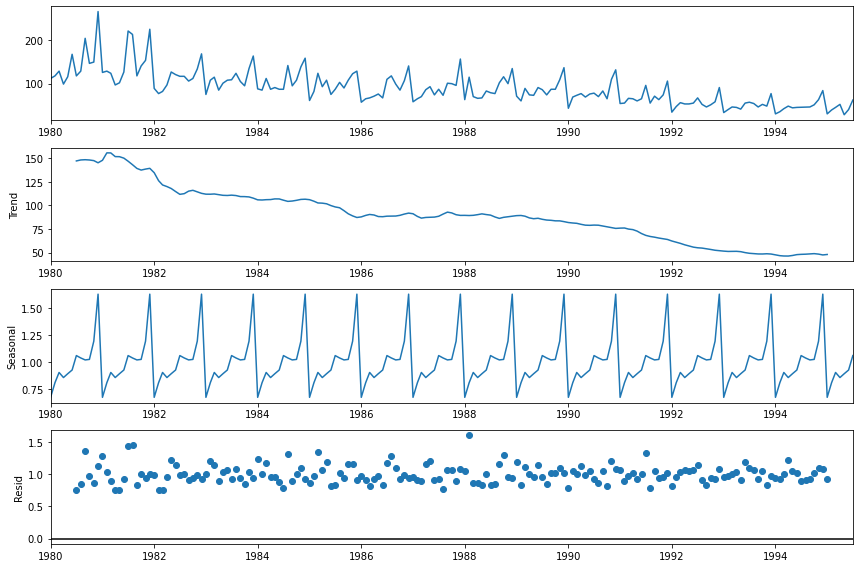

In [209]:
df2_mul_decompose = seasonal_decompose(df2, model = "multiplicative")
df2_mul_decompose.plot()
plt.show()

In [210]:
trend_mul2 = df2_mul_decompose.trend
seasonality_mul2 = df2_mul_decompose.seasonal
residual_mul2 = df2_mul_decompose.resid

In [211]:
print('Trend','\n',trend_mul2,'\n')
print('Seasonality','\n',seasonality_mul2,'\n')
print('Residual','\n',residual_mul2,'\n')

Trend 
 YearMonth
1980-01-01   NaN
1980-02-01   NaN
1980-03-01   NaN
1980-04-01   NaN
1980-05-01   NaN
              ..
1995-03-01   NaN
1995-04-01   NaN
1995-05-01   NaN
1995-06-01   NaN
1995-07-01   NaN
Name: trend, Length: 187, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.670111
1980-02-01    0.806163
1980-03-01    0.901164
1980-04-01    0.854024
1980-05-01    0.889415
                ...   
1995-03-01    0.901164
1995-04-01    0.854024
1995-05-01    0.889415
1995-06-01    0.923985
1995-07-01    1.058038
Name: seasonal, Length: 187, dtype: float64 

Residual 
 YearMonth
1980-01-01   NaN
1980-02-01   NaN
1980-03-01   NaN
1980-04-01   NaN
1980-05-01   NaN
              ..
1995-03-01   NaN
1995-04-01   NaN
1995-05-01   NaN
1995-06-01   NaN
1995-07-01   NaN
Name: resid, Length: 187, dtype: float64 



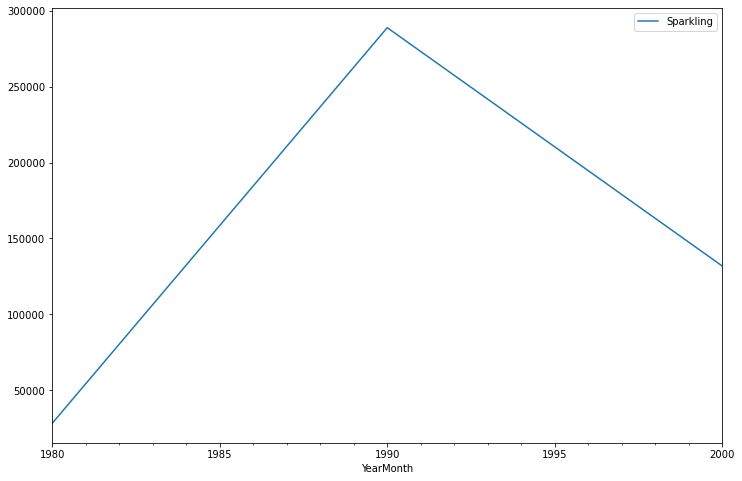

In [212]:
df1.resample('10Y').sum().plot();

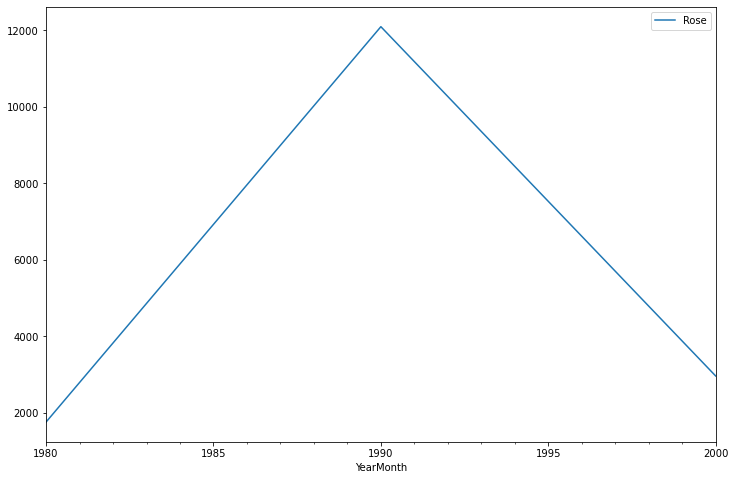

In [213]:
df2.resample('10Y').sum().plot();

In [214]:
constructed1 = trend_add1 + seasonality_add1 
constructed1

YearMonth
1980-01-01   NaN
1980-02-01   NaN
1980-03-01   NaN
1980-04-01   NaN
1980-05-01   NaN
              ..
1995-03-01   NaN
1995-04-01   NaN
1995-05-01   NaN
1995-06-01   NaN
1995-07-01   NaN
Length: 187, dtype: float64

<Figure size 1080x360 with 0 Axes>

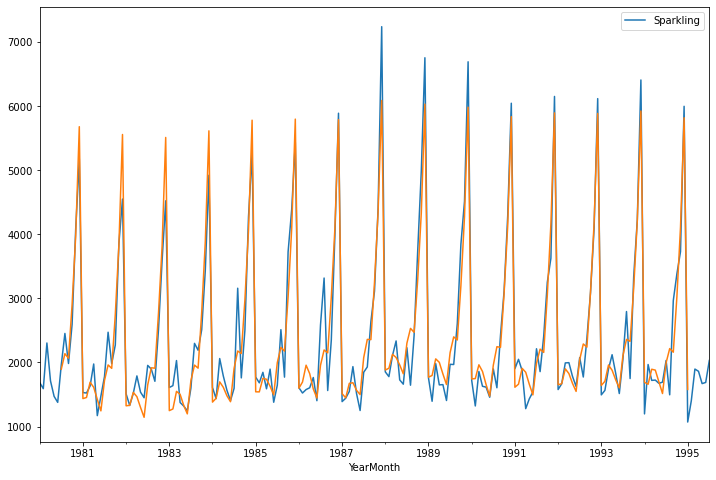

In [215]:
plt.figure(figsize=(15,5))
df1.plot();
constructed1.plot();

In [216]:
constructed2 = trend_mul1 * seasonality_mul1 
constructed2

YearMonth
1980-01-01   NaN
1980-02-01   NaN
1980-03-01   NaN
1980-04-01   NaN
1980-05-01   NaN
              ..
1995-03-01   NaN
1995-04-01   NaN
1995-05-01   NaN
1995-06-01   NaN
1995-07-01   NaN
Length: 187, dtype: float64

<Figure size 1080x360 with 0 Axes>

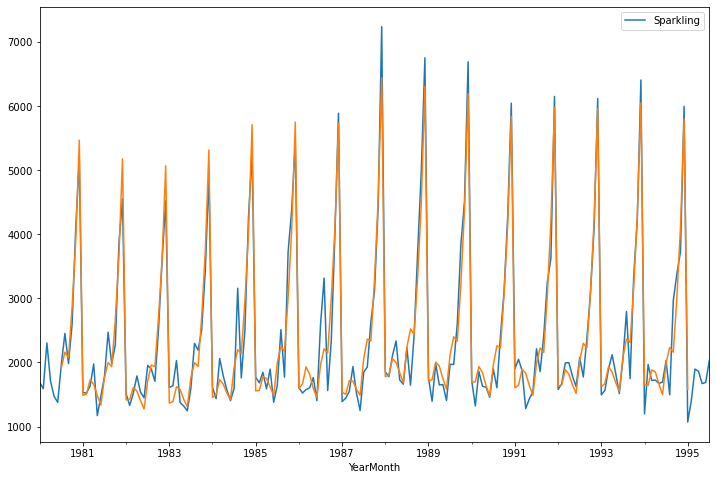

In [217]:
plt.figure(figsize=(15,5))
df1.plot();
constructed2.plot();

In [218]:
constructed3 = trend_add2 + seasonality_add2 
constructed3

YearMonth
1980-01-01   NaN
1980-02-01   NaN
1980-03-01   NaN
1980-04-01   NaN
1980-05-01   NaN
              ..
1995-03-01   NaN
1995-04-01   NaN
1995-05-01   NaN
1995-06-01   NaN
1995-07-01   NaN
Length: 187, dtype: float64

<Figure size 1080x360 with 0 Axes>

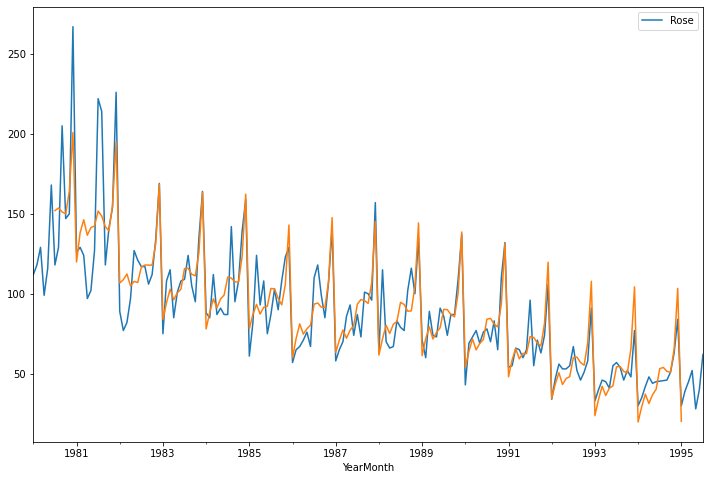

In [219]:
plt.figure(figsize=(15,5))
df2.plot();
constructed3.plot();

In [220]:
constructed4 = trend_mul2 * seasonality_mul2 
constructed4

YearMonth
1980-01-01   NaN
1980-02-01   NaN
1980-03-01   NaN
1980-04-01   NaN
1980-05-01   NaN
              ..
1995-03-01   NaN
1995-04-01   NaN
1995-05-01   NaN
1995-06-01   NaN
1995-07-01   NaN
Length: 187, dtype: float64

<Figure size 1080x360 with 0 Axes>

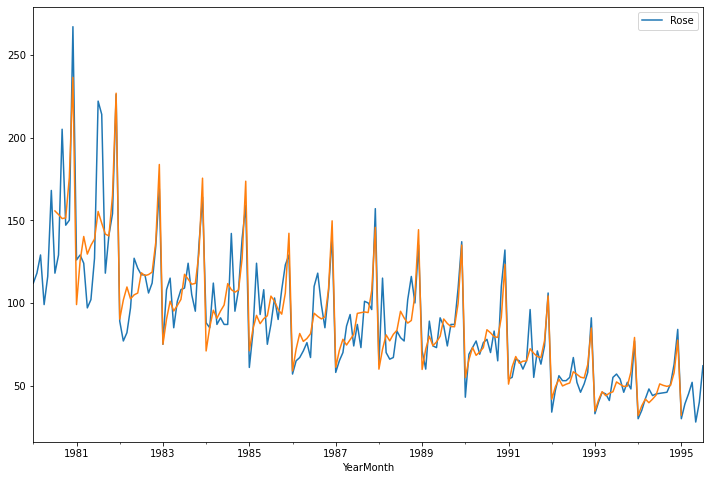

In [221]:
plt.figure(figsize=(15,5))
df2.plot();
constructed4.plot();

In [222]:
train1    =   df1[df1.index<'1991'] 
test1     =   df1[df1.index>='1991']

In [223]:
print(train1.shape)
print(test1.shape)

(132, 1)
(55, 1)


In [224]:
print('First few rows of Sparkling Training Data','\n',train1.head(),'\n')
print('Last few rows of Sparkling Training Data','\n',train1.tail(),'\n')
print('First few rows of Sparkling Test Data','\n',test1.head(),'\n')
print('Last few rows of Sparkling Test Data','\n',test1.tail(),'\n')

First few rows of Sparkling Training Data 
             Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471 

Last few rows of Sparkling Training Data 
             Sparkling
YearMonth            
1990-08-01       1605
1990-09-01       2424
1990-10-01       3116
1990-11-01       4286
1990-12-01       6047 

First few rows of Sparkling Test Data 
             Sparkling
YearMonth            
1991-01-01       1902
1991-02-01       2049
1991-03-01       1874
1991-04-01       1279
1991-05-01       1432 

Last few rows of Sparkling Test Data 
             Sparkling
YearMonth            
1995-03-01       1897
1995-04-01       1862
1995-05-01       1670
1995-06-01       1688
1995-07-01       2031 



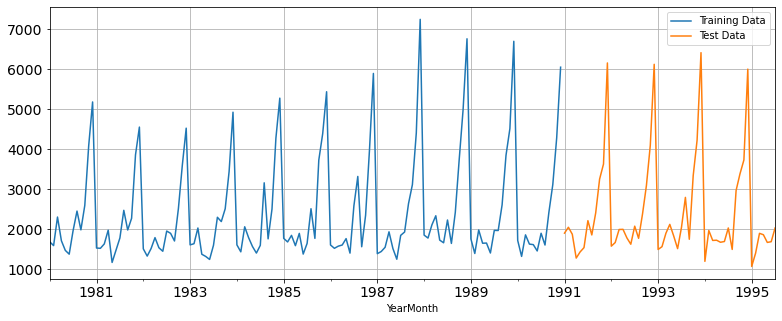

In [225]:
train1['Sparkling'].plot(figsize=(13,5), fontsize=14)
test1['Sparkling'].plot(figsize=(13,5), fontsize=14)
plt.grid();
plt.legend(['Training Data','Test Data'])
plt.show();

In [226]:
train2 = df2[df2.index<'1991'] 
test2 = df2[df2.index>='1991']

In [227]:
print('Training Data')
display(train2)
print('Test Data')
display(test2)

Training Data


Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0
...           ...
1990-08-01   70.0
1990-09-01   83.0
1990-10-01   65.0
1990-11-01  110.0
1990-12-01  132.0

[132 rows x 1 columns]

Test Data


Rose
YearMonth             
1991-01-01   54.000000
1991-02-01   55.000000
1991-03-01   66.000000
1991-04-01   65.000000
1991-05-01   60.000000
1991-06-01   65.000000
1991-07-01   96.000000
1991-08-01   55.000000
1991-09-01   71.000000
1991-10-01   63.000000
1991-11-01   74.000000
1991-12-01  106.000000
1992-01-01   34.000000
1992-02-01   47.000000
1992-03-01   56.000000
1992-04-01   53.000000
1992-05-01   53.000000
1992-06-01   55.000000
1992-07-01   67.000000
1992-08-01   52.000000
1992-09-01   46.000000
1992-10-01   51.000000
1992-11-01   58.000000
1992-12-01   91.000000
1993-01-01   33.000000
1993-02-01   40.000000
1993-03-01   46.000000
1993-04-01   45.000000
1993-05-01   41.000000
1993-06-01   55.000000
1993-07-01   57.000000
1993-08-01   54.000000
1993-09-01   46.000000
1993-10-01   52.000000
1993-11-01   48.000000
1993-12-01   77.000000
1994-01-01   30.000000
1994-02-01   35.000000
1994-03-01   42.000000
1994-04-01   48.000000
1994-05-01   44.000000
1994-06-01   45.000000
1994-07-01   45.333333
1994-08-01   45.666667
1994-09-01   46.000000
1994-10-01   51.000000
1994-11-01   63.000000
1994-12-01   84.000000
1995-01-01   30.000000
1995-02-01   39.000000
1995-03-01   45.000000
1995-04-01   52.000000
1995-05-01   28.000000
1995-06-01   40.000000
1995-07-01   62.000000

In [228]:
print(train2.shape)
print(test2.shape)

(132, 1)
(55, 1)


In [229]:
print('First few rows of Rose Training Data','\n',train2.head(),'\n')
print('Last few rows of Rose Training Data','\n',train2.tail(),'\n')
print('First few rows of Rose Test Data','\n',test2.head(),'\n')
print('Last few rows of Rose Test Data','\n',test2.tail(),'\n')

First few rows of Rose Training Data 
              Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0 

Last few rows of Rose Training Data 
              Rose
YearMonth        
1990-08-01   70.0
1990-09-01   83.0
1990-10-01   65.0
1990-11-01  110.0
1990-12-01  132.0 

First few rows of Rose Test Data 
             Rose
YearMonth       
1991-01-01  54.0
1991-02-01  55.0
1991-03-01  66.0
1991-04-01  65.0
1991-05-01  60.0 

Last few rows of Rose Test Data 
             Rose
YearMonth       
1995-03-01  45.0
1995-04-01  52.0
1995-05-01  28.0
1995-06-01  40.0
1995-07-01  62.0 



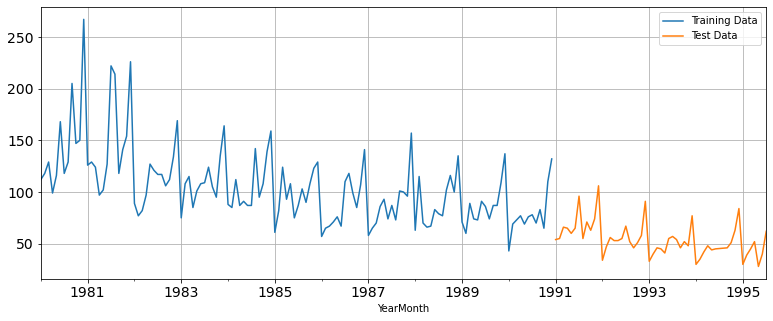

In [230]:
train2['Rose'].plot(figsize=(13,5), fontsize=14)
test2['Rose'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

In [231]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [232]:
SES_train1 = train1.copy()
SES_test1 = test1.copy()

In [233]:
model_SES1 = SimpleExpSmoothing(SES_train1['Sparkling'])

In [234]:
model_SES1_autofit = model_SES1.fit(optimized=True)

In [235]:
model_SES1_autofit.params

{'smoothing_level': 0.04960659884563118,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1818.5047543457245,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [236]:
SES_test1['predict'] = model_SES1_autofit.forecast(steps=len(test1))
SES_test1.head()

Sparkling      predict
YearMonth                         
1991-01-01       1902  2724.929339
1991-02-01       2049  2724.929339
1991-03-01       1874  2724.929339
1991-04-01       1279  2724.929339
1991-05-01       1432  2724.929339

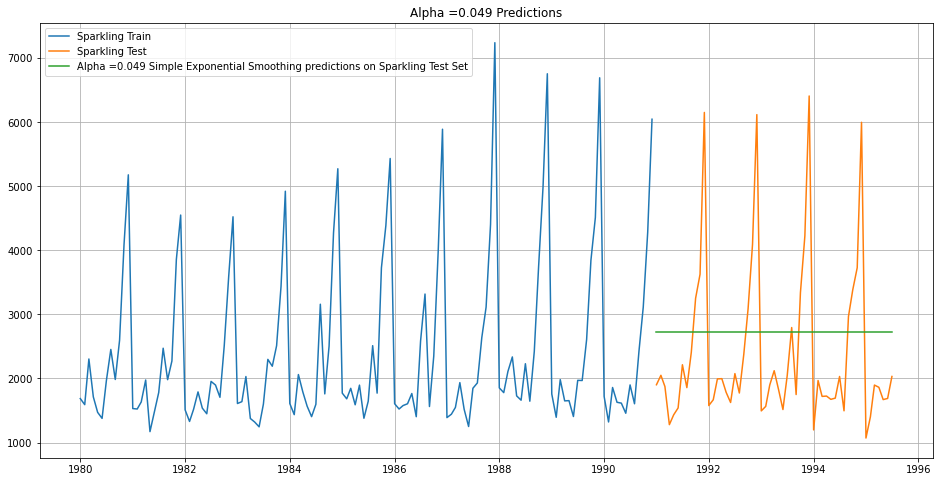

In [237]:
plt.figure(figsize=(16,8))
plt.plot(SES_train1['Sparkling'], label='Sparkling Train')
plt.plot(SES_test1['Sparkling'], label='Sparkling Test')

plt.plot(SES_test1['predict'], label='Alpha =0.049 Simple Exponential Smoothing predictions on Sparkling Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.049 Predictions');

In [238]:
rmse_model5_test_1 = metrics.mean_squared_error(SES_test1['Sparkling'],SES_test1['predict'],squared=False)
print("For Alpha =0.049 Simple Exponential Smoothing Model forecast on the Sparkling Test Data, RMSE is %3.3f" %(rmse_model5_test_1))

For Alpha =0.049 Simple Exponential Smoothing Model forecast on the Sparkling Test Data, RMSE is 1316.035


In [239]:
resultsDf_9 = pd.DataFrame({'Sparkling Test RMSE': [rmse_model5_test_1]},index=['Alpha=0.049,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf_9])
resultsDf

Sparkling Test RMSE
Alpha=0.049,SimpleExponentialSmoothing          1316.034674

In [240]:
resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Sparkling Test RMSE': []})
resultsDf_6

Empty DataFrame
Columns: [Alpha Values, Sparkling Test RMSE]
Index: []

In [241]:
for i in np.arange(0.3,1,0.1):
    model_SES_alpha_i = model_SES1.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_test1['predict',i] = model_SES_alpha_i.forecast(steps=len(test1))
    
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test1['Sparkling'],SES_test1['predict',i],squared=False)
    
    resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Sparkling Test RMSE':rmse_model5_test_i}, ignore_index=True)

In [242]:
resultsDf_6.sort_values(by=['Sparkling Test RMSE'],ascending=True)

Alpha Values  Sparkling Test RMSE
0           0.3          1935.507132
1           0.4          2311.919615
2           0.5          2666.351413
3           0.6          2979.204388
4           0.7          3249.944092
5           0.8          3483.801006
6           0.9          3686.794285

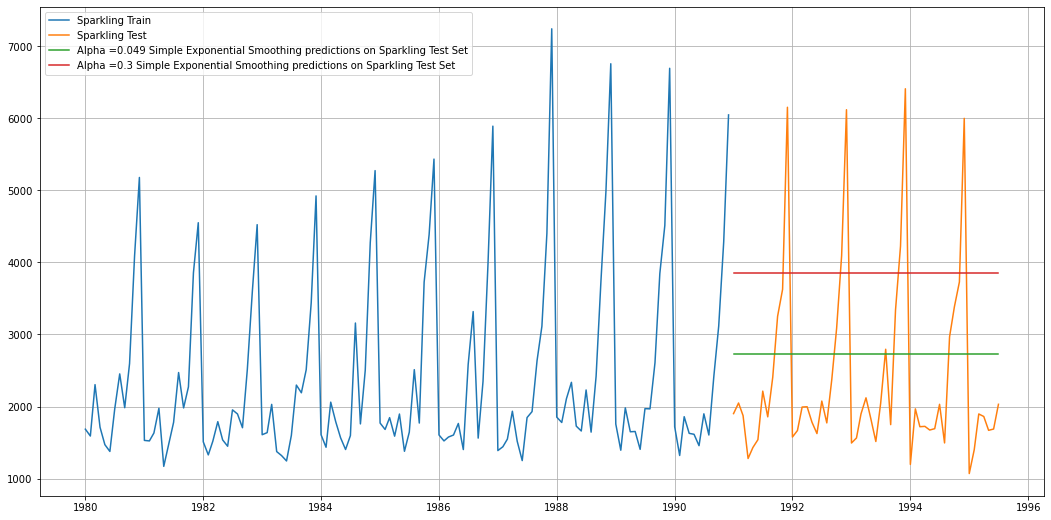

In [243]:
plt.figure(figsize=(18,9))
plt.plot(SES_train1['Sparkling'], label='Sparkling Train')
plt.plot(SES_test1['Sparkling'], label='Sparkling Test')

plt.plot(SES_test1['predict'], label='Alpha =0.049 Simple Exponential Smoothing predictions on Sparkling Test Set')

plt.plot(SES_test1['predict', 0.3], label='Alpha =0.3 Simple Exponential Smoothing predictions on Sparkling Test Set')



plt.legend(loc='best')
plt.grid();

In [244]:
resultsDf_9_1 = pd.DataFrame({'Sparkling Test RMSE': [resultsDf_6.sort_values(by=['Sparkling Test RMSE'],ascending=True).values[0][1]]}
                           ,index=['Alpha=0.3,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_9_1])
resultsDf

Sparkling Test RMSE
Alpha=0.049,SimpleExponentialSmoothing          1316.034674
Alpha=0.3,SimpleExponentialSmoothing            1935.507132

In [245]:
DES_train1 = train1.copy()
DES_test1 = test1.copy()

In [246]:
model_DES1 = Holt(DES_train1['Sparkling'])

In [247]:
resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Sparkling Test RMSE': []})
resultsDf_7

Empty DataFrame
Columns: [Alpha Values, Beta Values, Sparkling Test RMSE]
Index: []

In [248]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        model_DES_alpha_i_j = model_DES1.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_test1['predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(test1))
        
        
        rmse_model6_test = metrics.mean_squared_error(DES_test1['Sparkling'],DES_test1['predict',i,j],squared=False)
        
        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Sparkling Test RMSE':rmse_model6_test}, ignore_index=True)

In [249]:
resultsDf_7

Alpha Values  Beta Values  Sparkling Test RMSE
0            0.3          0.3         18259.110704
1            0.3          0.4         26069.841401
2            0.3          0.5         34401.512440
3            0.3          0.6         42162.748095
4            0.3          0.7         47832.397419
..           ...          ...                  ...
59           1.0          0.6         49327.087977
60           1.0          0.7         52655.765663
61           1.0          0.8         55442.273880
62           1.0          0.9         57823.177011
63           1.0          1.0         59877.076519

[64 rows x 3 columns]

In [250]:
resultsDf_7.sort_values(by=['Sparkling Test RMSE']).head()

Alpha Values  Beta Values  Sparkling Test RMSE
0            0.3          0.3         18259.110704
8            0.4          0.3         23878.496940
1            0.3          0.4         26069.841401
16           0.5          0.3         27095.532414
24           0.6          0.3         29070.722592

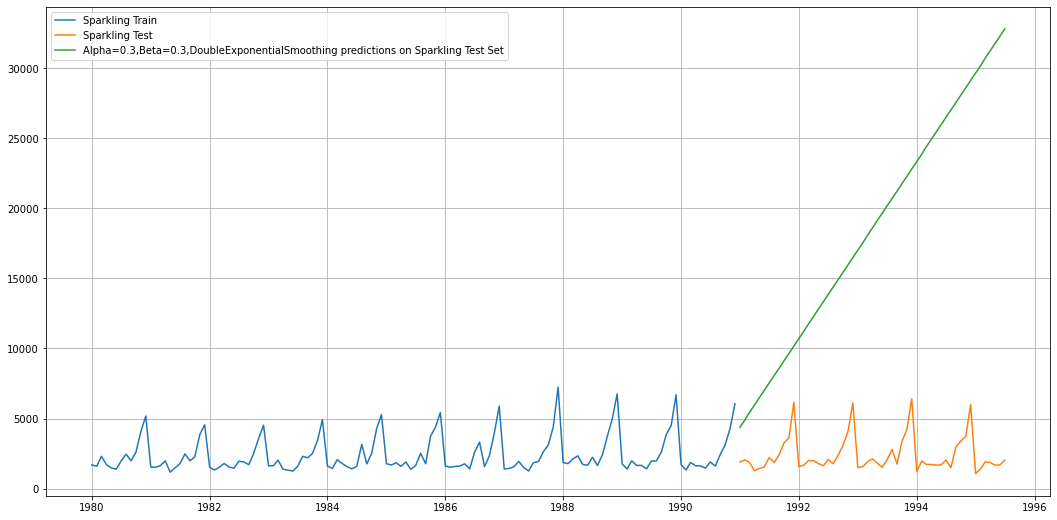

In [251]:
plt.figure(figsize=(18,9))
plt.plot(DES_train1['Sparkling'], label='Sparkling Train')
plt.plot(DES_test1['Sparkling'], label='Sparkling Test')

plt.plot(DES_test1['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Sparkling Test Set')


plt.legend(loc='best')
plt.grid();

In [252]:
resultsDf_9_2 = pd.DataFrame({'Sparkling Test RMSE': [resultsDf_7.sort_values(by=['Sparkling Test RMSE']).values[0][2]]}
                           ,index=['Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_9_2])
resultsDf

Sparkling Test RMSE
Alpha=0.049,SimpleExponentialSmoothing                 1316.034674
Alpha=0.3,SimpleExponentialSmoothing                   1935.507132
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing         18259.110704

In [253]:
TES_train1 = train1.copy()
TES_test1 = test1.copy()

In [254]:
model_TES1 = ExponentialSmoothing(TES_train1['Sparkling'],trend='additive',seasonal='multiplicative')

In [255]:
model_TES1_autofit = model_TES1.fit()

In [256]:
model_TES1_autofit.params

{'smoothing_level': 0.11057044018305404,
 'smoothing_trend': 0.06076609768412894,
 'smoothing_seasonal': 0.39187601902826213,
 'damping_trend': nan,
 'initial_level': 1621.806699459997,
 'initial_trend': -8.175193580026457,
 'initial_seasons': array([1.07304448, 1.02730389, 1.39469706, 1.20333193, 0.98008967,
        0.97664181, 1.39261648, 1.70888984, 1.37519684, 1.81953245,
        2.82880203, 3.59142504]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [257]:
TES_test1['auto_predict'] = model_TES1_autofit.forecast(steps=len(test1))
TES_test1.head()

Sparkling  auto_predict
YearMonth                          
1991-01-01       1902   1578.528263
1991-02-01       2049   1336.087202
1991-03-01       1874   1747.686817
1991-04-01       1279   1632.972086
1991-05-01       1432   1525.031468

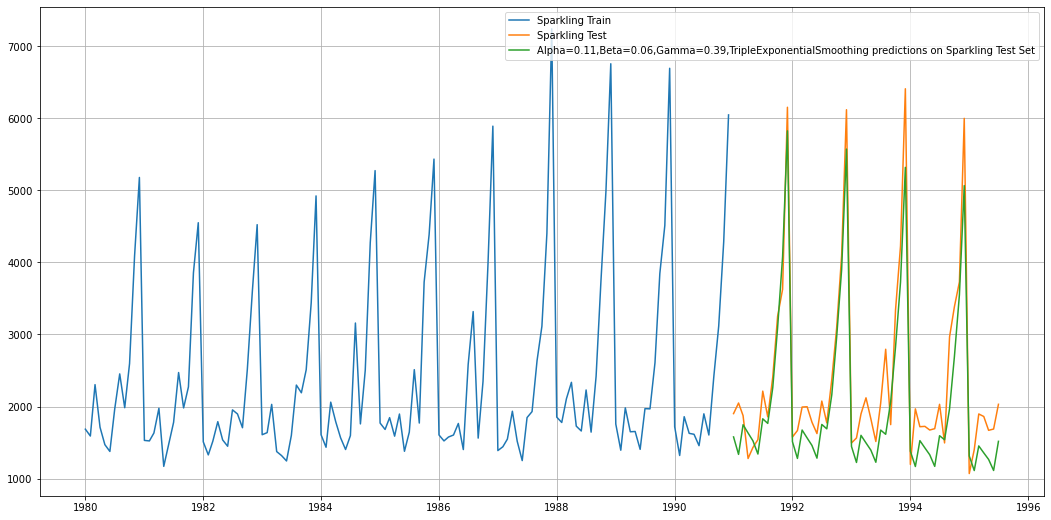

In [258]:
plt.figure(figsize=(18,9))
plt.plot(TES_train1['Sparkling'], label='Sparkling Train')
plt.plot(TES_test1['Sparkling'], label='Sparkling Test')

plt.plot(TES_test1['auto_predict'], label='Alpha=0.11,Beta=0.06,Gamma=0.39,TripleExponentialSmoothing predictions on Sparkling Test Set')


plt.legend(loc='best')
plt.grid();

In [259]:
rmse_model6_test_1 = metrics.mean_squared_error(TES_test1['Sparkling'],TES_test1['auto_predict'],squared=False)
print("For Alpha=0.11,Beta=0.06,Gamma=0.39, Triple Exponential Smoothing Model forecast on the Sparkling Test Data,  RMSE is %3.3f" %(rmse_model6_test_1))

For Alpha=0.11,Beta=0.06,Gamma=0.39, Triple Exponential Smoothing Model forecast on the Sparkling Test Data,  RMSE is 463.502


In [260]:
resultsDf_9_3 = pd.DataFrame({'Sparkling Test RMSE': [rmse_model6_test_1]}
                           ,index=['Alpha=0.11,Beta=0.06,Gamma=0.39,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_9_3])
resultsDf

Sparkling Test RMSE
Alpha=0.049,SimpleExponentialSmoothing                      1316.034674
Alpha=0.3,SimpleExponentialSmoothing                        1935.507132
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing              18259.110704
Alpha=0.11,Beta=0.06,Gamma=0.39,TripleExponenti...           463.501976

In [261]:
resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Sparkling Test RMSE': []})
resultsDf_8_2

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Sparkling Test RMSE]
Index: []

In [262]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        for k in np.arange(0.3,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES1.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_test1['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test1))
        
            
            rmse_model8_test = metrics.mean_squared_error(TES_test1['Sparkling'],TES_test1['predict',i,j,k],squared=False)
            
            resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Sparkling Test RMSE':rmse_model8_test}
                                                 , ignore_index=True)

In [263]:
resultsDf_8_2

Alpha Values  Beta Values  Gamma Values  Sparkling Test RMSE
0             0.3          0.3           0.3         3.927862e+02
1             0.3          0.3           0.4         9.513202e+02
2             0.3          0.3           0.5         1.470487e+03
3             0.3          0.3           0.6         2.181724e+03
4             0.3          0.3           0.7         3.513351e+03
..            ...          ...           ...                  ...
507           1.0          1.0           0.6         7.989790e+05
508           1.0          1.0           0.7         1.074413e+06
509           1.0          1.0           0.8         5.010607e+06
510           1.0          1.0           0.9         4.318265e+05
511           1.0          1.0           1.0         1.254280e+05

[512 rows x 4 columns]

In [264]:
resultsDf_8_2.sort_values(by=['Sparkling Test RMSE']).head()

Alpha Values  Beta Values  Gamma Values  Sparkling Test RMSE
0             0.3          0.3           0.3           392.786198
8             0.3          0.4           0.3           410.854547
65            0.4          0.3           0.4           421.409170
296           0.7          0.8           0.3           518.188752
130           0.5          0.3           0.5           542.175497

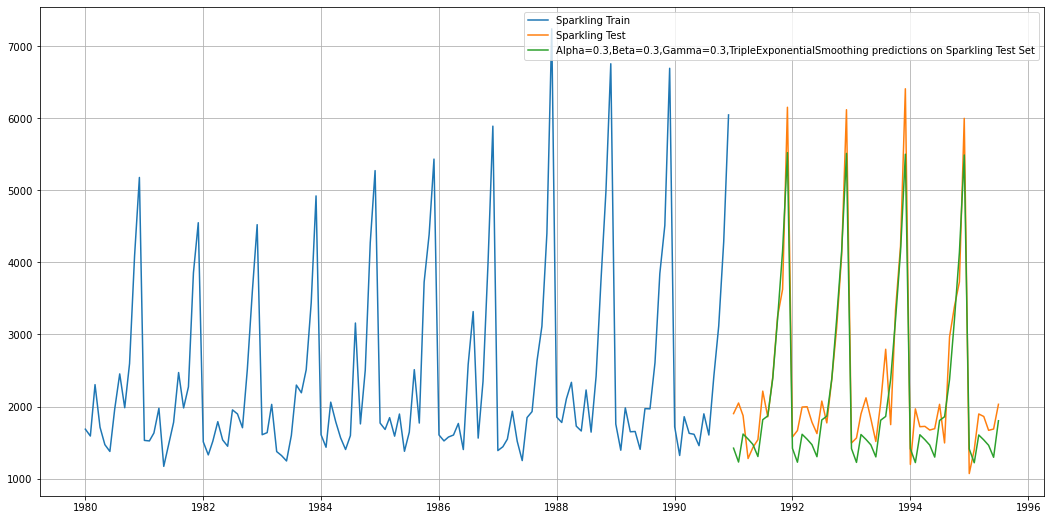

In [265]:
plt.figure(figsize=(18,9))
plt.plot(TES_train1['Sparkling'], label='Sparkling Train')
plt.plot(TES_test1['Sparkling'], label='Sparkling Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test1['predict', 0.3, 0.3, 0.3], label='Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing predictions on Sparkling Test Set')


plt.legend(loc='best')
plt.grid();

In [266]:
resultsDf_9_4 = pd.DataFrame({'Sparkling Test RMSE': [resultsDf_8_2.sort_values(by=['Sparkling Test RMSE']).values[0][3]]}
                           ,index=['Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_9_4])
resultsDf

Sparkling Test RMSE
Alpha=0.049,SimpleExponentialSmoothing                      1316.034674
Alpha=0.3,SimpleExponentialSmoothing                        1935.507132
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing              18259.110704
Alpha=0.11,Beta=0.06,Gamma=0.39,TripleExponenti...           463.501976
Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialS...           392.786198

In [267]:
train_time1 = [i+1 for i in range(len(train1))]
test_time1 = [i+133 for i in range(len(test1))]
print('Sparkling Training Time instance','\n',train_time1)
print('Sparkling Test Time instance','\n',test_time1)

Sparkling Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Sparkling Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [268]:
LinearRegression_train1 = train1.copy()
LinearRegression_test1 = test1.copy()

In [269]:
LinearRegression_train1['time'] = train_time1
LinearRegression_test1['time'] = test_time1

print('First few rows of Sparkling Training Data','\n',LinearRegression_train1.head(),'\n')
print('Last few rows of Sparkling Training Data','\n',LinearRegression_train1.tail(),'\n')
print('First few rows of Sparkling Test Data','\n',LinearRegression_test1.head(),'\n')
print('Last few rows of Sparkling Test Data','\n',LinearRegression_test1.tail(),'\n')

First few rows of Sparkling Training Data 
             Sparkling  time
YearMonth                  
1980-01-01       1686     1
1980-02-01       1591     2
1980-03-01       2304     3
1980-04-01       1712     4
1980-05-01       1471     5 

Last few rows of Sparkling Training Data 
             Sparkling  time
YearMonth                  
1990-08-01       1605   128
1990-09-01       2424   129
1990-10-01       3116   130
1990-11-01       4286   131
1990-12-01       6047   132 

First few rows of Sparkling Test Data 
             Sparkling  time
YearMonth                  
1991-01-01       1902   133
1991-02-01       2049   134
1991-03-01       1874   135
1991-04-01       1279   136
1991-05-01       1432   137 

Last few rows of Sparkling Test Data 
             Sparkling  time
YearMonth                  
1995-03-01       1897   183
1995-04-01       1862   184
1995-05-01       1670   185
1995-06-01       1688   186
1995-07-01       2031   187 



In [270]:
from sklearn.linear_model import LinearRegression

In [271]:
lr = LinearRegression()

In [272]:
lr.fit(LinearRegression_train1[['time']],LinearRegression_train1['Sparkling'].values)

LinearRegression()

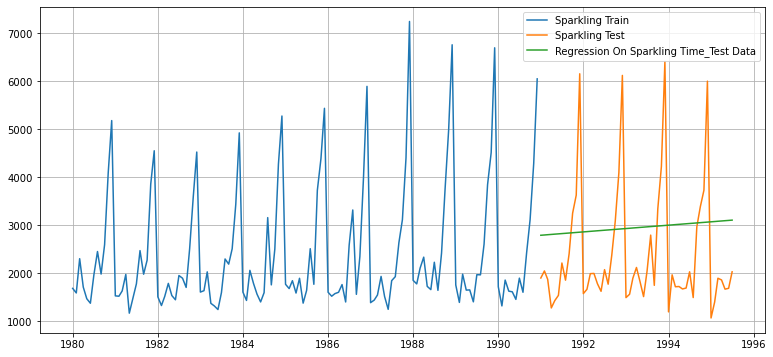

In [273]:
test_predictions_model1         = lr.predict(LinearRegression_test1[['time']])
LinearRegression_test1['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train1['Sparkling'], label='Sparkling Train')
plt.plot(test1['Sparkling'], label='Sparkling Test')
plt.plot(LinearRegression_test1['RegOnTime'], label='Regression On Sparkling Time_Test Data')
plt.legend(loc='best')
plt.grid();

In [274]:
rmse_model_test = metrics.mean_squared_error(test1['Sparkling'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Sparkling Test Data,  RMSE is %3.3f" %(rmse_model_test))

For RegressionOnTime forecast on the Sparkling Test Data,  RMSE is 1389.135


In [275]:
resultsDf = pd.DataFrame({'Sparkling Test RMSE': [rmse_model_test]},index=['RegressionOnTime'])
resultsDf

Sparkling Test RMSE
RegressionOnTime          1389.135175

In [276]:
NaiveModel_train1 = train1.copy()
NaiveModel_test1 = test1.copy()

In [277]:
NaiveModel_test1['naive'] = np.asarray(train1['Sparkling'])[len(np.asarray(train1['Sparkling']))-1]
NaiveModel_test1['naive'].head()

YearMonth
1991-01-01    6047
1991-02-01    6047
1991-03-01    6047
1991-04-01    6047
1991-05-01    6047
Name: naive, dtype: int64

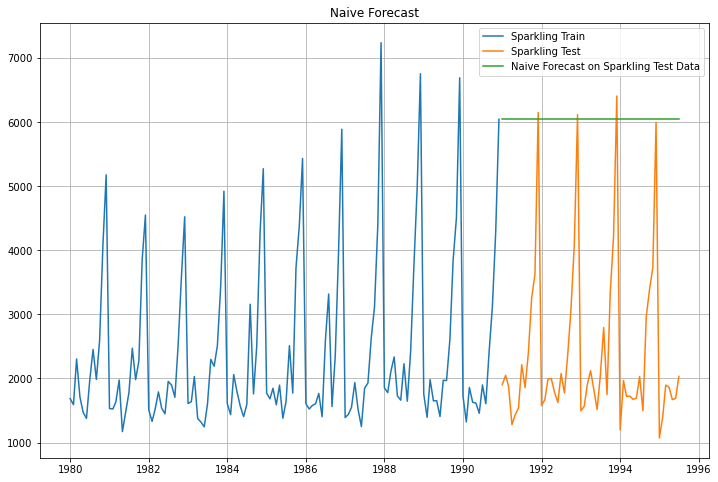

In [278]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train1['Sparkling'], label='Sparkling Train')
plt.plot(test1['Sparkling'], label='Sparkling Test')
plt.plot(NaiveModel_test1['naive'], label='Naive Forecast on Sparkling Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [279]:
rmse_model2_test = metrics.mean_squared_error(test1['Sparkling'],NaiveModel_test1['naive'],squared=False)
print("For RegressionOnTime forecast on the Sparkling Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Sparkling Test Data,  RMSE is 3864.279


In [280]:
resultsDf_9_5 = pd.DataFrame({'Sparkling Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_9_5])
resultsDf

Sparkling Test RMSE
RegressionOnTime          1389.135175
NaiveModel                3864.279352

In [281]:
SimpleAverage_train1 = train1.copy()
SimpleAverage_test1 = test1.copy()

In [282]:
SimpleAverage_test1['mean_forecast'] = train1['Sparkling'].mean()
SimpleAverage_test1.head()

Sparkling  mean_forecast
YearMonth                           
1991-01-01       1902    2403.780303
1991-02-01       2049    2403.780303
1991-03-01       1874    2403.780303
1991-04-01       1279    2403.780303
1991-05-01       1432    2403.780303

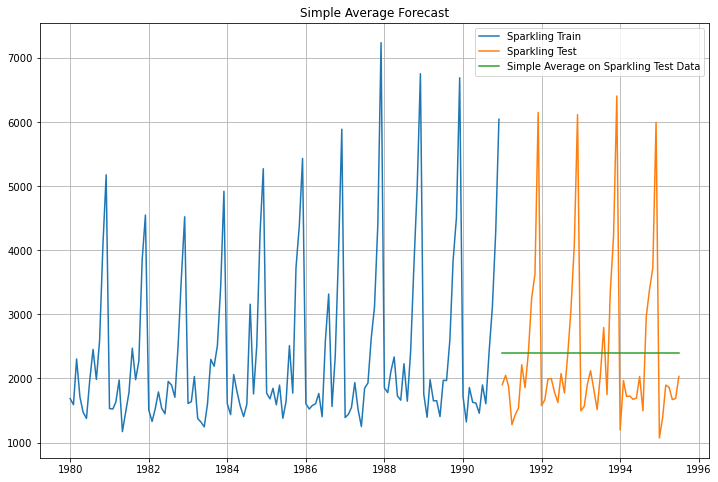

In [283]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train1['Sparkling'], label='Sparkling Train')
plt.plot(SimpleAverage_test1['Sparkling'], label='Sparkling Test')
plt.plot(SimpleAverage_test1['mean_forecast'], label='Simple Average on Sparkling Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [284]:
rmse_model3_test = metrics.mean_squared_error(test1['Sparkling'],SimpleAverage_test1['mean_forecast'],squared=False)
print("For Simple Average forecast on the Sparkling Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Sparkling Test Data,  RMSE is 1275.082


In [285]:
resultsDf_9_6 = pd.DataFrame({'Sparkling Test RMSE': [rmse_model3_test]},index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_9_6])
resultsDf

Sparkling Test RMSE
RegressionOnTime            1389.135175
NaiveModel                  3864.279352
SimpleAverageModel          1275.081804

In [286]:
MovingAverage1 = df1.copy()
MovingAverage1.head()

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

In [287]:
MovingAverage1['Trailing_2'] = MovingAverage1['Sparkling'].rolling(2).mean()
MovingAverage1['Trailing_4'] = MovingAverage1['Sparkling'].rolling(4).mean()
MovingAverage1['Trailing_6'] = MovingAverage1['Sparkling'].rolling(6).mean()
MovingAverage1['Trailing_9'] = MovingAverage1['Sparkling'].rolling(9).mean()

MovingAverage1.head()

Sparkling  Trailing_2  Trailing_4  Trailing_6  Trailing_9
YearMonth                                                            
1980-01-01       1686         NaN         NaN         NaN         NaN
1980-02-01       1591      1638.5         NaN         NaN         NaN
1980-03-01       2304      1947.5         NaN         NaN         NaN
1980-04-01       1712      2008.0     1823.25         NaN         NaN
1980-05-01       1471      1591.5     1769.50         NaN         NaN

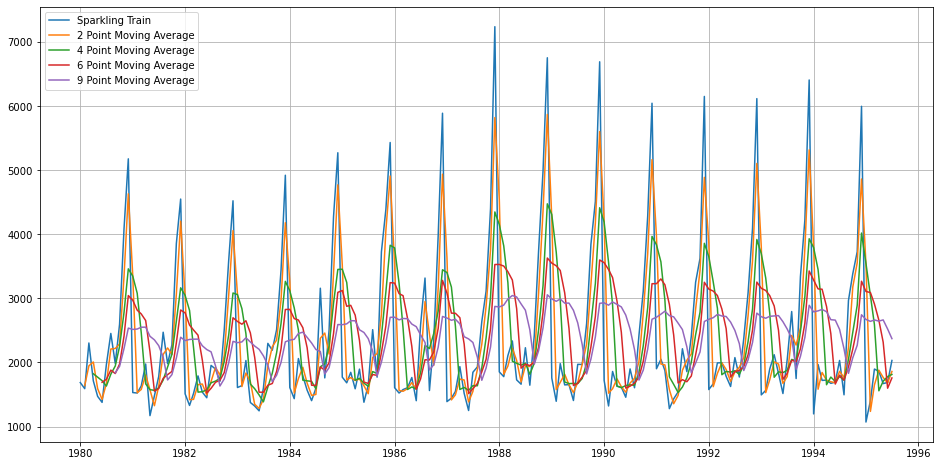

In [288]:
plt.figure(figsize=(16,8))
plt.plot(MovingAverage1['Sparkling'], label='Sparkling Train')
plt.plot(MovingAverage1['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage1['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage1['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage1['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [289]:
trailing_MovingAverage_train1=MovingAverage1[MovingAverage1.index<'1991'] 
trailing_MovingAverage_test1=MovingAverage1[MovingAverage1.index>='1991']

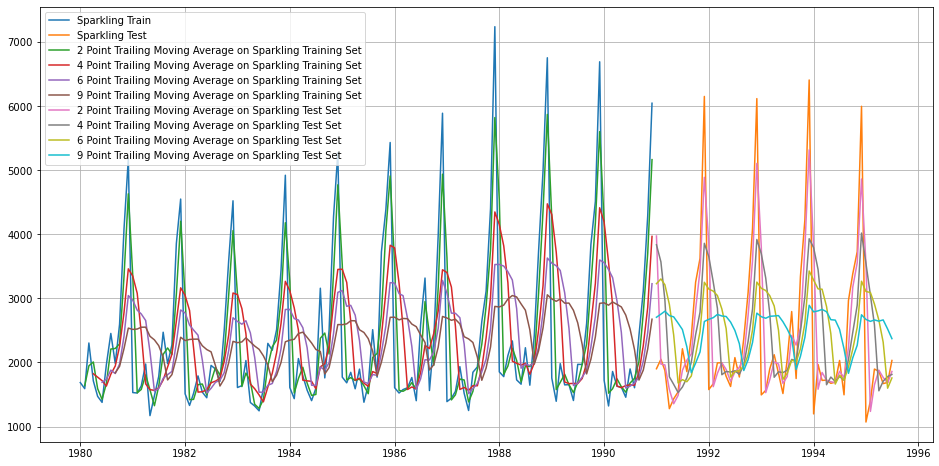

In [290]:
plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train1['Sparkling'], label='Sparkling Train')
plt.plot(trailing_MovingAverage_test1['Sparkling'], label='Sparkling Test')

plt.plot(trailing_MovingAverage_train1['Trailing_2'], label='2 Point Trailing Moving Average on Sparkling Training Set')
plt.plot(trailing_MovingAverage_train1['Trailing_4'], label='4 Point Trailing Moving Average on Sparkling Training Set')
plt.plot(trailing_MovingAverage_train1['Trailing_6'],label = '6 Point Trailing Moving Average on Sparkling Training Set')
plt.plot(trailing_MovingAverage_train1['Trailing_9'],label = '9 Point Trailing Moving Average on Sparkling Training Set')

plt.plot(trailing_MovingAverage_test1['Trailing_2'], label='2 Point Trailing Moving Average on Sparkling Test Set')
plt.plot(trailing_MovingAverage_test1['Trailing_4'], label='4 Point Trailing Moving Average on Sparkling Test Set')
plt.plot(trailing_MovingAverage_test1['Trailing_6'],label = '6 Point Trailing Moving Average on Sparkling Test Set')
plt.plot(trailing_MovingAverage_test1['Trailing_9'],label = '9 Point Trailing Moving Average on Sparkling Test Set')
plt.legend(loc = 'best')
plt.grid();

In [291]:
rmse_model4_test_2 = metrics.mean_squared_error(test1['Sparkling'],trailing_MovingAverage_test1['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Sparkling Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test1['Sparkling'],trailing_MovingAverage_test1['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Sparkling Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test1['Sparkling'],trailing_MovingAverage_test1['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Sparkling Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test1['Sparkling'],trailing_MovingAverage_test1['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Sparkling Training Data,  RMSE is %3.3f " %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Sparkling Training Data,  RMSE is 813.401
For 4 point Moving Average Model forecast on the Sparkling Training Data,  RMSE is 1156.590
For 6 point Moving Average Model forecast on the Sparkling Training Data,  RMSE is 1283.927
For 9 point Moving Average Model forecast on the Sparkling Training Data,  RMSE is 1346.278 


In [292]:
resultsDf_9_7 = pd.DataFrame({'Sparkling Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_9_7])
resultsDf

Sparkling Test RMSE
RegressionOnTime                     1389.135175
NaiveModel                           3864.279352
SimpleAverageModel                   1275.081804
2pointTrailingMovingAverage           813.400684
4pointTrailingMovingAverage          1156.589694
6pointTrailingMovingAverage          1283.927428
9pointTrailingMovingAverage          1346.278315

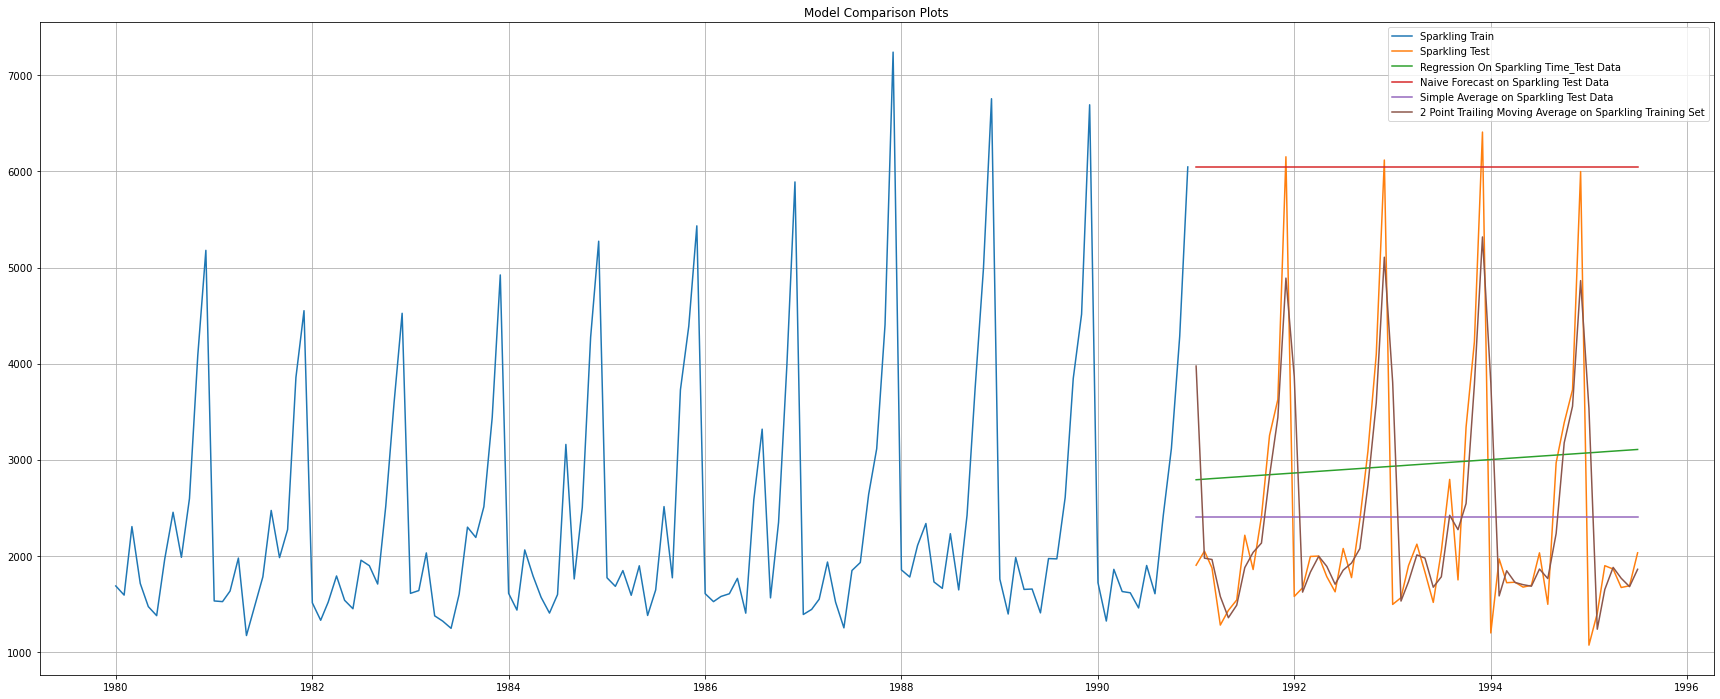

In [293]:
plt.figure(figsize=(30,12))
plt.plot(train1['Sparkling'], label='Sparkling Train')
plt.plot(test1['Sparkling'], label='Sparkling Test')

plt.plot(LinearRegression_test1['RegOnTime'], label='Regression On Sparkling Time_Test Data')

plt.plot(NaiveModel_test1['naive'], label='Naive Forecast on Sparkling Test Data')

plt.plot(SimpleAverage_test1['mean_forecast'], label='Simple Average on Sparkling Test Data')

plt.plot(trailing_MovingAverage_test1['Trailing_2'], label='2 Point Trailing Moving Average on Sparkling Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

In [294]:
SES_train2 = train2.copy()
SES_test2 = test2.copy()

In [295]:
model_SES2 = SimpleExpSmoothing(SES_train2['Rose'])

In [296]:
model_SES2_autofit = model_SES2.fit(optimized=True)

In [297]:
model_SES2_autofit.params

{'smoothing_level': 0.09874995336438987,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.38681121931316,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [298]:
SES_test2['predict'] = model_SES2_autofit.forecast(steps=len(test2))
SES_test2.head()

Rose    predict
YearMonth                  
1991-01-01  54.0  87.105001
1991-02-01  55.0  87.105001
1991-03-01  66.0  87.105001
1991-04-01  65.0  87.105001
1991-05-01  60.0  87.105001

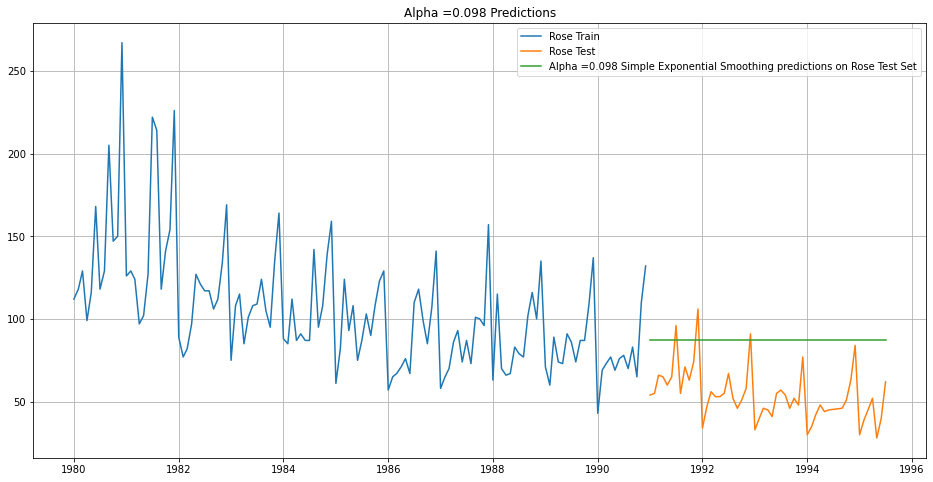

In [299]:
plt.figure(figsize=(16,8))
plt.plot(SES_train2['Rose'], label='Rose Train')
plt.plot(SES_test2['Rose'], label='Rose Test')

plt.plot(SES_test2['predict'], label='Alpha =0.098 Simple Exponential Smoothing predictions on Rose Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.098 Predictions');

In [300]:
rmse_model5_test_1 = metrics.mean_squared_error(SES_test2['Rose'],SES_test2['predict'],squared=False)
print("For Alpha =0.098 Simple Exponential Smoothing Model forecast on the Rose Test Data, RMSE is %3.3f" %(rmse_model5_test_1))

For Alpha =0.098 Simple Exponential Smoothing Model forecast on the Rose Test Data, RMSE is 36.796


In [301]:
resultsDf_5 = pd.DataFrame({'Rose Test RMSE': [rmse_model5_test_1]},index=['Alpha=0.098,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf_5])
resultsDf

Rose Test RMSE
Alpha=0.098,SimpleExponentialSmoothing       36.796243

In [302]:
resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Rose Test RMSE': []})
resultsDf_6

Empty DataFrame
Columns: [Alpha Values, Rose Test RMSE]
Index: []

In [303]:
for i in np.arange(0.3,1,0.1):
    model_SES_alpha_i = model_SES2.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_test2['predict',i] = model_SES_alpha_i.forecast(steps=len(test2))
    
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test2['Rose'],SES_test2['predict',i],squared=False)
    
    resultsDf_6 = resultsDf_6.append({'Alpha Values':i
                                      ,'Rose Test RMSE':rmse_model5_test_i}, ignore_index=True)

In [304]:
resultsDf_6.sort_values(by=['Rose Test RMSE'],ascending=True)

Alpha Values  Rose Test RMSE
0           0.3       47.504821
1           0.4       53.767406
2           0.5       59.641786
3           0.6       64.971288
4           0.7       69.698162
5           0.8       73.773992
6           0.9       77.139276

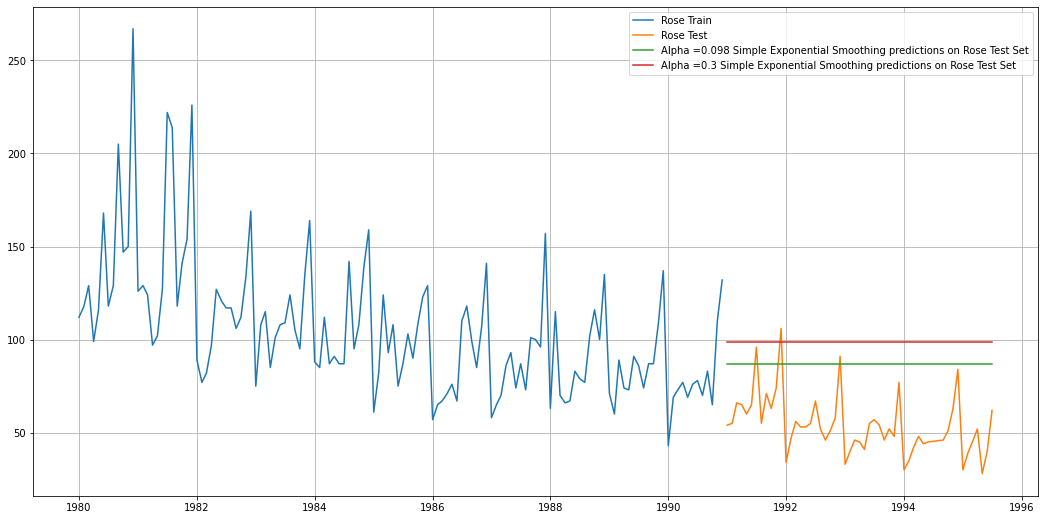

In [305]:
plt.figure(figsize=(18,9))
plt.plot(SES_train2['Rose'], label='Rose Train')
plt.plot(SES_test2['Rose'], label='Rose Test')

plt.plot(SES_test2['predict'], label='Alpha =0.098 Simple Exponential Smoothing predictions on Rose Test Set')

plt.plot(SES_test2['predict', 0.3], label='Alpha =0.3 Simple Exponential Smoothing predictions on Rose Test Set')



plt.legend(loc='best')
plt.grid();

In [306]:
resultsDf_6_1 = pd.DataFrame({'Rose Test RMSE': [resultsDf_6.sort_values(by=['Rose Test RMSE'],ascending=True).values[0][1]]}
                           ,index=['Alpha=0.3,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

Rose Test RMSE
Alpha=0.098,SimpleExponentialSmoothing       36.796243
Alpha=0.3,SimpleExponentialSmoothing         47.504821

In [307]:
DES_train2 = train2.copy()
DES_test2 = test2.copy()

In [308]:
model_DES2 = Holt(DES_train2['Rose'])

In [309]:
resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Rose Test RMSE': []})
resultsDf_7

Empty DataFrame
Columns: [Alpha Values, Beta Values, Rose Test RMSE]
Index: []

In [310]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        model_DES_alpha_i_j = model_DES2.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_test2['predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(test2))
        
        
        rmse_model6_test = metrics.mean_squared_error(DES_test2['Rose'],DES_test2['predict',i,j],squared=False)
        
        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j
                                          ,'Rose Test RMSE':rmse_model6_test}, ignore_index=True)

In [311]:
resultsDf_7

Alpha Values  Beta Values  Rose Test RMSE
0            0.3          0.3      265.567594
1            0.3          0.4      358.750942
2            0.3          0.5      451.810230
3            0.3          0.6      536.954148
4            0.3          0.7      601.616351
..           ...          ...             ...
59           1.0          0.6      801.680218
60           1.0          0.7      841.892573
61           1.0          0.8      853.965537
62           1.0          0.9      834.710935
63           1.0          1.0      780.079579

[64 rows x 3 columns]

In [312]:
resultsDf_7.sort_values(by=['Rose Test RMSE']).head()

Alpha Values  Beta Values  Rose Test RMSE
0            0.3          0.3      265.567594
8            0.4          0.3      339.306534
1            0.3          0.4      358.750942
16           0.5          0.3      394.272629
24           0.6          0.3      439.296033

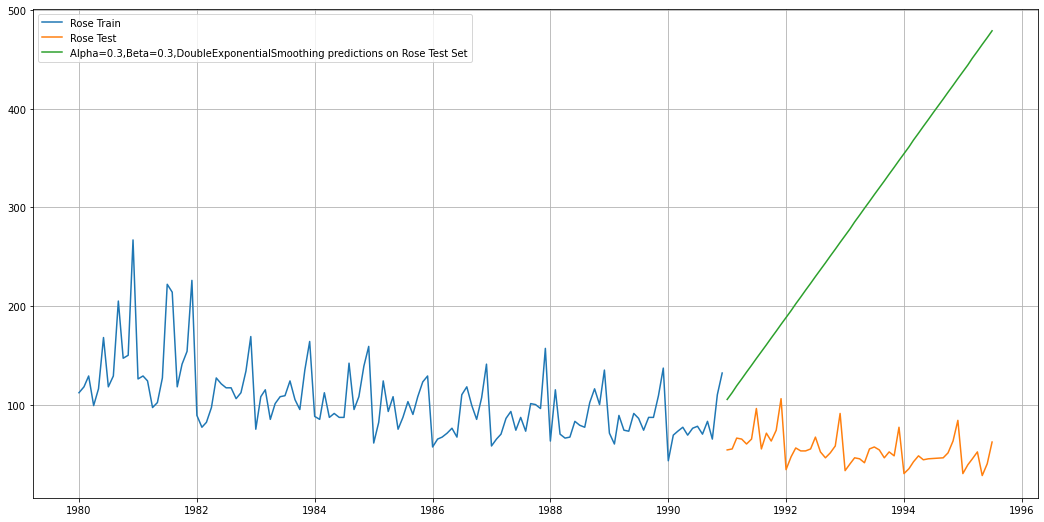

In [313]:
plt.figure(figsize=(18,9))
plt.plot(DES_train2['Rose'], label='Rose Train')
plt.plot(DES_test2['Rose'], label='Rose Test')

plt.plot(DES_test2['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Rose Test Set')


plt.legend(loc='best')
plt.grid();

In [314]:
resultsDf_7_1 = pd.DataFrame({'Rose Test RMSE': [resultsDf_7.sort_values(by=['Rose Test RMSE']).values[0][2]]}
                           ,index=['Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

Rose Test RMSE
Alpha=0.098,SimpleExponentialSmoothing              36.796243
Alpha=0.3,SimpleExponentialSmoothing                47.504821
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing      265.567594

In [315]:
TES_train2 = train2.copy()
TES_test2 = test2.copy()

In [316]:
model_TES2 = ExponentialSmoothing(TES_train2['Rose'],trend='additive',seasonal='multiplicative')

In [317]:
model_TES2_autofit = model_TES2.fit()

In [318]:
model_TES2_autofit.params

{'smoothing_level': 0.06571007449183297,
 'smoothing_trend': 0.051867105713176015,
 'smoothing_seasonal': 0.0015637515713898,
 'damping_trend': nan,
 'initial_level': 47.81887301367471,
 'initial_trend': -0.2961562797665537,
 'initial_seasons': array([2.35763018, 2.67367218, 2.92146068, 2.55308191, 2.87099548,
        3.13124987, 3.44178442, 3.66118656, 3.47154364, 3.39670325,
        3.95879831, 5.46173463]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [319]:
TES_test2['auto_predict'] = model_TES2_autofit.forecast(steps=len(test2))
TES_test2.head()

Rose  auto_predict
YearMonth                     
1991-01-01  54.0     56.677627
1991-02-01  55.0     64.136371
1991-03-01  66.0     69.860745
1991-04-01  65.0     60.897998
1991-05-01  60.0     68.228324

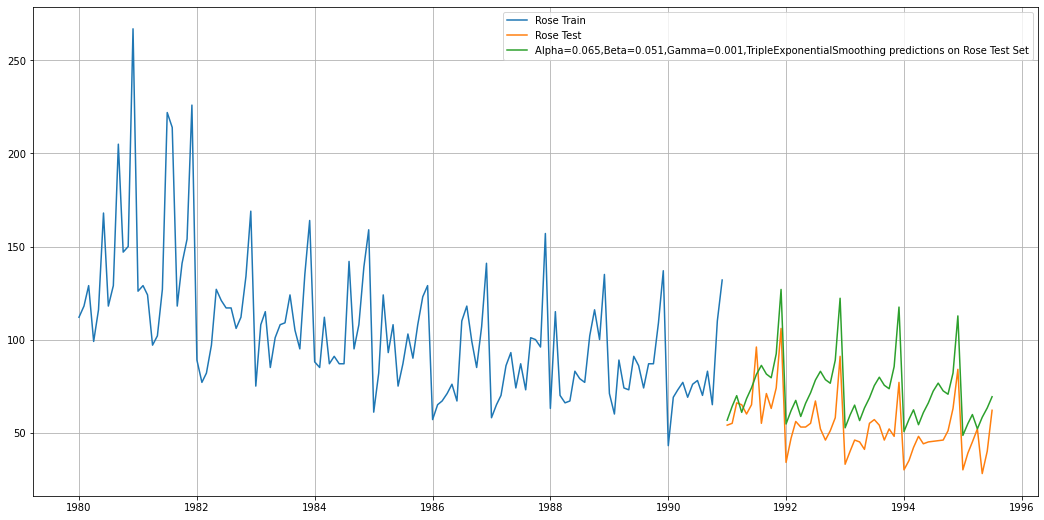

In [320]:
plt.figure(figsize=(18,9))
plt.plot(TES_train2['Rose'], label='Rose Train')
plt.plot(TES_test2['Rose'], label='Rose Test')

plt.plot(TES_test2['auto_predict'], label='Alpha=0.065,Beta=0.051,Gamma=0.001,TripleExponentialSmoothing predictions on Rose Test Set')


plt.legend(loc='best')
plt.grid();

In [321]:
rmse_model6_test_1 = metrics.mean_squared_error(TES_test2['Rose'],TES_test2['auto_predict'],squared=False)
print("For Alpha=0.065,Beta=0.051,Gamma=0.001, Triple Exponential Smoothing Model forecast on the Rose Test Data,  RMSE is %3.3f" %(rmse_model6_test_1))

For Alpha=0.065,Beta=0.051,Gamma=0.001, Triple Exponential Smoothing Model forecast on the Rose Test Data,  RMSE is 20.990


In [322]:
resultsDf_8_1 = pd.DataFrame({'Rose Test RMSE': [rmse_model6_test_1]}
                           ,index=['Alpha=0.065,Beta=0.051,Gamma=0.001,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

Rose Test RMSE
Alpha=0.098,SimpleExponentialSmoothing                   36.796243
Alpha=0.3,SimpleExponentialSmoothing                     47.504821
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing           265.567594
Alpha=0.065,Beta=0.051,Gamma=0.001,TripleExpone...       20.990268

In [323]:
resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Rose Test RMSE': []})
resultsDf_8_2

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Rose Test RMSE]
Index: []

In [324]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        for k in np.arange(0.3,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES2.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_test2['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test2))
        
            rmse_model8_test = metrics.mean_squared_error(TES_test2['Rose'],TES_test2['predict',i,j,k],squared=False)
            
            resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Rose Test RMSE':rmse_model8_test}
                                                 , ignore_index=True)

In [325]:
resultsDf_8_2

Alpha Values  Beta Values  Gamma Values  Rose Test RMSE
0             0.3          0.3           0.3       19.057218
1             0.3          0.3           0.4       11.201633
2             0.3          0.3           0.5       30.565763
3             0.3          0.3           0.6       63.623019
4             0.3          0.3           0.7      122.472557
..            ...          ...           ...             ...
507           1.0          1.0           0.6     9603.635095
508           1.0          1.0           0.7    23029.955361
509           1.0          1.0           0.8     9626.710854
510           1.0          1.0           0.9     9691.905402
511           1.0          1.0           1.0     8138.618579

[512 rows x 4 columns]

In [326]:
resultsDf_8_2.sort_values(by=['Rose Test RMSE']).head()

Alpha Values  Beta Values  Gamma Values  Rose Test RMSE
8             0.3          0.4           0.3       10.945435
1             0.3          0.3           0.4       11.201633
69            0.4          0.3           0.8       12.615607
16            0.3          0.5           0.3       14.414604
131           0.5          0.3           0.6       16.720720

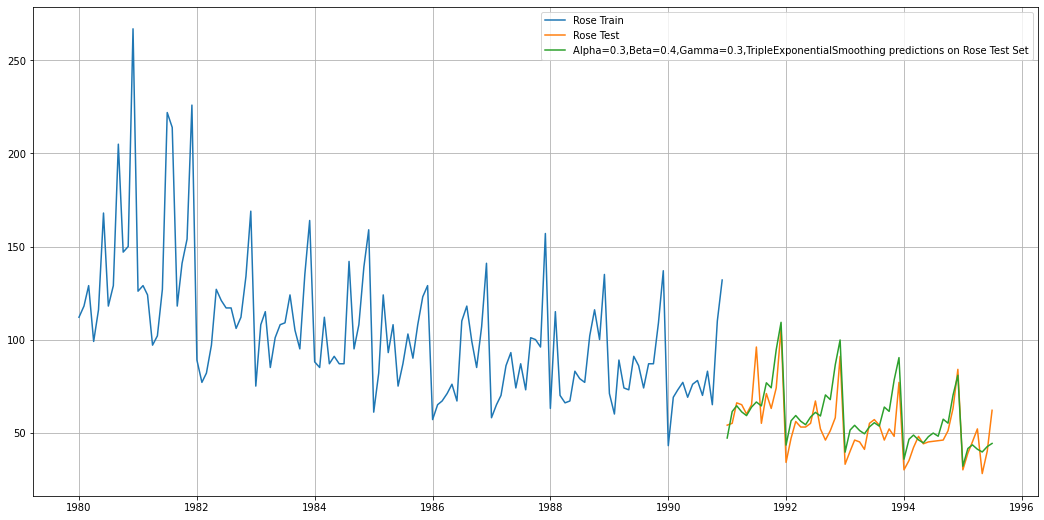

In [327]:
plt.figure(figsize=(18,9))
plt.plot(TES_train2['Rose'], label='Rose Train')
plt.plot(TES_test2['Rose'], label='Rose Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test2['predict', 0.3, 0.4, 0.3], label='Alpha=0.3,Beta=0.4,Gamma=0.3,TripleExponentialSmoothing predictions on Rose Test Set')


plt.legend(loc='best')
plt.grid();

In [328]:
resultsDf_8_3 = pd.DataFrame({'Rose Test RMSE': [resultsDf_8_2.sort_values(by=['Rose Test RMSE']).values[0][3]]}
                           ,index=['Alpha=0.3,Beta=0.4,Gamma=0.3,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf

Rose Test RMSE
Alpha=0.098,SimpleExponentialSmoothing                   36.796243
Alpha=0.3,SimpleExponentialSmoothing                     47.504821
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing           265.567594
Alpha=0.065,Beta=0.051,Gamma=0.001,TripleExpone...       20.990268
Alpha=0.3,Beta=0.4,Gamma=0.3,TripleExponentialS...       10.945435

In [329]:
train_time2 = [i+1 for i in range(len(train2))]
test_time2 = [i+133 for i in range(len(test2))]
print('Rose Training Time instance','\n',train_time2)
print('Rose Test Time instance','\n',test_time2)

Rose Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Rose Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [330]:
LinearRegression_train2 = train2.copy()
LinearRegression_test2 = test2.copy()

In [331]:
LinearRegression_train2['time'] = train_time2
LinearRegression_test2['time'] = test_time2

print('First few rows of Rose Training Data','\n',LinearRegression_train2.head(),'\n')
print('Last few rows of Rose Training Data','\n',LinearRegression_train2.tail(),'\n')
print('First few rows of Rose Test Data','\n',LinearRegression_test2.head(),'\n')
print('Last few rows of Rose Test Data','\n',LinearRegression_test2.tail(),'\n')

First few rows of Rose Training Data 
              Rose  time
YearMonth              
1980-01-01  112.0     1
1980-02-01  118.0     2
1980-03-01  129.0     3
1980-04-01   99.0     4
1980-05-01  116.0     5 

Last few rows of Rose Training Data 
              Rose  time
YearMonth              
1990-08-01   70.0   128
1990-09-01   83.0   129
1990-10-01   65.0   130
1990-11-01  110.0   131
1990-12-01  132.0   132 

First few rows of Rose Test Data 
             Rose  time
YearMonth             
1991-01-01  54.0   133
1991-02-01  55.0   134
1991-03-01  66.0   135
1991-04-01  65.0   136
1991-05-01  60.0   137 

Last few rows of Rose Test Data 
             Rose  time
YearMonth             
1995-03-01  45.0   183
1995-04-01  52.0   184
1995-05-01  28.0   185
1995-06-01  40.0   186
1995-07-01  62.0   187 



In [332]:
lr = LinearRegression()

In [333]:
lr.fit(LinearRegression_train2[['time']],LinearRegression_train2['Rose'].values)

LinearRegression()

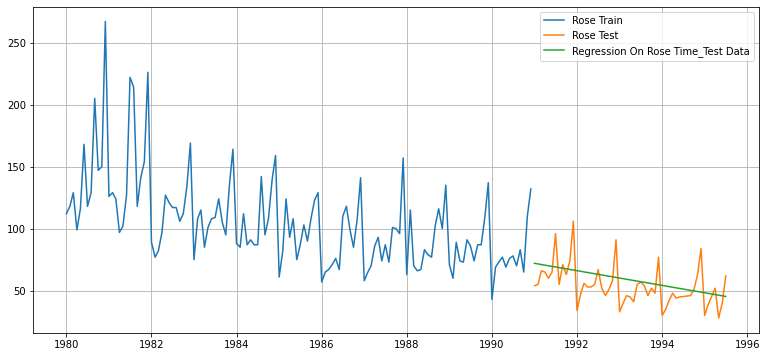

In [334]:
test_predictions_model2         = lr.predict(LinearRegression_test2[['time']])
LinearRegression_test2['RegOnTime'] = test_predictions_model2

plt.figure(figsize=(13,6))
plt.plot( train2['Rose'], label='Rose Train')
plt.plot(test2['Rose'], label='Rose Test')
plt.plot(LinearRegression_test2['RegOnTime'], label='Regression On Rose Time_Test Data')
plt.legend(loc='best')
plt.grid();

In [335]:
rmse_model1_test = metrics.mean_squared_error(test2['Rose'],test_predictions_model2,squared=False)
print("For RegressionOnTime forecast on the Rose Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Rose Test Data,  RMSE is 15.269


In [336]:
resultsDf = pd.DataFrame({'Rose Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

Rose Test RMSE
RegressionOnTime       15.268955

In [337]:
NaiveModel_train2 = train2.copy()
NaiveModel_test2 = test2.copy()

In [338]:
NaiveModel_test2['naive'] = np.asarray(train2['Rose'])[len(np.asarray(train2['Rose']))-1]
NaiveModel_test2['naive'].head()

YearMonth
1991-01-01    132.0
1991-02-01    132.0
1991-03-01    132.0
1991-04-01    132.0
1991-05-01    132.0
Name: naive, dtype: float64

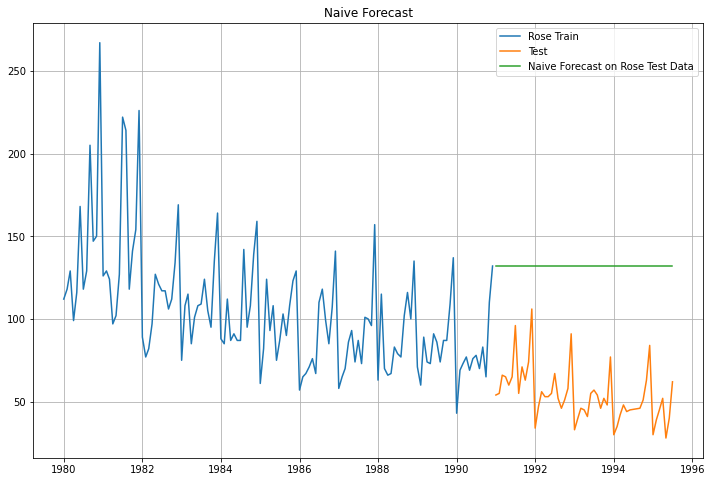

In [339]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train2['Rose'], label='Rose Train')
plt.plot(test2['Rose'], label='Test')
plt.plot(NaiveModel_test2['naive'], label='Naive Forecast on Rose Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [340]:
rmse_model2_test = metrics.mean_squared_error(test2['Rose'],NaiveModel_test2['naive'],squared=False)
print("For RegressionOnTime forecast on the Rose Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Rose Test Data,  RMSE is 79.719


In [341]:
resultsDf_2 = pd.DataFrame({'Rose Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

Rose Test RMSE
RegressionOnTime       15.268955
NaiveModel             79.718773

In [342]:
SimpleAverage_train2 = train2.copy()
SimpleAverage_test2 = test2.copy()

In [343]:
SimpleAverage_test2['mean_forecast'] = train2['Rose'].mean()
SimpleAverage_test2.head()

Rose  mean_forecast
YearMonth                      
1991-01-01  54.0     104.939394
1991-02-01  55.0     104.939394
1991-03-01  66.0     104.939394
1991-04-01  65.0     104.939394
1991-05-01  60.0     104.939394

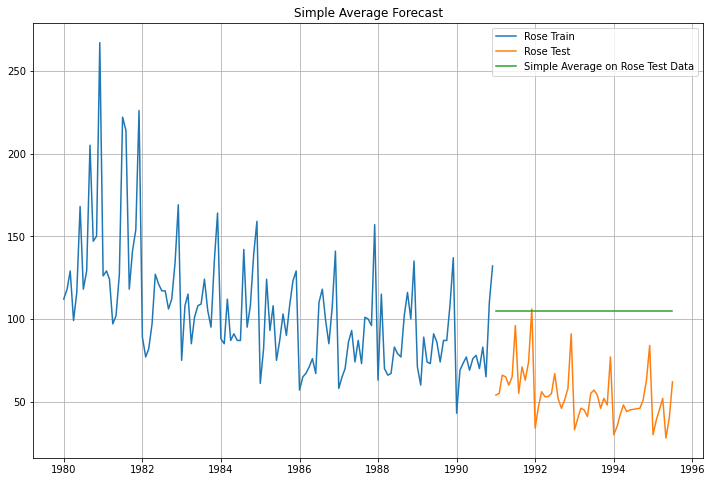

In [344]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train2['Rose'], label='Rose Train')
plt.plot(SimpleAverage_test2['Rose'], label='Rose Test')
plt.plot(SimpleAverage_test2['mean_forecast'], label='Simple Average on Rose Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [345]:
rmse_model3_test = metrics.mean_squared_error(test2['Rose'],SimpleAverage_test2['mean_forecast'],squared=False)
print("For Simple Average forecast on the Rose Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Rose Test Data,  RMSE is 53.461


In [346]:
resultsDf_3 = pd.DataFrame({'Rose Test RMSE': [rmse_model3_test]},index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

Rose Test RMSE
RegressionOnTime         15.268955
NaiveModel               79.718773
SimpleAverageModel       53.460570

In [347]:
MovingAverage2 = df2.copy()
MovingAverage2.head()

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

In [348]:
MovingAverage2['Trailing_2'] = MovingAverage2['Rose'].rolling(2).mean()
MovingAverage2['Trailing_4'] = MovingAverage2['Rose'].rolling(4).mean()
MovingAverage2['Trailing_6'] = MovingAverage2['Rose'].rolling(6).mean()
MovingAverage2['Trailing_9'] = MovingAverage2['Rose'].rolling(9).mean()

MovingAverage2.head()

Rose  Trailing_2  Trailing_4  Trailing_6  Trailing_9
YearMonth                                                        
1980-01-01  112.0         NaN         NaN         NaN         NaN
1980-02-01  118.0       115.0         NaN         NaN         NaN
1980-03-01  129.0       123.5         NaN         NaN         NaN
1980-04-01   99.0       114.0       114.5         NaN         NaN
1980-05-01  116.0       107.5       115.5         NaN         NaN

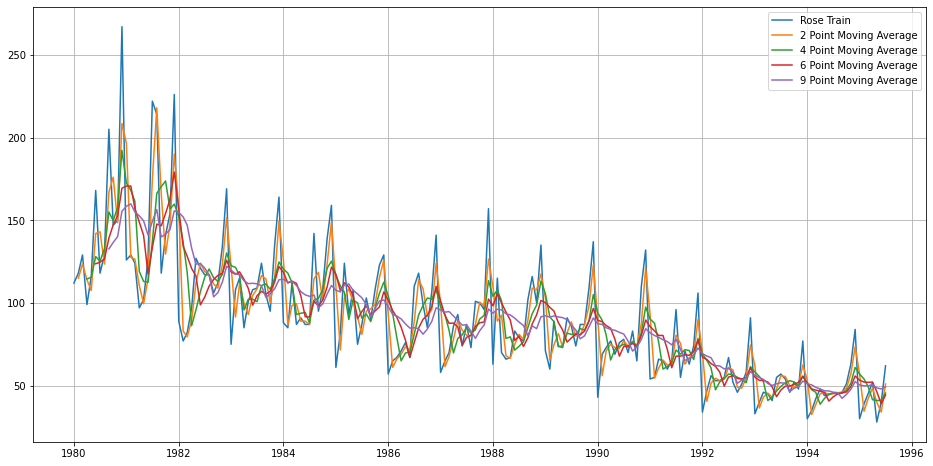

In [349]:
plt.figure(figsize=(16,8))
plt.plot(MovingAverage2['Rose'], label='Rose Train')
plt.plot(MovingAverage2['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage2['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage2['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage2['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [350]:
trailing_MovingAverage_train2=MovingAverage2[MovingAverage2.index<'1991'] 
trailing_MovingAverage_test2=MovingAverage2[MovingAverage2.index>='1991']

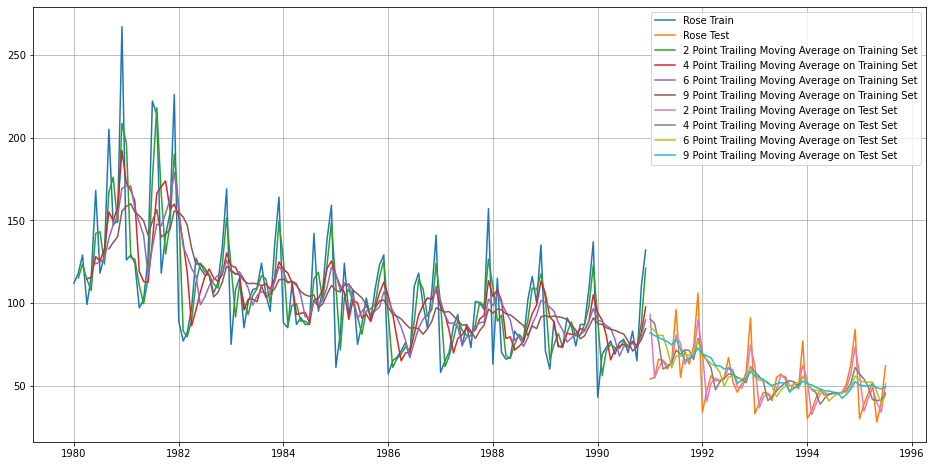

In [351]:
plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train2['Rose'], label='Rose Train')
plt.plot(trailing_MovingAverage_test2['Rose'], label='Rose Test')

plt.plot(trailing_MovingAverage_train2['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train2['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train2['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train2['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test2['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test2['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test2['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test2['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

In [352]:
rmse_model4_test_2 = metrics.mean_squared_error(test2['Rose'],trailing_MovingAverage_test2['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Rose Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test2['Rose'],trailing_MovingAverage_test2['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Rose Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test2['Rose'],trailing_MovingAverage_test2['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Rose Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test2['Rose'],trailing_MovingAverage_test2['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Rose Training Data,  RMSE is %3.3f " %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Rose Training Data,  RMSE is 11.529
For 4 point Moving Average Model forecast on the Rose Training Data,  RMSE is 14.451
For 6 point Moving Average Model forecast on the Rose Training Data,  RMSE is 14.566
For 9 point Moving Average Model forecast on the Rose Training Data,  RMSE is 14.728 


In [353]:
resultsDf_4 = pd.DataFrame({'Rose Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

Rose Test RMSE
RegressionOnTime                  15.268955
NaiveModel                        79.718773
SimpleAverageModel                53.460570
2pointTrailingMovingAverage       11.529278
4pointTrailingMovingAverage       14.451403
6pointTrailingMovingAverage       14.566327
9pointTrailingMovingAverage       14.727630

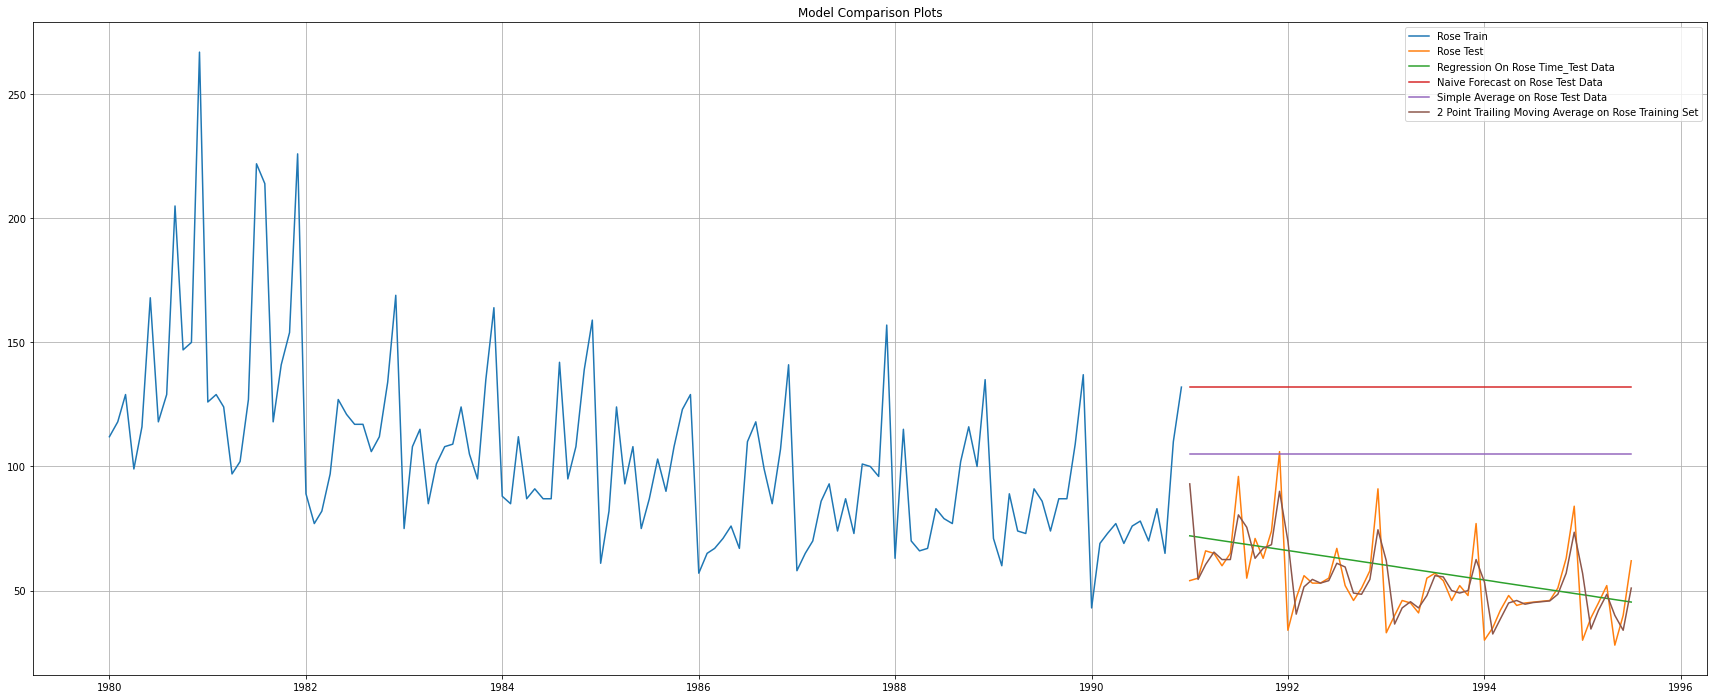

In [354]:
plt.figure(figsize=(30,12))
plt.plot(train2['Rose'], label='Rose Train')
plt.plot(test2['Rose'], label='Rose Test')

plt.plot(LinearRegression_test2['RegOnTime'], label='Regression On Rose Time_Test Data')

plt.plot(NaiveModel_test2['naive'], label='Naive Forecast on Rose Test Data')

plt.plot(SimpleAverage_test2['mean_forecast'], label='Simple Average on Rose Test Data')

plt.plot(trailing_MovingAverage_test2['Trailing_2'], label='2 Point Trailing Moving Average on Rose Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

In [355]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

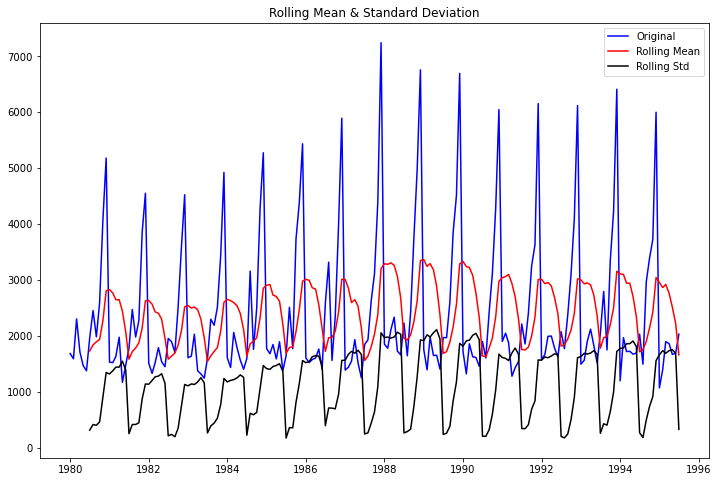

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [356]:
test_stationarity(df1['Sparkling'])

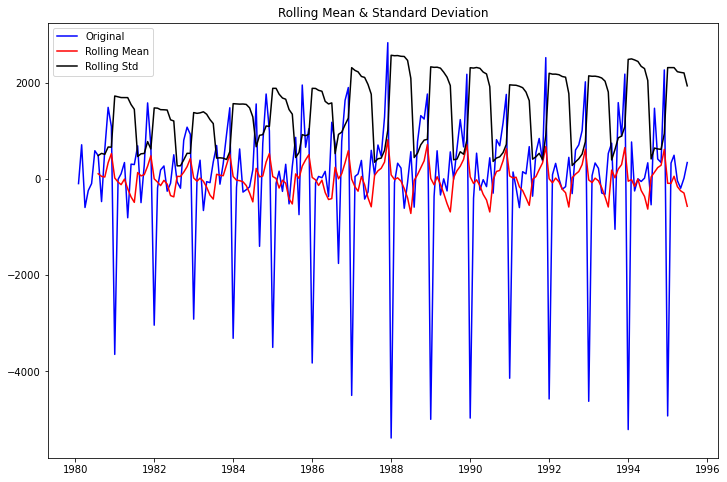

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [357]:
test_stationarity(df1['Sparkling'].diff().dropna())

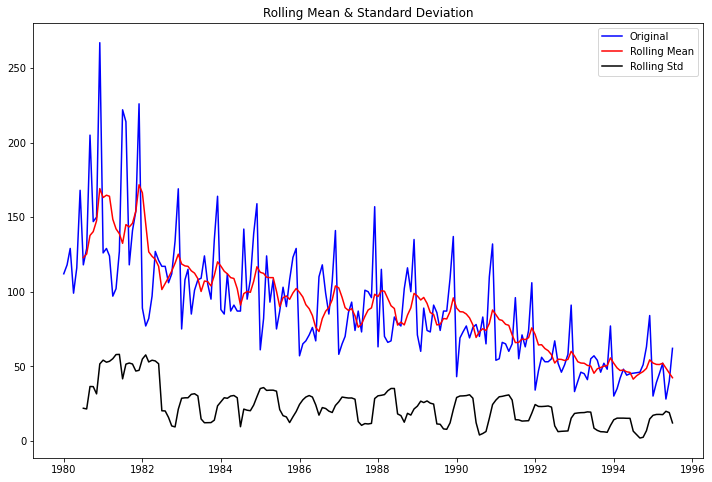

Results of Dickey-Fuller Test:
Test Statistic                  -1.876699
p-value                          0.343101
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [358]:
test_stationarity(df2['Rose'])

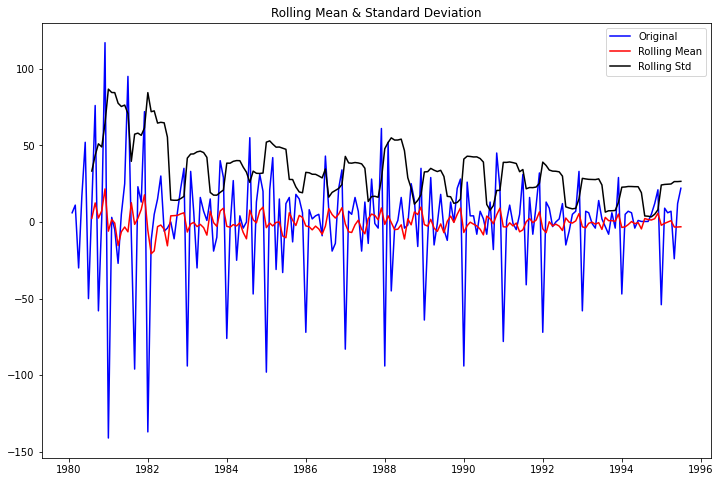

Results of Dickey-Fuller Test:
Test Statistic                -8.044392e+00
p-value                        1.810895e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [359]:
test_stationarity(df2['Rose'].diff().dropna())

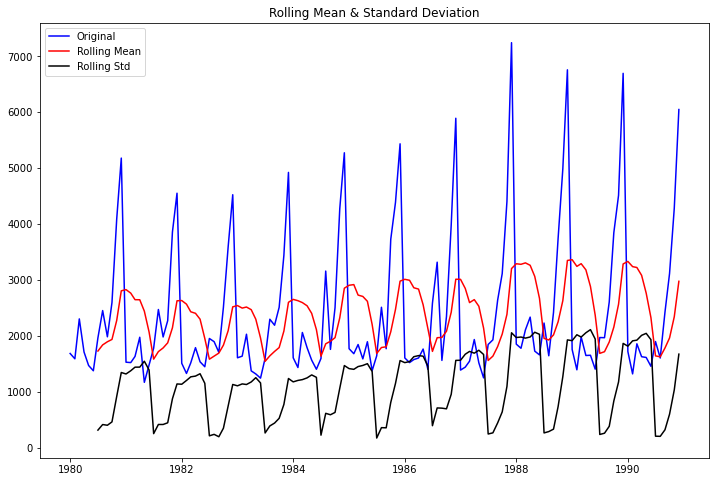

Results of Dickey-Fuller Test:
Test Statistic                  -1.208926
p-value                          0.669744
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64 



In [360]:
test_stationarity(train1['Sparkling'])

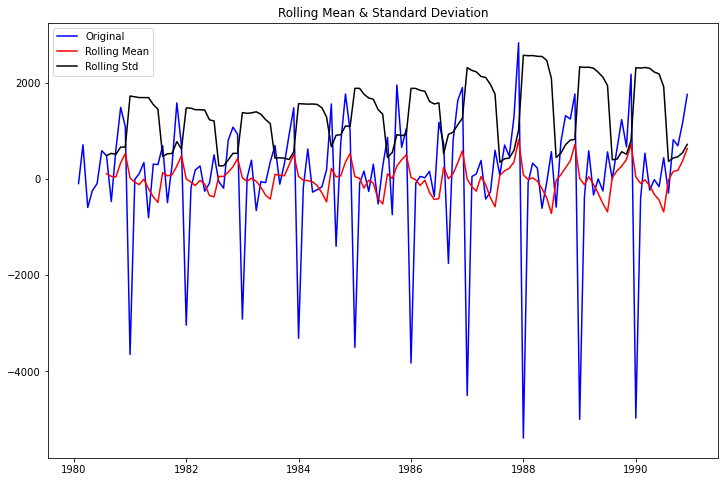

Results of Dickey-Fuller Test:
Test Statistic                -8.005007e+00
p-value                        2.280104e-12
#Lags Used                     1.100000e+01
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
Critical Value (5%)           -2.886151e+00
Critical Value (10%)          -2.579896e+00
dtype: float64 



In [361]:
test_stationarity(train1['Sparkling'].diff().dropna())

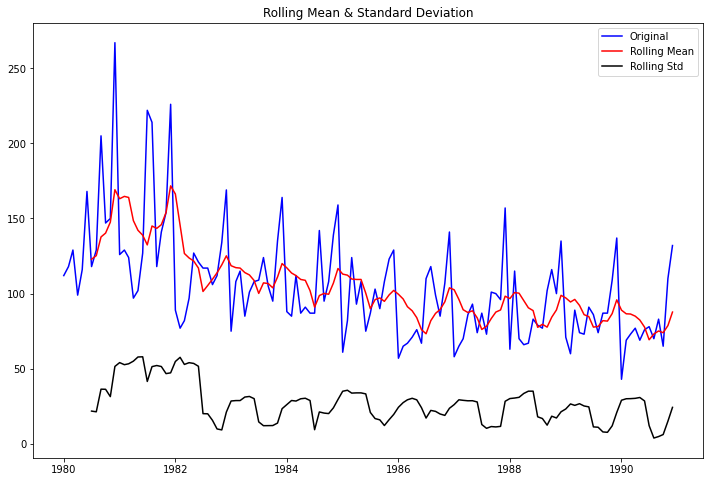

Results of Dickey-Fuller Test:
Test Statistic                  -2.164250
p-value                          0.219476
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64 



In [362]:
test_stationarity(train2['Rose'])

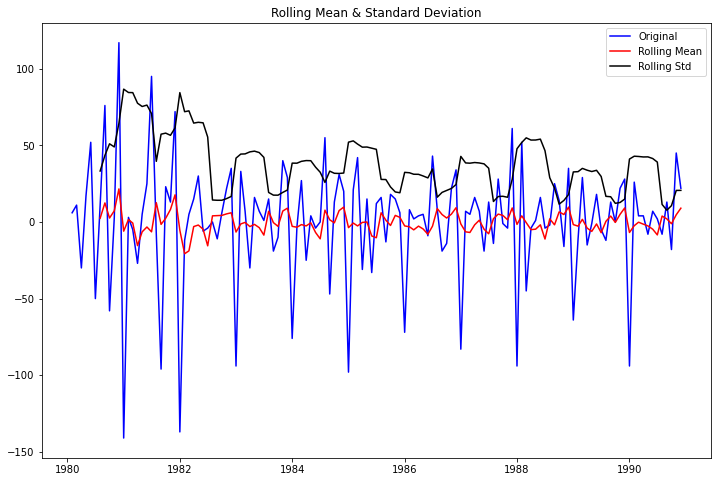

Results of Dickey-Fuller Test:
Test Statistic                -6.592372e+00
p-value                        7.061944e-09
#Lags Used                     1.200000e+01
Number of Observations Used    1.180000e+02
Critical Value (1%)           -3.487022e+00
Critical Value (5%)           -2.886363e+00
Critical Value (10%)          -2.580009e+00
dtype: float64 



In [363]:
test_stationarity(train2['Rose'].diff().dropna())

In [364]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

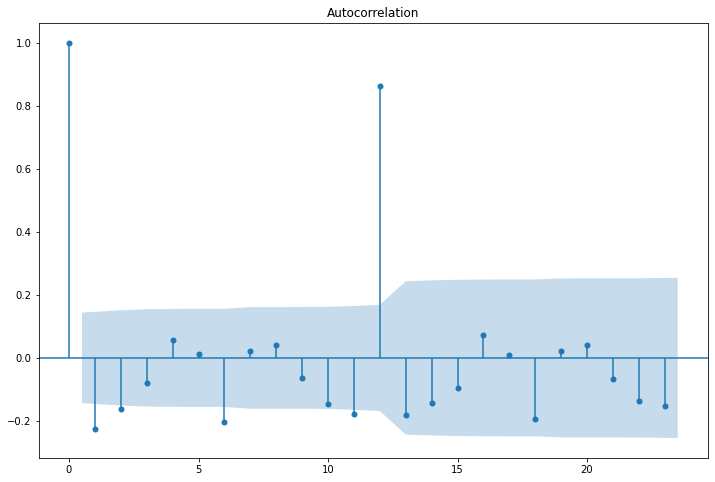

In [365]:
plot_acf(df1.diff().dropna(),alpha=0.05);

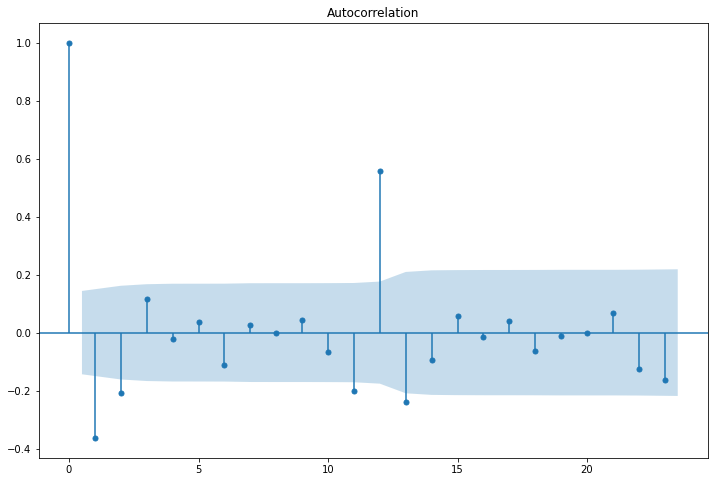

In [366]:
plot_acf(df2.diff().dropna(),alpha=0.05);

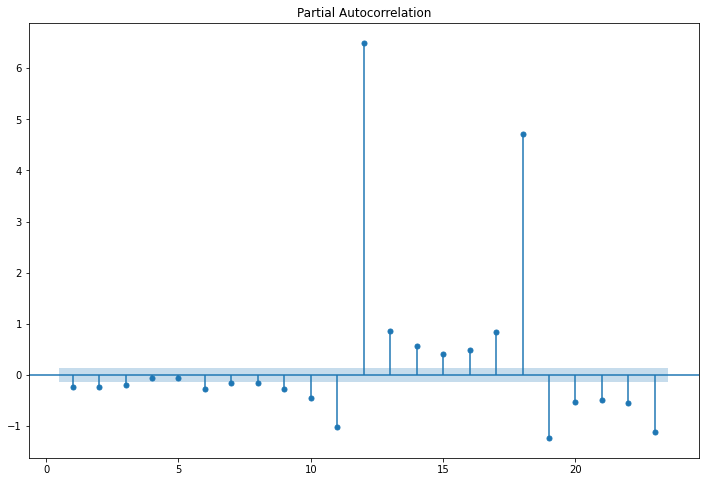

In [367]:
plot_pacf(df1.diff().dropna(),zero=False,alpha=0.05);

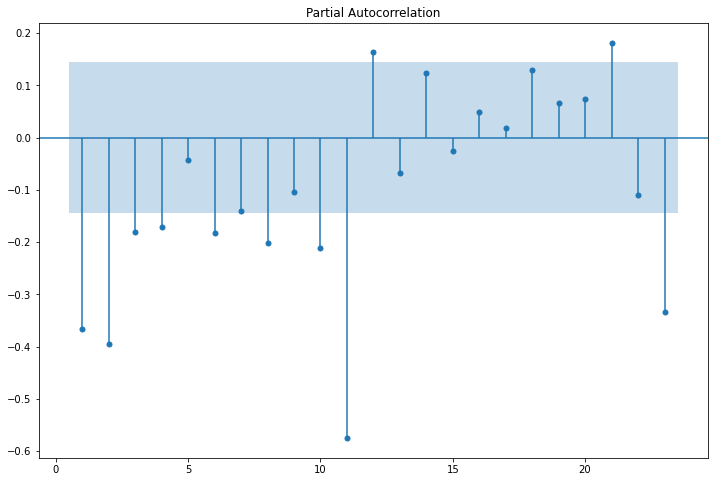

In [368]:
plot_pacf(df2.diff().dropna(),zero=False,alpha=0.05);

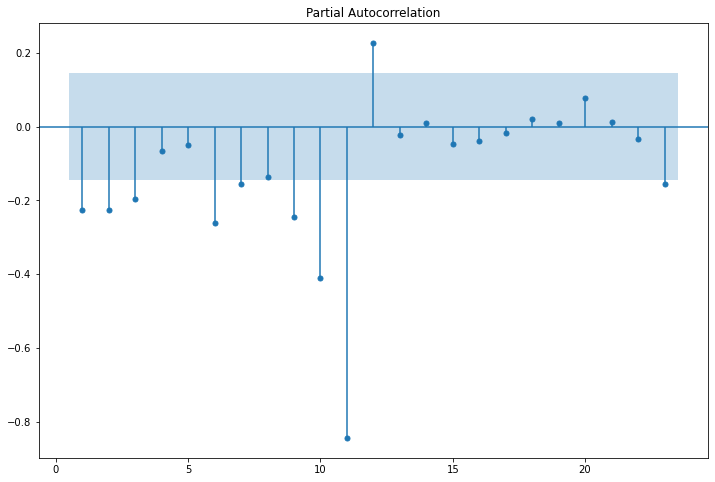

In [369]:
plot_pacf(df1.diff().dropna(),zero=False,alpha=0.05,method='ywmle');

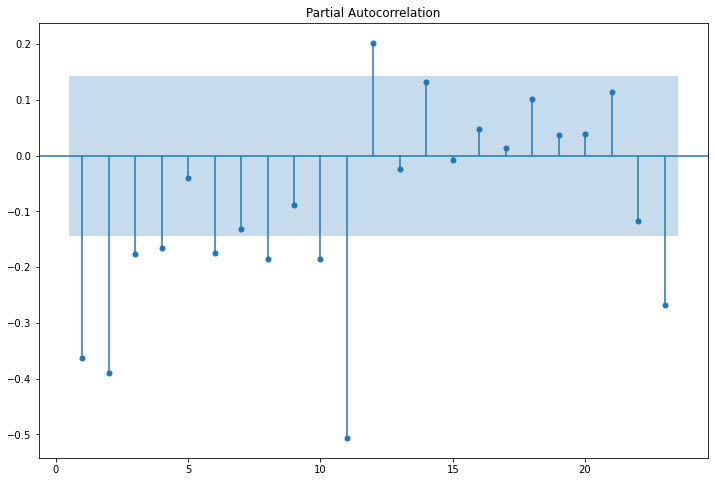

In [370]:
plot_pacf(df2.diff().dropna(),zero=False,alpha=0.05,method='ywmle');

In [371]:
import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [372]:
ARIMA_AIC_Sparkling = pd.DataFrame(columns=['param_Sparkling', 'AIC_Sparkling'])
ARIMA_AIC_Sparkling

Empty DataFrame
Columns: [param_Sparkling, AIC_Sparkling]
Index: []

In [373]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train1['Sparkling'].values,order=param).fit()
    print('ARIMA_Sparkling{} - AIC_Sparkling:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC_Sparkling = ARIMA_AIC_Sparkling.append({'param_Sparkling':param, 'AIC_Sparkling': ARIMA_model.aic}, ignore_index=True)

ARIMA_Sparkling(0, 1, 0) - AIC_Sparkling:2269.582796371201
ARIMA_Sparkling(0, 1, 1) - AIC_Sparkling:2264.9064368172944
ARIMA_Sparkling(0, 1, 2) - AIC_Sparkling:2232.783097684661
ARIMA_Sparkling(1, 1, 0) - AIC_Sparkling:2268.5280606648653
ARIMA_Sparkling(1, 1, 1) - AIC_Sparkling:2235.0139453510988
ARIMA_Sparkling(1, 1, 2) - AIC_Sparkling:2233.597647119537
ARIMA_Sparkling(2, 1, 0) - AIC_Sparkling:2262.035600095461
ARIMA_Sparkling(2, 1, 1) - AIC_Sparkling:2232.3604898848293
ARIMA_Sparkling(2, 1, 2) - AIC_Sparkling:2210.616429928409


In [374]:
ARIMA_AIC_Sparkling.sort_values(by='AIC_Sparkling',ascending=True)

param_Sparkling  AIC_Sparkling
8       (2, 1, 2)    2210.616430
7       (2, 1, 1)    2232.360490
2       (0, 1, 2)    2232.783098
5       (1, 1, 2)    2233.597647
4       (1, 1, 1)    2235.013945
6       (2, 1, 0)    2262.035600
1       (0, 1, 1)    2264.906437
3       (1, 1, 0)    2268.528061
0       (0, 1, 0)    2269.582796

In [375]:
auto_ARIMA = ARIMA(train1['Sparkling'], order=(2,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1099.308
Method:                       css-mle   S.D. of innovations           1012.036
Date:                Sat, 12 Feb 2022   AIC                           2210.616
Time:                        22:50:38   BIC                           2227.868
Sample:                    02-01-1980   HQIC                          2217.626
                         - 12-01-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.5847      0.517     10.803      0.000       4.571       6.598
ar.L1.D.Sparkling     1.2702      0.074     17.052      0.000       1.124       1.416
ar.L2.D.Sparkling    -0.

In [376]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test1))

In [377]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test1['Sparkling'],predicted_auto_ARIMA[0],squared=False)
print(rmse)

1374.9580479969213


In [378]:
resultsDf = pd.DataFrame({'Sparkling_RMSE': [rmse]}
                           ,index=['ARIMA(2,1,2)'])

resultsDf

Sparkling_RMSE
ARIMA(2,1,2)     1374.958048

In [379]:
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [380]:
ARIMA_AIC_Rose = pd.DataFrame(columns=['param_Rose', 'AIC_Rose'])
ARIMA_AIC_Rose

Empty DataFrame
Columns: [param_Rose, AIC_Rose]
Index: []

In [381]:
for param in pdq:
    ARIMA_model = ARIMA(train2['Rose'].values,order=param).fit()
    print('ARIMA_Rose{} - AIC_Rose:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC_Rose = ARIMA_AIC_Rose.append({'param_Rose':param, 'AIC_Rose': ARIMA_model.aic}, ignore_index=True)

ARIMA_Rose(0, 1, 0) - AIC_Rose:1335.1526583086775
ARIMA_Rose(0, 1, 1) - AIC_Rose:1280.7261830464035
ARIMA_Rose(0, 1, 2) - AIC_Rose:1276.8353726229147
ARIMA_Rose(0, 1, 3) - AIC_Rose:1278.074254285777
ARIMA_Rose(1, 1, 0) - AIC_Rose:1319.348310580781
ARIMA_Rose(1, 1, 1) - AIC_Rose:1277.7757468404075
ARIMA_Rose(1, 1, 2) - AIC_Rose:1277.359225603172
ARIMA_Rose(1, 1, 3) - AIC_Rose:1279.3126335366885
ARIMA_Rose(2, 1, 0) - AIC_Rose:1300.6092611745498
ARIMA_Rose(2, 1, 1) - AIC_Rose:1279.0456894093106
ARIMA_Rose(2, 1, 2) - AIC_Rose:1279.2986939364973
ARIMA_Rose(2, 1, 3) - AIC_Rose:1281.1962260422672
ARIMA_Rose(3, 1, 0) - AIC_Rose:1299.4787391543023
ARIMA_Rose(3, 1, 1) - AIC_Rose:1279.6059690497666
ARIMA_Rose(3, 1, 2) - AIC_Rose:1280.9692496508637
ARIMA_Rose(3, 1, 3) - AIC_Rose:1273.1940957775246


In [382]:
ARIMA_AIC_Rose.sort_values(by='AIC_Rose',ascending=True)

param_Rose     AIC_Rose
15  (3, 1, 3)  1273.194096
2   (0, 1, 2)  1276.835373
6   (1, 1, 2)  1277.359226
5   (1, 1, 1)  1277.775747
3   (0, 1, 3)  1278.074254
9   (2, 1, 1)  1279.045689
10  (2, 1, 2)  1279.298694
7   (1, 1, 3)  1279.312634
13  (3, 1, 1)  1279.605969
1   (0, 1, 1)  1280.726183
14  (3, 1, 2)  1280.969250
11  (2, 1, 3)  1281.196226
12  (3, 1, 0)  1299.478739
8   (2, 1, 0)  1300.609261
4   (1, 1, 0)  1319.348311
0   (0, 1, 0)  1335.152658

In [383]:
auto_ARIMA = ARIMA(train2['Rose'], order=(3,1,3))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(3, 1, 3)   Log Likelihood                -628.597
Method:                       css-mle   S.D. of innovations             28.356
Date:                Sat, 12 Feb 2022   AIC                           1273.194
Time:                        22:50:41   BIC                           1296.196
Sample:                    02-01-1980   HQIC                          1282.541
                         - 12-01-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4906      0.088     -5.547      0.000      -0.664      -0.317
ar.L1.D.Rose    -0.7243      0.086     -8.403      0.000      -0.893      -0.555
ar.L2.D.Rose    -0.7217      0.087     -8.33

In [384]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test2))

In [385]:
rmse = mean_squared_error(test2['Rose'],predicted_auto_ARIMA[0],squared=False)
print(rmse)

15.987100959720445


In [386]:
resultsDf1 = pd.DataFrame({'Rose_RMSE': [rmse]}
                           ,index=['ARIMA(3,1,3)'])

resultsDf1

Rose_RMSE
ARIMA(3,1,3)  15.987101

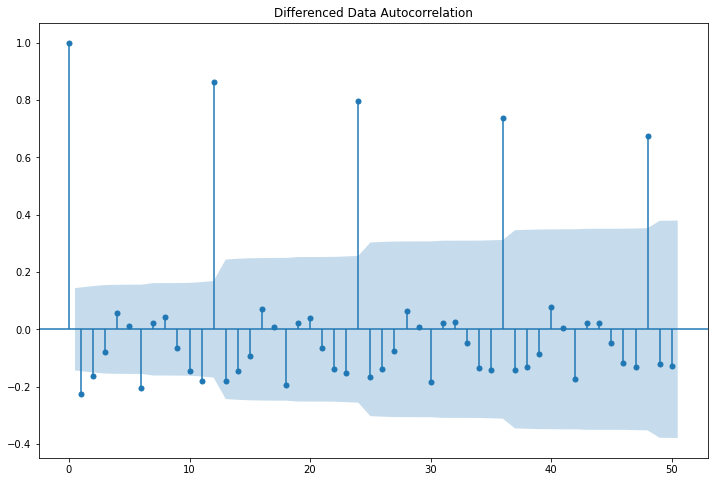

In [387]:
plot_acf(df1['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

In [388]:
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)


In [389]:
SARIMA_AIC_Sparkling = pd.DataFrame(columns=['param_Sparkling','seasonal_Sparkling', 'AIC_Sparkling'])
SARIMA_AIC_Sparkling

Empty DataFrame
Columns: [param_Sparkling, seasonal_Sparkling, AIC_Sparkling]
Index: []

In [390]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq :
        SARIMA_model = sm.tsa.statespace.SARIMAX(train1['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA_Sparkling{}x{} - AIC_Sparkling:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC_Sparkling = SARIMA_AIC_Sparkling.append({'param_Sparkling':param,'seasonal_Sparkling':param_seasonal ,'AIC_Sparkling': results_SARIMA.aic}, ignore_index=True)

SARIMA_Sparkling(0, 1, 0)x(0, 0, 0, 6) - AIC_Sparkling:2251.3597196862966
SARIMA_Sparkling(0, 1, 0)x(0, 0, 1, 6) - AIC_Sparkling:2152.378076171629
SARIMA_Sparkling(0, 1, 0)x(0, 0, 2, 6) - AIC_Sparkling:1955.635553689071
SARIMA_Sparkling(0, 1, 0)x(1, 0, 0, 6) - AIC_Sparkling:2164.4097581959904
SARIMA_Sparkling(0, 1, 0)x(1, 0, 1, 6) - AIC_Sparkling:2079.559984443091
SARIMA_Sparkling(0, 1, 0)x(1, 0, 2, 6) - AIC_Sparkling:1926.9360111440978
SARIMA_Sparkling(0, 1, 0)x(2, 0, 0, 6) - AIC_Sparkling:1839.4012986872267
SARIMA_Sparkling(0, 1, 0)x(2, 0, 1, 6) - AIC_Sparkling:1841.1993617510511
SARIMA_Sparkling(0, 1, 0)x(2, 0, 2, 6) - AIC_Sparkling:1810.9177805657544
SARIMA_Sparkling(0, 1, 1)x(0, 0, 0, 6) - AIC_Sparkling:2230.1629078505825
SARIMA_Sparkling(0, 1, 1)x(0, 0, 1, 6) - AIC_Sparkling:2130.565285908282
SARIMA_Sparkling(0, 1, 1)x(0, 0, 2, 6) - AIC_Sparkling:1918.1876339544276
SARIMA_Sparkling(0, 1, 1)x(1, 0, 0, 6) - AIC_Sparkling:2139.573242878454
SARIMA_Sparkling(0, 1, 1)x(1, 0, 1, 6) - AI

In [391]:
SARIMA_AIC_Sparkling.sort_values(by=['AIC_Sparkling']).head()

param_Sparkling seasonal_Sparkling  AIC_Sparkling
26       (0, 1, 2)       (2, 0, 2, 6)    1727.888803
80       (2, 1, 2)       (2, 0, 2, 6)    1729.178594
53       (1, 1, 2)       (2, 0, 2, 6)    1729.934495
17       (0, 1, 1)       (2, 0, 2, 6)    1741.696451
44       (1, 1, 1)       (2, 0, 2, 6)    1743.379778

In [392]:
auto_SARIMA = sm.tsa.statespace.SARIMAX(train1['Sparkling'],
                                order=(0, 1, 2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

                                     SARIMAX Results                                     
Dep. Variable:                         Sparkling   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -856.944
Date:                           Sat, 12 Feb 2022   AIC                           1727.889
Time:                                   22:51:03   BIC                           1747.164
Sample:                               01-01-1980   HQIC                          1735.713
                                    - 12-01-1990                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7851      0.103     -7.655      0.000      -0.986      -0.584
ma.L2         -0.0975      0.112     -0.870

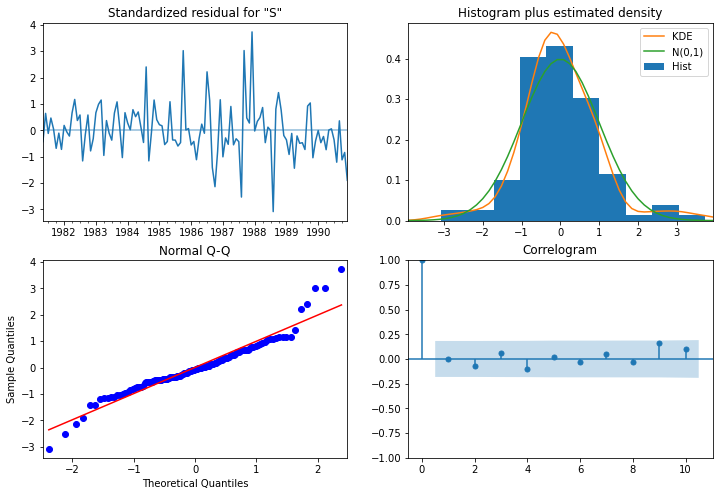

In [393]:
results_auto_SARIMA.plot_diagnostics()
plt.show()

In [394]:
predicted_auto_SARIMA_6 = results_auto_SARIMA.get_forecast(steps=len(test1))

In [395]:
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1991-01-01  1375.580323  384.072914     622.811244    2128.349403
1991-02-01  1116.607983  392.839126     346.657445    1886.558521
1991-03-01  1667.556841  395.413558     892.560508    2442.553174
1991-04-01  1528.328132  397.974441     748.312561    2308.343702
1991-05-01  1372.199160  400.519004     587.196337    2157.201983

In [396]:
rmse = mean_squared_error(test1['Sparkling'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

601.3534243749832


In [397]:
temp_resultsDf = pd.DataFrame({'Sparkling_RMSE': [rmse]}
                           ,index=['SARIMA(0,1,2)(2,0,2,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

Sparkling_RMSE
ARIMA(2,1,2)               1374.958048
SARIMA(0,1,2)(2,0,2,6)      601.353424

In [398]:
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [399]:
SARIMA_AIC_Rose = pd.DataFrame(columns=['param_Rose','seasonal_Rose', 'AIC_Rose'])
SARIMA_AIC_Rose

Empty DataFrame
Columns: [param_Rose, seasonal_Rose, AIC_Rose]
Index: []

In [400]:
for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train2['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA_Rose{}x{} - AIC_Rose:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC_Rose = SARIMA_AIC_Rose.append({'param_Rose':param,'seasonal_Rose':param_seasonal ,'AIC_Rose': results_SARIMA.aic}, ignore_index=True)

SARIMA_Rose(0, 1, 0)x(0, 0, 0, 6) - AIC_Rose:1323.9657875279158
SARIMA_Rose(0, 1, 0)x(0, 0, 1, 6) - AIC_Rose:1264.4996261113863
SARIMA_Rose(0, 1, 0)x(0, 0, 2, 6) - AIC_Rose:1144.7077471827322
SARIMA_Rose(0, 1, 0)x(1, 0, 0, 6) - AIC_Rose:1274.7897737087983
SARIMA_Rose(0, 1, 0)x(1, 0, 1, 6) - AIC_Rose:1241.7870945149089
SARIMA_Rose(0, 1, 0)x(1, 0, 2, 6) - AIC_Rose:1146.3093266721867
SARIMA_Rose(0, 1, 0)x(2, 0, 0, 6) - AIC_Rose:1137.9167236212038
SARIMA_Rose(0, 1, 0)x(2, 0, 1, 6) - AIC_Rose:1137.4533629515088
SARIMA_Rose(0, 1, 0)x(2, 0, 2, 6) - AIC_Rose:1117.022442617828
SARIMA_Rose(0, 1, 1)x(0, 0, 0, 6) - AIC_Rose:1263.5369097383968
SARIMA_Rose(0, 1, 1)x(0, 0, 1, 6) - AIC_Rose:1201.3832548029548
SARIMA_Rose(0, 1, 1)x(0, 0, 2, 6) - AIC_Rose:1097.1908217752782
SARIMA_Rose(0, 1, 1)x(1, 0, 0, 6) - AIC_Rose:1222.4354735745048
SARIMA_Rose(0, 1, 1)x(1, 0, 1, 6) - AIC_Rose:1160.4386253746572
SARIMA_Rose(0, 1, 1)x(1, 0, 2, 6) - AIC_Rose:1084.8564124701688
SARIMA_Rose(0, 1, 1)x(2, 0, 0, 6) - AIC_R

SARIMA_Rose(3, 1, 2)x(1, 0, 0, 6) - AIC_Rose:1191.1320036273894
SARIMA_Rose(3, 1, 2)x(1, 0, 1, 6) - AIC_Rose:1149.0758351244604
SARIMA_Rose(3, 1, 2)x(1, 0, 2, 6) - AIC_Rose:1063.0936405281084
SARIMA_Rose(3, 1, 2)x(2, 0, 0, 6) - AIC_Rose:1065.247866377032
SARIMA_Rose(3, 1, 2)x(2, 0, 1, 6) - AIC_Rose:1055.8112384628805
SARIMA_Rose(3, 1, 2)x(2, 0, 2, 6) - AIC_Rose:1046.4200700388633
SARIMA_Rose(3, 1, 3)x(0, 0, 0, 6) - AIC_Rose:1243.7385974840606
SARIMA_Rose(3, 1, 3)x(0, 0, 1, 6) - AIC_Rose:1176.1392425858505
SARIMA_Rose(3, 1, 3)x(0, 0, 2, 6) - AIC_Rose:1057.3381146506672
SARIMA_Rose(3, 1, 3)x(1, 0, 0, 6) - AIC_Rose:1179.14654418955
SARIMA_Rose(3, 1, 3)x(1, 0, 1, 6) - AIC_Rose:1126.6260812778728
SARIMA_Rose(3, 1, 3)x(1, 0, 2, 6) - AIC_Rose:1057.3118118059847
SARIMA_Rose(3, 1, 3)x(2, 0, 0, 6) - AIC_Rose:1044.985261059901
SARIMA_Rose(3, 1, 3)x(2, 0, 1, 6) - AIC_Rose:1054.3672228341202
SARIMA_Rose(3, 1, 3)x(2, 0, 2, 6) - AIC_Rose:1037.7522812570433


In [401]:
SARIMA_AIC_Rose.sort_values(by=['AIC_Rose']).head()

param_Rose seasonal_Rose     AIC_Rose
107  (2, 1, 3)  (2, 0, 2, 6)  1026.682508
35   (0, 1, 3)  (2, 0, 2, 6)  1033.513063
71   (1, 1, 3)  (2, 0, 2, 6)  1035.246467
143  (3, 1, 3)  (2, 0, 2, 6)  1037.752281
62   (1, 1, 2)  (2, 0, 2, 6)  1041.655821

In [402]:
auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train2['Rose'].values,
                                order=(2, 1, 3),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                       SARIMAX Results                                        
Dep. Variable:                                      y   No. Observations:                  132
Model:             SARIMAX(2, 1, 3)x(2, 0, [1, 2], 6)   Log Likelihood                -503.341
Date:                                Sat, 12 Feb 2022   AIC                           1026.683
Time:                                        22:51:38   BIC                           1054.132
Sample:                                             0   HQIC                          1037.824
                                                - 132                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6888      0.043    -16.089      0.000      -0.773      -0.605
ar.

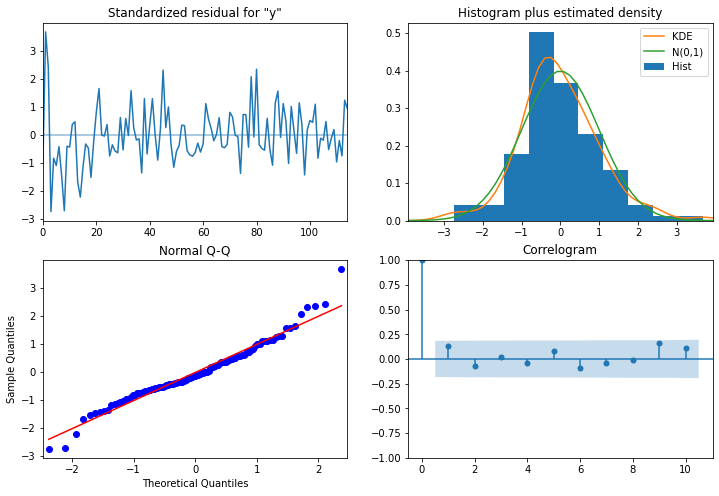

In [403]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

In [404]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test2))

In [405]:
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y       mean    mean_se  mean_ci_lower  mean_ci_upper
0  63.249359  17.681890      28.593492      97.905225
1  61.909994  17.764710      27.091802      96.728186
2  74.344272  17.815294      39.426937     109.261606
3  72.060531  17.911173      36.955277     107.165785
4  73.323637  17.920805      38.199505     108.447770

In [406]:
rmse = mean_squared_error(test2['Rose'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

23.195861602657946


In [407]:
temp_resultsDf = pd.DataFrame({'Rose_RMSE': [rmse]}
                           ,index=['SARIMA(2,1,3)(2,0,2,6)'])


resultsDf1 = pd.concat([resultsDf1,temp_resultsDf])

resultsDf1

Rose_RMSE
ARIMA(3,1,3)            15.987101
SARIMA(2,1,3)(2,0,2,6)  23.195862

In [408]:
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [409]:
SARIMA_AIC_Sparkling = pd.DataFrame(columns=['param_Sparkling','seasonal_Sparkling', 'AIC_Sparkling'])
SARIMA_AIC_Sparkling

Empty DataFrame
Columns: [param_Sparkling, seasonal_Sparkling, AIC_Sparkling]
Index: []

In [410]:
for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train1['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA_Sparkling{}x{} - AIC_Sparkling:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC_Sparkling = SARIMA_AIC_Sparkling.append({'param_Sparkling':param,'seasonal_Sparkling':param_seasonal ,'AIC_Sparkling': results_SARIMA.aic}, ignore_index=True)

SARIMA_Sparkling(0, 1, 0)x(0, 0, 0, 12) - AIC_Sparkling:2251.3597196862966
SARIMA_Sparkling(0, 1, 0)x(0, 0, 1, 12) - AIC_Sparkling:1956.261461684553
SARIMA_Sparkling(0, 1, 0)x(0, 0, 2, 12) - AIC_Sparkling:1723.1533640236705
SARIMA_Sparkling(0, 1, 0)x(1, 0, 0, 12) - AIC_Sparkling:1837.4366022456675
SARIMA_Sparkling(0, 1, 0)x(1, 0, 1, 12) - AIC_Sparkling:1806.9905301389308
SARIMA_Sparkling(0, 1, 0)x(1, 0, 2, 12) - AIC_Sparkling:1633.2108735791933
SARIMA_Sparkling(0, 1, 0)x(2, 0, 0, 12) - AIC_Sparkling:1648.3776153470856
SARIMA_Sparkling(0, 1, 0)x(2, 0, 1, 12) - AIC_Sparkling:1647.2054158613328
SARIMA_Sparkling(0, 1, 0)x(2, 0, 2, 12) - AIC_Sparkling:1630.9898053920738
SARIMA_Sparkling(0, 1, 1)x(0, 0, 0, 12) - AIC_Sparkling:2230.1629078505825
SARIMA_Sparkling(0, 1, 1)x(0, 0, 1, 12) - AIC_Sparkling:1923.7688649566726
SARIMA_Sparkling(0, 1, 1)x(0, 0, 2, 12) - AIC_Sparkling:1692.7089572821226
SARIMA_Sparkling(0, 1, 1)x(1, 0, 0, 12) - AIC_Sparkling:1797.179588183803
SARIMA_Sparkling(0, 1, 1)x(

In [411]:
SARIMA_AIC_Sparkling.sort_values(by=['AIC_Sparkling']).head()

param_Sparkling seasonal_Sparkling  AIC_Sparkling
50       (1, 1, 2)      (1, 0, 2, 12)    1555.584247
53       (1, 1, 2)      (2, 0, 2, 12)    1556.076771
26       (0, 1, 2)      (2, 0, 2, 12)    1557.121574
23       (0, 1, 2)      (1, 0, 2, 12)    1557.160507
77       (2, 1, 2)      (1, 0, 2, 12)    1557.340402

In [412]:
auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train1['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood                -770.792
Date:                            Sat, 12 Feb 2022   AIC                           1555.584
Time:                                    22:52:06   BIC                           1574.095
Sample:                                         0   HQIC                          1563.083
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6281      0.255     -2.462      0.014      -1.128      -0.128
ma.L1         -0.1041      0.225   

In [413]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test1))

In [414]:
rmse = mean_squared_error(test1['Sparkling'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print(rmse)

528.5896170915923


In [415]:
temp_resultsDf = pd.DataFrame({'Sparkling_RMSE': [rmse]}
                           ,index=['SARIMA(1,1,2)(1,0,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

Sparkling_RMSE
ARIMA(2,1,2)                1374.958048
SARIMA(0,1,2)(2,0,2,6)       601.353424
SARIMA(1,1,2)(1,0,2,12)      528.589617

In [416]:
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [417]:
SARIMA_AIC_Rose = pd.DataFrame(columns=['param_Rose','seasonal_Rose', 'AIC_Rose'])
SARIMA_AIC_Rose

Empty DataFrame
Columns: [param_Rose, seasonal_Rose, AIC_Rose]
Index: []

In [418]:
for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train2['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA_Rose{}x{} - AIC_Rose:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC_Rose = SARIMA_AIC_Rose.append({'param_Rose':param,'seasonal_Rose':param_seasonal ,'AIC_Rose': results_SARIMA.aic}, ignore_index=True)

SARIMA_Rose(0, 1, 0)x(0, 0, 0, 12) - AIC_Rose:1323.9657875279158
SARIMA_Rose(0, 1, 0)x(0, 0, 1, 12) - AIC_Rose:1145.4230827207525
SARIMA_Rose(0, 1, 0)x(0, 0, 2, 12) - AIC_Rose:976.4375296380891
SARIMA_Rose(0, 1, 0)x(1, 0, 0, 12) - AIC_Rose:1139.921738995602
SARIMA_Rose(0, 1, 0)x(1, 0, 1, 12) - AIC_Rose:1116.0207869386875
SARIMA_Rose(0, 1, 0)x(1, 0, 2, 12) - AIC_Rose:969.6913635754128
SARIMA_Rose(0, 1, 0)x(2, 0, 0, 12) - AIC_Rose:960.8812220353041
SARIMA_Rose(0, 1, 0)x(2, 0, 1, 12) - AIC_Rose:962.8794540697533
SARIMA_Rose(0, 1, 0)x(2, 0, 2, 12) - AIC_Rose:955.5735408945637
SARIMA_Rose(0, 1, 1)x(0, 0, 0, 12) - AIC_Rose:1263.5369097383968
SARIMA_Rose(0, 1, 1)x(0, 0, 1, 12) - AIC_Rose:1098.5554825918334
SARIMA_Rose(0, 1, 1)x(0, 0, 2, 12) - AIC_Rose:923.6314049383899
SARIMA_Rose(0, 1, 1)x(1, 0, 0, 12) - AIC_Rose:1095.793632491829
SARIMA_Rose(0, 1, 1)x(1, 0, 1, 12) - AIC_Rose:1054.7434330947895
SARIMA_Rose(0, 1, 1)x(1, 0, 2, 12) - AIC_Rose:918.8573483301973
SARIMA_Rose(0, 1, 1)x(2, 0, 0, 12)

SARIMA_Rose(3, 1, 2)x(0, 0, 2, 12) - AIC_Rose:917.7980113014614
SARIMA_Rose(3, 1, 2)x(1, 0, 0, 12) - AIC_Rose:1066.2776211376683
SARIMA_Rose(3, 1, 2)x(1, 0, 1, 12) - AIC_Rose:1046.126051830165
SARIMA_Rose(3, 1, 2)x(1, 0, 2, 12) - AIC_Rose:909.2875090186858
SARIMA_Rose(3, 1, 2)x(2, 0, 0, 12) - AIC_Rose:889.3191140331114
SARIMA_Rose(3, 1, 2)x(2, 0, 1, 12) - AIC_Rose:890.3277441304256
SARIMA_Rose(3, 1, 2)x(2, 0, 2, 12) - AIC_Rose:896.1431014394416
SARIMA_Rose(3, 1, 3)x(0, 0, 0, 12) - AIC_Rose:1243.7385974840606
SARIMA_Rose(3, 1, 3)x(0, 0, 1, 12) - AIC_Rose:1060.539766007896
SARIMA_Rose(3, 1, 3)x(0, 0, 2, 12) - AIC_Rose:910.3340173784219
SARIMA_Rose(3, 1, 3)x(1, 0, 0, 12) - AIC_Rose:1066.861879262267
SARIMA_Rose(3, 1, 3)x(1, 0, 1, 12) - AIC_Rose:1039.766238025352
SARIMA_Rose(3, 1, 3)x(1, 0, 2, 12) - AIC_Rose:900.0483673323674
SARIMA_Rose(3, 1, 3)x(2, 0, 0, 12) - AIC_Rose:884.0463711780098
SARIMA_Rose(3, 1, 3)x(2, 0, 1, 12) - AIC_Rose:885.9217105650052
SARIMA_Rose(3, 1, 3)x(2, 0, 2, 12) - A

In [419]:
SARIMA_AIC_Rose.sort_values(by=['AIC_Rose']).head()

param_Rose  seasonal_Rose    AIC_Rose
107  (2, 1, 3)  (2, 0, 2, 12)  879.219180
71   (1, 1, 3)  (2, 0, 2, 12)  880.288659
35   (0, 1, 3)  (2, 0, 2, 12)  880.550979
143  (3, 1, 3)  (2, 0, 2, 12)  880.559572
141  (3, 1, 3)  (2, 0, 0, 12)  884.046371

In [420]:
auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train2['Rose'].values,
                                order=(2, 1, 3),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                  132
Model:             SARIMAX(2, 1, 3)x(2, 0, [1, 2], 12)   Log Likelihood                -429.610
Date:                                 Sat, 12 Feb 2022   AIC                            879.219
Time:                                         22:52:49   BIC                            905.566
Sample:                                              0   HQIC                           889.891
                                                 - 132                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4791      0.066     -7.228      0.000      -0.609      -0

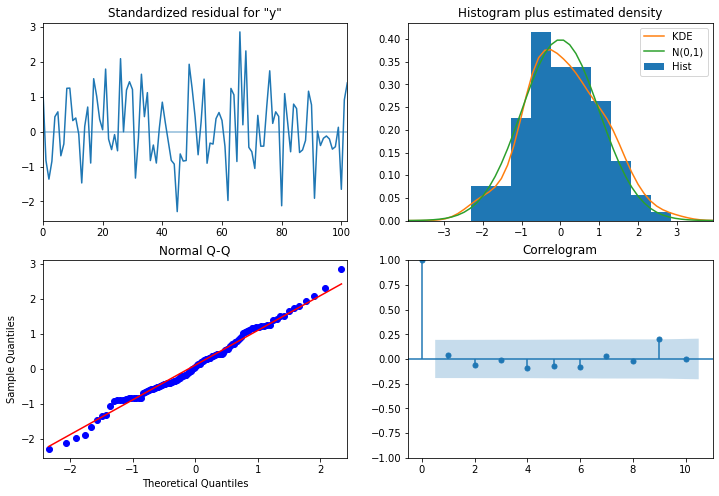

In [421]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

In [422]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test2))

In [423]:
rmse = mean_squared_error(test2['Rose'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print(rmse)

26.99641524749934


In [424]:
temp_resultsDf = pd.DataFrame({'Rose_RMSE': [rmse]}
                           ,index=['SARIMA(2,1,3)(2,0,2,12)'])


resultsDf1 = pd.concat([resultsDf1,temp_resultsDf])

resultsDf1

Rose_RMSE
ARIMA(3,1,3)             15.987101
SARIMA(2,1,3)(2,0,2,6)   23.195862
SARIMA(2,1,3)(2,0,2,12)  26.996415

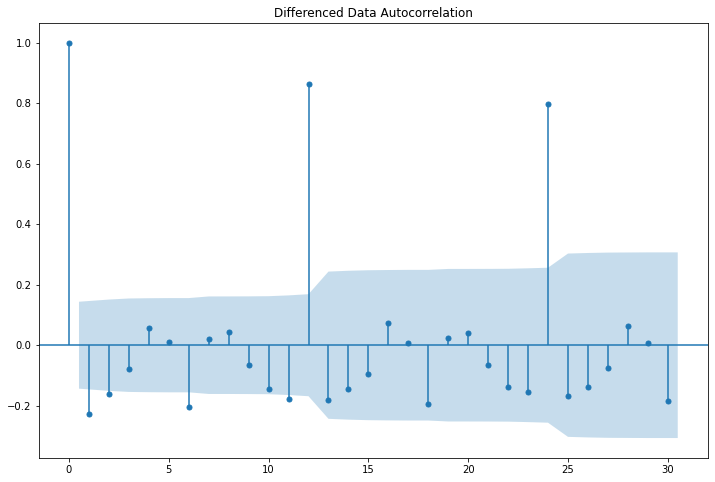

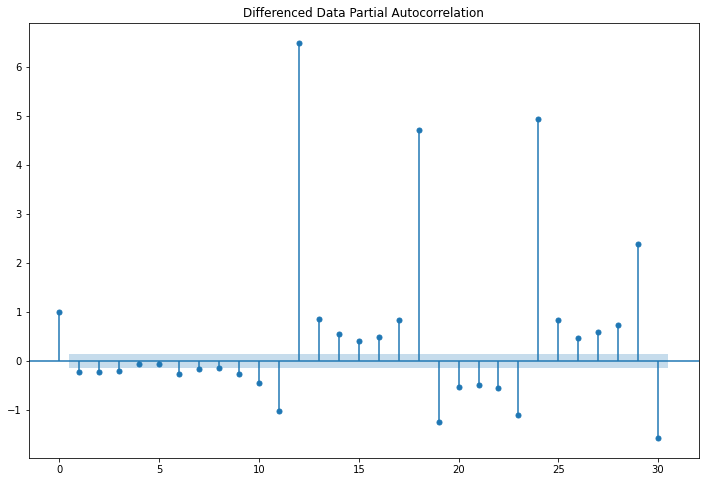

In [425]:
plot_acf(df1['Sparkling'].diff().dropna(),lags=30,title='Differenced Data Autocorrelation')
plot_pacf(df1['Sparkling'].diff().dropna(),lags=30,title='Differenced Data Partial Autocorrelation')
plt.show()

In [426]:
manual_ARIMA = ARIMA(train1['Sparkling'].astype('float64'), order=(0,1,2))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(0, 1, 2)   Log Likelihood               -1112.392
Method:                       css-mle   S.D. of innovations           1159.696
Date:                Sat, 12 Feb 2022   AIC                           2232.783
Time:                        22:52:50   BIC                           2244.284
Sample:                    02-01-1980   HQIC                          2237.456
                         - 12-01-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 6.2472      3.800      1.644      0.100      -1.201      13.696
ma.L1.D.Sparkling    -0.5555      0.073     -7.583      0.000      -0.699      -0.412
ma.L2.D.Sparkling    -0.

In [427]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test1))

In [428]:
rmse = mean_squared_error(test1['Sparkling'],predicted_manual_ARIMA[0],squared=False)
print(rmse)

1417.502239430773


In [429]:
temp_resultsDf = pd.DataFrame({'Sparkling_RMSE': [rmse]}
                           ,index=['ARIMA(0,1,2)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

Sparkling_RMSE
ARIMA(2,1,2)                1374.958048
SARIMA(0,1,2)(2,0,2,6)       601.353424
SARIMA(1,1,2)(1,0,2,12)      528.589617
ARIMA(0,1,2)                1417.502239

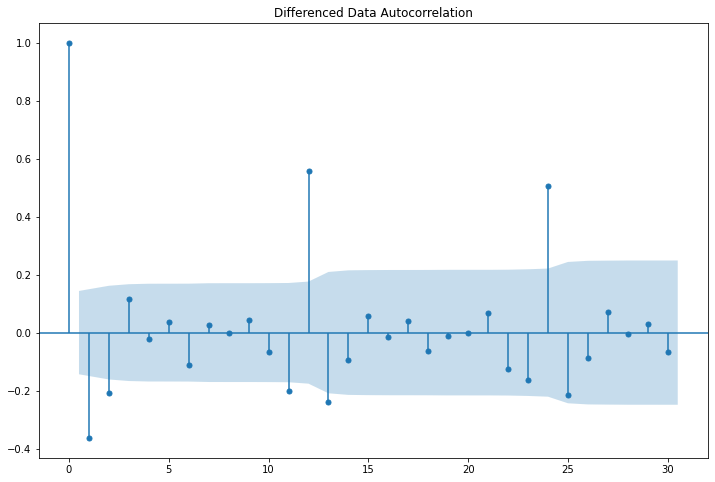

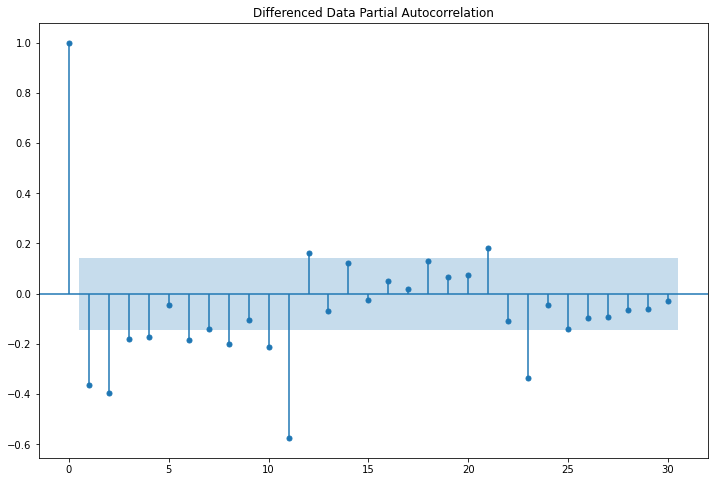

In [430]:
plot_acf(df2['Rose'].diff().dropna(),lags=30,title='Differenced Data Autocorrelation')
plot_pacf(df2['Rose'].diff().dropna(),lags=30,title='Differenced Data Partial Autocorrelation')
plt.show()

In [431]:
manual_ARIMA = ARIMA(train2['Rose'].astype('float64'), order=(2,1,2))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -633.649
Method:                       css-mle   S.D. of innovations             29.975
Date:                Sat, 12 Feb 2022   AIC                           1279.299
Time:                        22:52:50   BIC                           1296.550
Sample:                    02-01-1980   HQIC                          1286.309
                         - 12-01-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4911      0.081     -6.076      0.000      -0.649      -0.333
ar.L1.D.Rose    -0.4383      0.218     -2.015      0.044      -0.865      -0.012
ar.L2.D.Rose     0.0269      0.109      0.24

In [432]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test2))

In [433]:
rmse = mean_squared_error(test2['Rose'],predicted_manual_ARIMA[0],squared=False)
print(rmse)

15.3548831622164


In [434]:
temp_resultsDf = pd.DataFrame({'Rose_RMSE': [rmse]}
                           ,index=['ARIMA(2,1,2)'])


resultsDf1 = pd.concat([resultsDf1,temp_resultsDf])

resultsDf1

Rose_RMSE
ARIMA(3,1,3)             15.987101
SARIMA(2,1,3)(2,0,2,6)   23.195862
SARIMA(2,1,3)(2,0,2,12)  26.996415
ARIMA(2,1,2)             15.354883

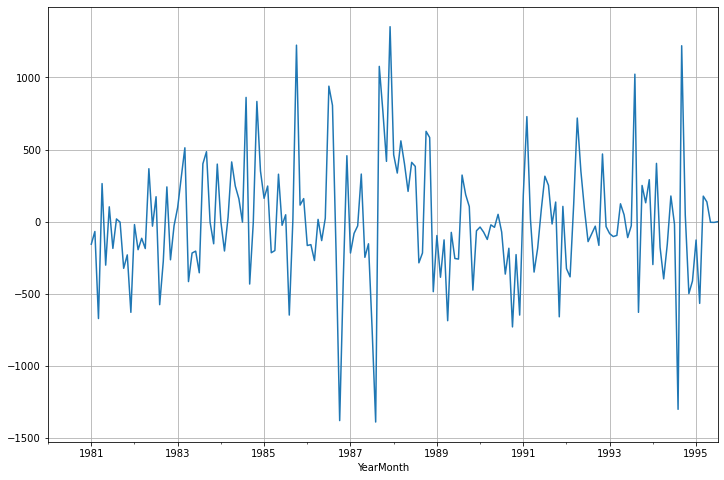

In [435]:
(df1['Sparkling'].diff(12)).plot()
plt.grid();

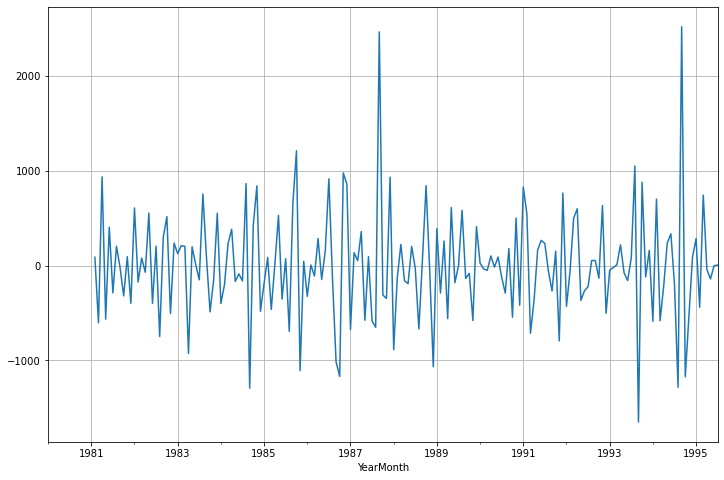

In [436]:
(df1['Sparkling'].diff(12)).diff().plot()
plt.grid();

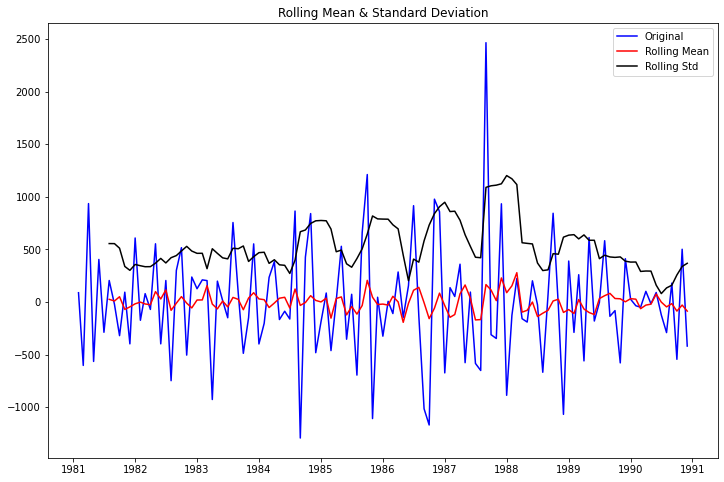

Results of Dickey-Fuller Test:
Test Statistic                  -3.342905
p-value                          0.013066
#Lags Used                      10.000000
Number of Observations Used    108.000000
Critical Value (1%)             -3.492401
Critical Value (5%)             -2.888697
Critical Value (10%)            -2.581255
dtype: float64 



In [437]:
test_stationarity((train1['Sparkling'].diff(12).dropna()).diff(1).dropna())

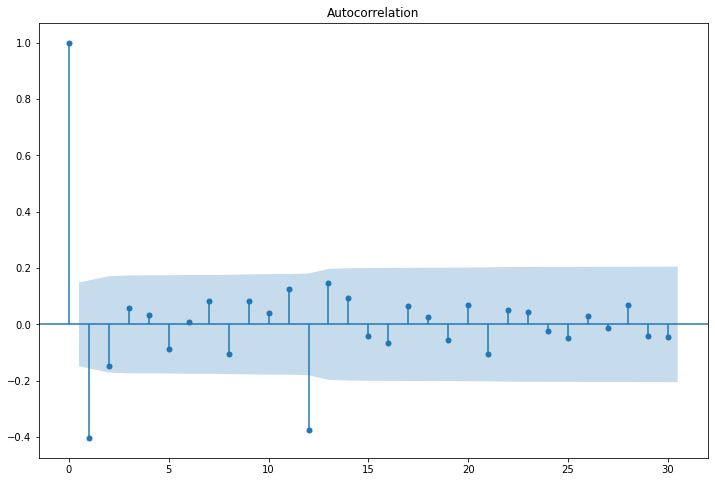

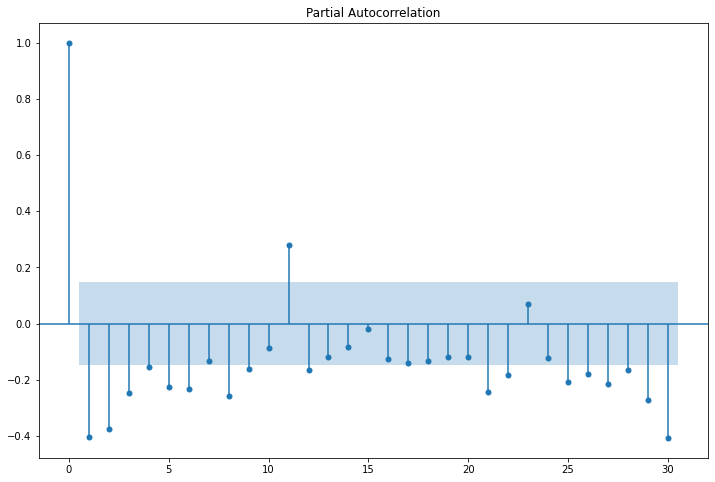

In [438]:
plot_acf((df1['Sparkling'].diff(12).dropna()).diff(1).dropna(),lags=30)
plot_pacf((df1['Sparkling'].diff(12).dropna()).diff(1).dropna(),lags=30);

In [439]:
manual_SARIMA_6 = sm.tsa.statespace.SARIMAX(train1['Sparkling'].values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_6 = manual_SARIMA_6.fit(maxiter=1000)
print(results_manual_SARIMA_6.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -771.561
Date:                            Sat, 12 Feb 2022   AIC                           1557.122
Time:                                    22:52:52   BIC                           1575.632
Sample:                                         0   HQIC                          1564.621
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7775      0.101     -7.685      0.000      -0.976      -0.579
ma.L2         -0.1236      0.121   

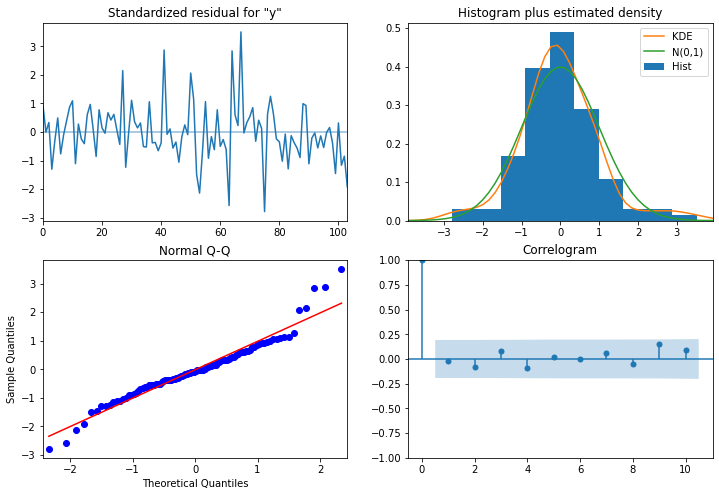

In [440]:
results_manual_SARIMA_6.plot_diagnostics()
plt.show()

In [441]:
predicted_manual_SARIMA_6 = results_manual_SARIMA_6.get_forecast(steps=len(test1))

In [442]:
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1411.663807  397.210553     633.145429    2190.182185
1  1233.154630  406.931459     435.583626    2030.725633
2  1700.278589  408.815564     899.014808    2501.542370
3  1586.654954  410.700532     781.696703    2391.613205
4  1432.463172  412.577257     623.826607    2241.099737

In [443]:
rmse = mean_squared_error(test1['Sparkling'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
print(rmse)

526.3926616535438


In [444]:
temp_resultsDf = pd.DataFrame({'Sparkling_RMSE': [rmse]}
                           ,index=['SARIMA(0,1,2)(2,0,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

Sparkling_RMSE
ARIMA(2,1,2)                1374.958048
SARIMA(0,1,2)(2,0,2,6)       601.353424
SARIMA(1,1,2)(1,0,2,12)      528.589617
ARIMA(0,1,2)                1417.502239
SARIMA(0,1,2)(2,0,2,12)      526.392662

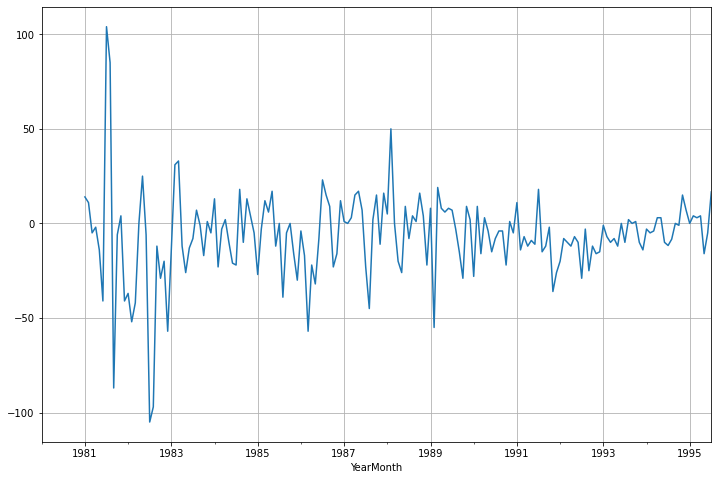

In [445]:
(df2['Rose'].diff(12)).plot()
plt.grid();

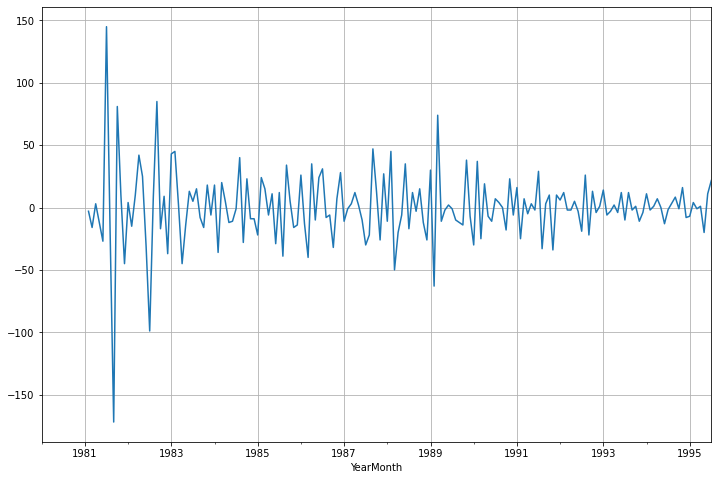

In [446]:
(df2['Rose'].diff(12)).diff().plot()
plt.grid();

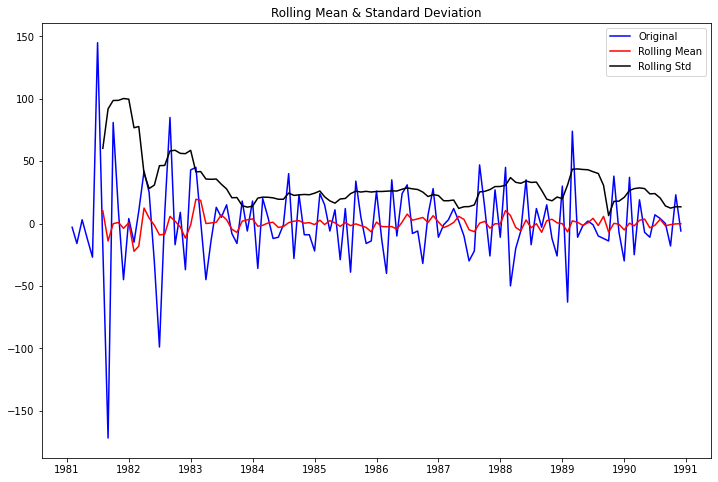

Results of Dickey-Fuller Test:
Test Statistic                  -3.692348
p-value                          0.004222
#Lags Used                      11.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64 



In [447]:
test_stationarity((train2['Rose'].diff(12).dropna()).diff(1).dropna())

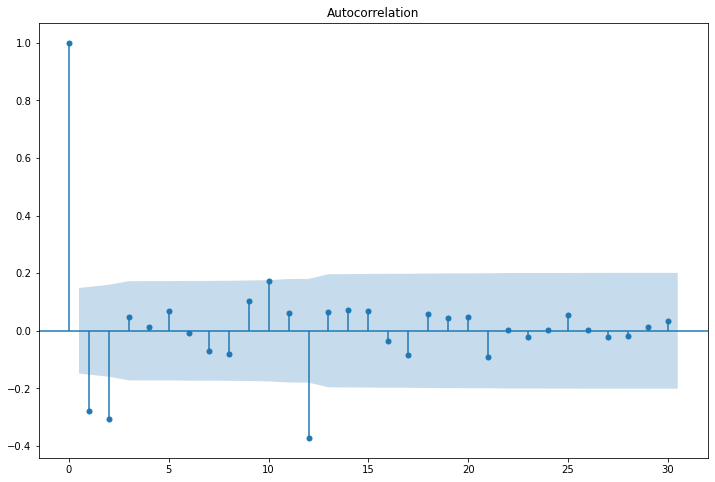

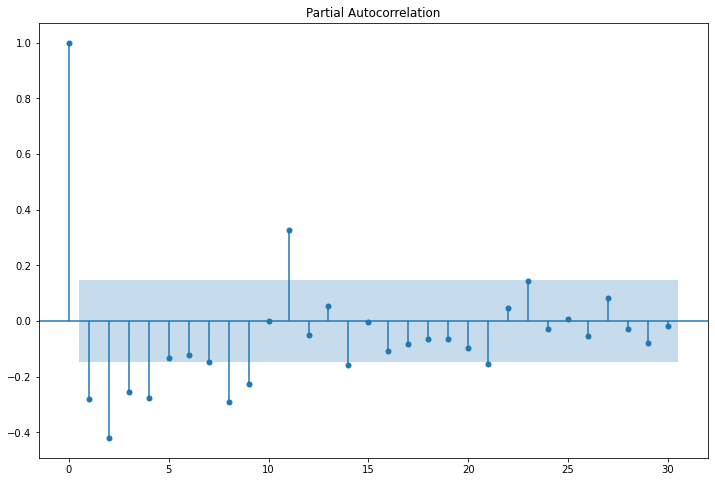

In [448]:
plot_acf((df2['Rose'].diff(12).dropna()).diff(1).dropna(),lags=30)
plot_pacf((df2['Rose'].diff(12).dropna()).diff(1).dropna(),lags=30);

In [449]:
manual_SARIMA_6 = sm.tsa.statespace.SARIMAX(train2['Rose'].values,
                                order=(2, 1, 2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_6 = manual_SARIMA_6.fit(maxiter=1000)
print(results_manual_SARIMA_6.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -436.334
Date:                            Sat, 12 Feb 2022   AIC                            890.669
Time:                                    22:52:53   BIC                            914.468
Sample:                                         0   HQIC                           900.311
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3971      0.322      1.232      0.218      -0.234       1.029
ar.L2         -0.1376      0.114   

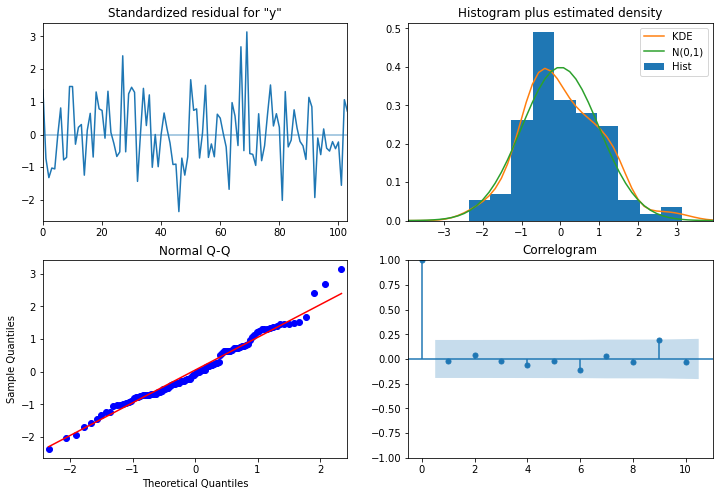

In [450]:
results_manual_SARIMA_6.plot_diagnostics()
plt.show()

In [451]:
predicted_manual_SARIMA_6 = results_manual_SARIMA_6.get_forecast(steps=len(test2))

In [452]:
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

y       mean    mean_se  mean_ci_lower  mean_ci_upper
0  62.232085  15.796464      31.271585      93.192585
1  69.149622  15.979723      37.829940     100.469304
2  76.828372  16.016823      45.435976     108.220769
3  76.627802  16.029607      45.210349     108.045254
4  73.150375  16.028897      41.734314     104.566437

In [453]:
rmse = mean_squared_error(test2['Rose'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
print(rmse)

27.46323795243739


In [454]:
temp_resultsDf = pd.DataFrame({'Rose_RMSE': [rmse]}
                           ,index=['SARIMA(2,1,2)(2,0,2,12)'])


resultsDf1 = pd.concat([resultsDf1,temp_resultsDf])

resultsDf1

Rose_RMSE
ARIMA(3,1,3)             15.987101
SARIMA(2,1,3)(2,0,2,6)   23.195862
SARIMA(2,1,3)(2,0,2,12)  26.996415
ARIMA(2,1,2)             15.354883
SARIMA(2,1,2)(2,0,2,12)  27.463238

In [455]:
resultsDf1 = resultsDf1.rename(columns={'Rose_RMSE':'Rose Test RMSE'})

In [456]:
resultsDf1

Rose Test RMSE
ARIMA(3,1,3)                  15.987101
SARIMA(2,1,3)(2,0,2,6)        23.195862
SARIMA(2,1,3)(2,0,2,12)       26.996415
ARIMA(2,1,2)                  15.354883
SARIMA(2,1,2)(2,0,2,12)       27.463238

In [457]:
resultsDf

Sparkling_RMSE
ARIMA(2,1,2)                1374.958048
SARIMA(0,1,2)(2,0,2,6)       601.353424
SARIMA(1,1,2)(1,0,2,12)      528.589617
ARIMA(0,1,2)                1417.502239
SARIMA(0,1,2)(2,0,2,12)      526.392662

In [458]:
resultsDf = resultsDf.rename(columns={'Sparkling_RMSE':'Sparkling Test RMSE'})

In [459]:
resultsDf

Sparkling Test RMSE
ARIMA(2,1,2)                     1374.958048
SARIMA(0,1,2)(2,0,2,6)            601.353424
SARIMA(1,1,2)(1,0,2,12)           528.589617
ARIMA(0,1,2)                     1417.502239
SARIMA(0,1,2)(2,0,2,12)           526.392662

In [460]:
resultsDf1 = pd.concat([resultsDf1,resultsDf_5,resultsDf_6_1,resultsDf_7_1,resultsDf_8_1,resultsDf_8_3,resultsDf_2,resultsDf_3,resultsDf_4])

resultsDf1

Rose Test RMSE
ARIMA(3,1,3)                                             15.987101
SARIMA(2,1,3)(2,0,2,6)                                   23.195862
SARIMA(2,1,3)(2,0,2,12)                                  26.996415
ARIMA(2,1,2)                                             15.354883
SARIMA(2,1,2)(2,0,2,12)                                  27.463238
Alpha=0.098,SimpleExponentialSmoothing                   36.796243
Alpha=0.3,SimpleExponentialSmoothing                     47.504821
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing           265.567594
Alpha=0.065,Beta=0.051,Gamma=0.001,TripleExpone...       20.990268
Alpha=0.3,Beta=0.4,Gamma=0.3,TripleExponentialS...       10.945435
NaiveModel                                               79.718773
SimpleAverageModel                                       53.460570
2pointTrailingMovingAverage                              11.529278
4pointTrailingMovingAverage                              14.451403
6pointTrailingMovingAverage                              14.566327
9pointTrailingMovingAverage                              14.727630

In [461]:
resultsDf_1 = pd.DataFrame({'Rose Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf1 = pd.concat([resultsDf1,resultsDf_1])
resultsDf1

Rose Test RMSE
ARIMA(3,1,3)                                             15.987101
SARIMA(2,1,3)(2,0,2,6)                                   23.195862
SARIMA(2,1,3)(2,0,2,12)                                  26.996415
ARIMA(2,1,2)                                             15.354883
SARIMA(2,1,2)(2,0,2,12)                                  27.463238
Alpha=0.098,SimpleExponentialSmoothing                   36.796243
Alpha=0.3,SimpleExponentialSmoothing                     47.504821
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing           265.567594
Alpha=0.065,Beta=0.051,Gamma=0.001,TripleExpone...       20.990268
Alpha=0.3,Beta=0.4,Gamma=0.3,TripleExponentialS...       10.945435
NaiveModel                                               79.718773
SimpleAverageModel                                       53.460570
2pointTrailingMovingAverage                              11.529278
4pointTrailingMovingAverage                              14.451403
6pointTrailingMovingAverage                              14.566327
9pointTrailingMovingAverage                              14.727630
RegressionOnTime                                         15.268955

In [462]:
resultsDf = pd.concat([resultsDf,resultsDf_9,resultsDf_9_1,resultsDf_9_2,resultsDf_9_3,resultsDf_9_4,resultsDf_9_5,resultsDf_9_6,resultsDf_9_7])

resultsDf

Sparkling Test RMSE
ARIMA(2,1,2)                                                1374.958048
SARIMA(0,1,2)(2,0,2,6)                                       601.353424
SARIMA(1,1,2)(1,0,2,12)                                      528.589617
ARIMA(0,1,2)                                                1417.502239
SARIMA(0,1,2)(2,0,2,12)                                      526.392662
Alpha=0.049,SimpleExponentialSmoothing                      1316.034674
Alpha=0.3,SimpleExponentialSmoothing                        1935.507132
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing              18259.110704
Alpha=0.11,Beta=0.06,Gamma=0.39,TripleExponenti...           463.501976
Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialS...           392.786198
NaiveModel                                                  3864.279352
SimpleAverageModel                                          1275.081804
2pointTrailingMovingAverage                                  813.400684
4pointTrailingMovingAverage                                 1156.589694
6pointTrailingMovingAverage                                 1283.927428
9pointTrailingMovingAverage                                 1346.278315

In [463]:
resultsDf_2_1 = pd.DataFrame({'Sparkling Test RMSE': [rmse_model_test]},index=['RegressionOnTime'])
resultsDf = pd.concat([resultsDf,resultsDf_2_1])
resultsDf

Sparkling Test RMSE
ARIMA(2,1,2)                                                1374.958048
SARIMA(0,1,2)(2,0,2,6)                                       601.353424
SARIMA(1,1,2)(1,0,2,12)                                      528.589617
ARIMA(0,1,2)                                                1417.502239
SARIMA(0,1,2)(2,0,2,12)                                      526.392662
Alpha=0.049,SimpleExponentialSmoothing                      1316.034674
Alpha=0.3,SimpleExponentialSmoothing                        1935.507132
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing              18259.110704
Alpha=0.11,Beta=0.06,Gamma=0.39,TripleExponenti...           463.501976
Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialS...           392.786198
NaiveModel                                                  3864.279352
SimpleAverageModel                                          1275.081804
2pointTrailingMovingAverage                                  813.400684
4pointTrailingMovingAverage                                 1156.589694
6pointTrailingMovingAverage                                 1283.927428
9pointTrailingMovingAverage                                 1346.278315
RegressionOnTime                                            1389.135175

In [464]:
fullmodel1 = ExponentialSmoothing(df1,
                                  trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=0.3,
                                                                 smoothing_trend=0.3,
                                                                 smoothing_seasonal=0.3)

In [465]:
RMSE_fullmodel1 = metrics.mean_squared_error(df1['Sparkling'],fullmodel1.fittedvalues,squared=False)

print('RMSE:',RMSE_fullmodel1)

RMSE: 421.67825358928565


In [466]:
prediction_1 = fullmodel1.forecast(steps=12)

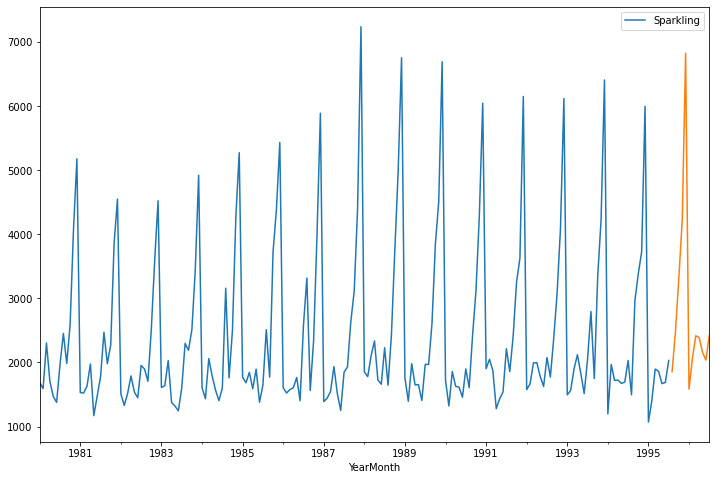

In [467]:
df1.plot()
prediction_1.plot();

In [468]:
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(fullmodel1.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*np.std(fullmodel1.resid,ddof=1)})
pred_1_df.head()

lower_CI   prediction     upper_ci
1995-08-01  1026.930752  1855.624437  2684.318121
1995-09-01  1658.456573  2487.150257  3315.843941
1995-10-01  2494.728051  3323.421736  4152.115420
1995-11-01  3396.623973  4225.317657  5054.011341
1995-12-01  5999.212368  6827.906052  7656.599737

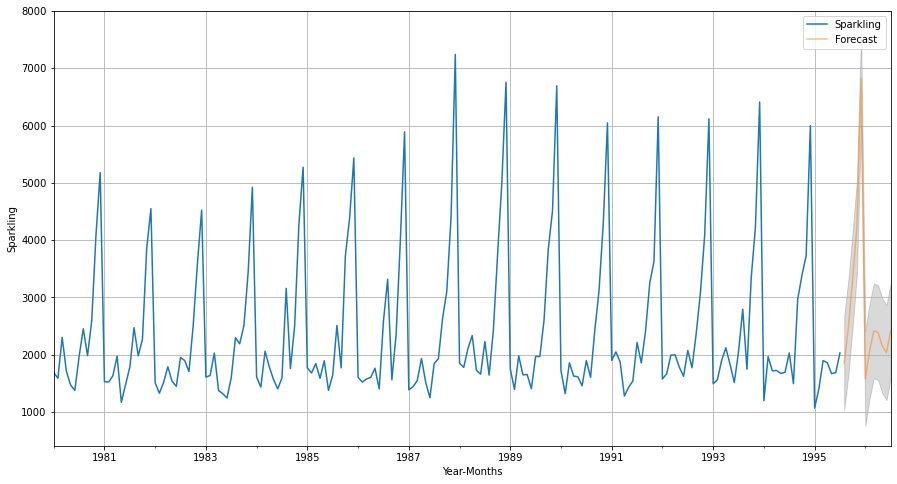

In [469]:
axis = df1.plot(label='Actual', figsize=(15,8))
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_1_df.index, pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling')
plt.legend(loc='best')
plt.grid()
plt.show()

In [470]:
fullmodel2 = ExponentialSmoothing(df2,
                                  trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=0.3,
                                                                 smoothing_trend=0.4,
                                                                 smoothing_seasonal=0.3)

In [471]:
RMSE_fullmodel2 = metrics.mean_squared_error(df2['Rose'],fullmodel2.fittedvalues,squared=False)

print('RMSE:',RMSE_fullmodel2)

RMSE: 20.672560612957582


In [472]:
prediction_2 = fullmodel2.forecast(steps=12)

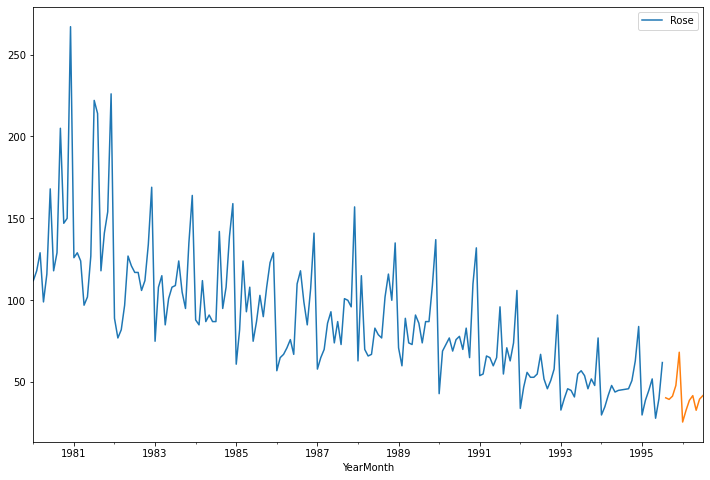

In [473]:
df2.plot()
prediction_2.plot();

In [474]:
pred_2_df = pd.DataFrame({'lower_CI':prediction_2 - 1.96*np.std(fullmodel2.resid,ddof=1),
                          'prediction':prediction_2,
                          'upper_ci': prediction_2 + 1.96*np.std(fullmodel2.resid,ddof=1)})
pred_2_df.head()

lower_CI  prediction    upper_ci
1995-08-01  -0.145495   40.466295   81.078086
1995-09-01  -1.088643   39.523147   80.134937
1995-10-01   0.860742   41.472532   82.084323
1995-11-01   7.399768   48.011558   88.623348
1995-12-01  27.672914   68.284704  108.896494

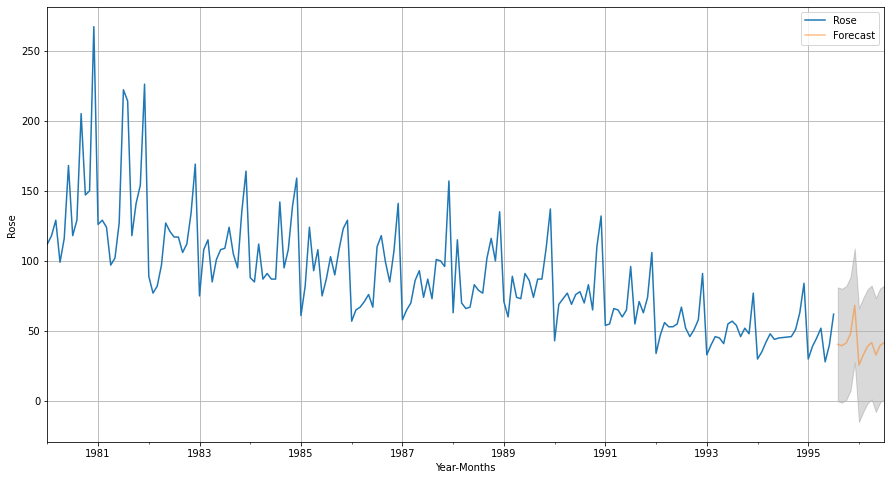

In [475]:
axis = df2.plot(label='Actual', figsize=(15,8))
pred_2_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_2_df.index, pred_2_df['lower_CI'], pred_2_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Rose')
plt.legend(loc='best')
plt.grid()
plt.show()